ACHRAF, Sajda, Joseph, Mark James, Esmaa

générer une solution initiale

In [ ]:
! pip install heappop

ERROR: Could not find a version that satisfies the requirement heappop (from versions: none)
ERROR: No matching distribution found for heappop


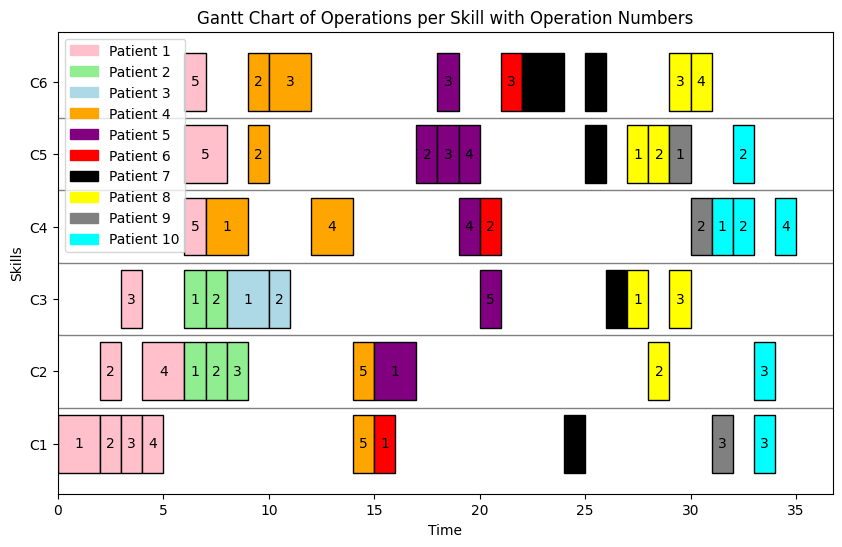

In [ ]:
import random
import copy
import matplotlib.pyplot as plt
from heapq import heappop, heappush

import matplotlib.patches as mpatches

# Données initiales : patients, compétences et opérations
patients = {
    1: {'operations': [(1, {'C1': 2}), (2, {'C1': 1, 'C2': 1}), (3, {'C1': 1, 'C3': 1}), (4, {'C1': 1, 'C2': 2}), (5, {'C4': 1, 'C5': 2, 'C6': 1})]},
    2: {'operations': [(1, {'C2': 1, 'C3': 1}), (2, {'C2': 1, 'C3': 1}), (3, {'C2': 1})]},
    3: {'operations': [(1, {'C3': 2}), (2, {'C3': 1})]},
    4: {'operations': [(1, {'C4': 2}), (2, {'C5': 1, 'C6': 1}), (3, {'C6': 2}), (4, {'C4': 2}), (5, {'C1': 1, 'C2': 1})]},
    5: {'operations': [(1, {'C2': 2}), (2, {'C5': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C4': 1, 'C5': 1}), (5, {'C3': 1})]},
    6: {'operations': [(1, {'C1': 1}), (2, {'C4': 1}), (3, {'C6': 1})]},
    7: {'operations': [(1, {'C6': 2}), (2, {'C1': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C3': 1})]},
    8: {'operations': [(1, {'C3': 1, 'C5': 1}), (2, {'C2': 1, 'C5': 1}), (3, {'C3': 1, 'C6': 1}),(4, {'C6': 1})]},
    9: {'operations': [(1, {'C5': 1}), (2, {'C4': 1}), (3, {'C1': 1})]},
    10: {'operations': [(1, {'C4': 1}), (2, {'C4': 1, 'C5': 1}), (3, {'C1': 1, 'C2': 1}), (4, {'C4': 1})]}
}

# Compétences disponibles pour chaque patient
skills_available = {'C1': 1, 'C2': 1, 'C3': 1,'C4': 1,'C5': 1,'C6': 1}  # Une seule instance de chaque compétence à la fois

# Couleurs pour chaque patient
patient_colors = {
    1: 'pink',
    2: 'lightgreen',
    3: 'lightblue',
    4: 'orange',
    5: 'purple',
    6: 'red',
    7: 'black',
    8: 'yellow',
    9: 'gray',
    10: 'cyan'
}

# Fonction pour générer une solution initiale avec utilisation des périodes inactives
def generate_initial_solution_using_inactive_periods(patients, skills_available):
    # Stocker le planning des opérations
    schedule = {skill: [] for skill in skills_available}

    # Temps courant pour chaque compétence
    skill_time = {skill: 0 for skill in skills_available}

    # Temps courant pour chaque patient (ordre d'exécution des opérations)
    patient_time = {patient: 0 for patient in patients}

    # Prioriser l'utilisation des périodes inactives pour les compétences
    for patient in patients:
        for op_id, skills_needed in patients[patient]['operations']:

            # Déterminer le moment de début de l'opération, respectant l'ordre des opérations du patient
            earliest_start_time = patient_time[patient]

            # Calculer la disponibilité des compétences requises pour cette opération
            for skill, duration in skills_needed.items():
                # Trouver le moment où la compétence sera disponible, mais utiliser la période inactive si possible
                earliest_start_time = max(earliest_start_time, skill_time[skill])

            # Calculer la durée maximale de l'opération (en cas de compétences parallèles)
            max_duration = 0
            for skill, duration in skills_needed.items():
                start_time = earliest_start_time
                finish_time = start_time + duration
                skill_time[skill] = finish_time  # Mise à jour du temps de disponibilité de la compétence
                max_duration = max(max_duration, finish_time - start_time)

                # Ajouter l'opération au planning de la compétence
                schedule[skill].append((patient, start_time, finish_time, op_id))

            # Mettre à jour le temps de fin de l'opération pour le patient
            patient_time[patient] = earliest_start_time + max_duration

    return schedule

# Fonction d'évaluation (objectif) : minimiser le temps total (makespan)
def evaluate_schedule(schedule):
    max_time = 0
    for skill, tasks in schedule.items():
        for task in tasks:
            _, start, end, _ = task
            max_time = max(max_time, end)
    return max_time

# Fonction pour afficher le diagramme de Gantt
def plot_gantt_chart(schedule, patient_colors):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Ajout des blocs dans le diagramme de Gantt avec les numéros d'opération
    for skill, intervals in schedule.items():
        for task in intervals:
            patient, start, end, operation = task
            ax.barh(skill, end - start, left=start, color=patient_colors[patient], edgecolor='black')

            # Ajouter le numéro d'opération au centre du rectangle
            ax.text((start + end) / 2, skill, f'{operation}', va='center', ha='center', color='black', fontsize=10)

    # Lignes horizontales pour séparer les compétences
    skill_positions = list(schedule.keys())
    for i in range(len(skill_positions) - 1):
        ax.axhline(i + 0.5, color='gray', linewidth=1)  # Lignes séparatrices entre compétences

    # Légende
    patches = [mpatches.Patch(color=color, label=f'Patient {patient}') for patient, color in patient_colors.items()]
    plt.legend(handles=patches)

    # Titres et étiquettes
    ax.set_xlabel('Time')
    ax.set_ylabel('Skills')
    ax.set_title('Gantt Chart of Operations per Skill with Operation Numbers')

    plt.show()

# Générer la solution initiale
initial_solution = generate_initial_solution_using_inactive_periods(patients, skills_available)

# Afficher la meilleure solution avec un diagramme de Gantt
plot_gantt_chart(initial_solution, patient_colors)

Algorithme Tabou

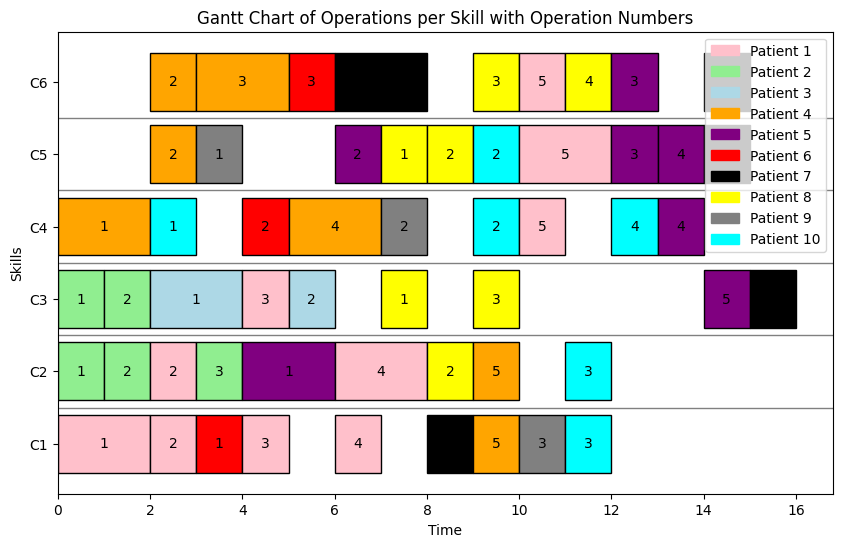

In [ ]:
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import heapq
# Données initiales : patients, compétences et opérations
patients = {
    1: {'operations': [(1, {'C1': 2}), (2, {'C1': 1, 'C2': 1}), (3, {'C1': 1, 'C3': 1}), (4, {'C1': 1, 'C2': 2}), (5, {'C4': 1, 'C5': 2, 'C6': 1})]},
    2: {'operations': [(1, {'C2': 1, 'C3': 1}), (2, {'C2': 1, 'C3': 1}), (3, {'C2': 1})]},
    3: {'operations': [(1, {'C3': 2}), (2, {'C3': 1})]},
    4: {'operations': [(1, {'C4': 2}), (2, {'C5': 1, 'C6': 1}), (3, {'C6': 2}), (4, {'C4': 2}), (5, {'C1': 1, 'C2': 1})]},
    5: {'operations': [(1, {'C2': 2}), (2, {'C5': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C4': 1, 'C5': 1}), (5, {'C3': 1})]},
    6: {'operations': [(1, {'C1': 1}), (2, {'C4': 1}), (3, {'C6': 1})]},
    7: {'operations': [(1, {'C6': 2}), (2, {'C1': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C3': 1})]},
    8: {'operations': [(1, {'C3': 1, 'C5': 1}), (2, {'C2': 1, 'C5': 1}), (3, {'C3': 1, 'C6': 1}),(4, {'C6': 1})]},
    9: {'operations': [(1, {'C5': 1}), (2, {'C4': 1}), (3, {'C1': 1})]},
    10: {'operations': [(1, {'C4': 1}), (2, {'C4': 1, 'C5': 1}), (3, {'C1': 1, 'C2': 1}), (4, {'C4': 1})]}
}



# Compétences disponibles pour chaque patient
skills_available = {'C1': 1, 'C2': 1, 'C3': 1,'C4': 1,'C5': 1,'C6': 1}  # Une seule instance de chaque compétence à la fois

# Couleurs pour chaque patient
patient_colors = {
    1: 'pink',
    2: 'lightgreen',
    3: 'lightblue',
    4: 'orange',
    5: 'purple',
    6: 'red',
    7: 'black',
    8: 'yellow',
    9: 'gray',
    10: 'cyan'
}

# Fonction pour générer une solution initiale

def generate_optimized_schedule(patients, skills_available):
    schedule = {skill: [] for skill in skills_available}
    skill_time = {skill: 0 for skill in skills_available}
    patient_time = {patient: 0 for patient in patients}
    ready_operations = {patient: 0 for patient in patients}

    events = [(0, skill) for skill in skills_available]  # (temps disponible, compétence)
    heapq.heappush(events, (0, 'start'))


    while any(ready_operations[patient] < len(patients[patient]['operations']) for patient in patients):
        current_time, skill = heappop(events)

        assigned = False

        # Essayer d'assigner la compétence à une opération
        for patient, op_index in ready_operations.items():
            if op_index < len(patients[patient]['operations']):
                op_id, skills_needed = patients[patient]['operations'][op_index]

                # Vérifier si la compétence est nécessaire et disponible
                if skill in skills_needed and all(skill_time[req_skill] <= current_time for req_skill in skills_needed.keys()):
                    start_time = max(patient_time[patient], current_time)
                    finish_times = {req_skill: start_time + skills_needed[req_skill] for req_skill in skills_needed.keys()}
                    finish_time = max(finish_times.values())

                    # Assigner chaque compétence et mettre à jour les temps
                    for req_skill, duration in skills_needed.items():
                        schedule[req_skill].append((patient, start_time, finish_times[req_skill], op_id))
                        skill_time[req_skill] = finish_times[req_skill]

                    # Mettre à jour le temps du patient
                    patient_time[patient] = finish_time
                    ready_operations[patient] += 1
                    assigned = True

                    # Ajouter de nouveaux événements de disponibilité pour chaque compétence
                    for req_skill in skills_needed.keys():
                        heappush(events, (finish_times[req_skill], req_skill))
                    break

        # Si la compétence n'a pas été assignée, avancer son temps de disponibilité
        if not assigned:
            heappush(events, (current_time + 1, skill))

    return schedule




# Fonction pour afficher le diagramme de Gantt
def plot_gantt_chart(schedule, patient_colors):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Ajout des blocs dans le diagramme de Gantt avec les numéros d'opération
    for skill, intervals in schedule.items():
        for task in intervals:
            patient, start, end, operation = task
            ax.barh(skill, end - start, left=start, color=patient_colors[patient], edgecolor='black')

            # Ajouter le numéro d'opération au centre du rectangle
            ax.text((start + end) / 2, skill, f'{operation}', va='center', ha='center', color='black', fontsize=10)

    # Lignes horizontales pour séparer les compétences
    skill_positions = list(schedule.keys())
    for i in range(len(skill_positions) - 1):
        ax.axhline(i + 0.5, color='gray', linewidth=1)  # Lignes séparatrices entre compétences

    # Légende
    patches = [mpatches.Patch(color=color, label=f'Patient {patient}') for patient, color in patient_colors.items()]
    plt.legend(handles=patches)

    # Titres et étiquettes
    ax.set_xlabel('Time')
    ax.set_ylabel('Skills')
    ax.set_title('Gantt Chart of Operations per Skill with Operation Numbers')

    plt.show()

# Générer la solution initiale
#initial_solution = generate_initial_solution(patients, skills_available)
initial_solution =generate_optimized_schedule(patients, skills_available)




# Afficher la meilleure solution avec un diagramme de Gantt
plot_gantt_chart(initial_solution, patient_colors)


Algorithme de recuit simulé

Iteration 1/2000, Temperature: 294.00, Best Objective: 19
Iteration 101/2000, Temperature: 38.99, Best Objective: 19
Iteration 201/2000, Temperature: 5.17, Best Objective: 19
Iteration 301/2000, Temperature: 0.69, Best Objective: 19
Iteration 401/2000, Temperature: 0.09, Best Objective: 19
Iteration 501/2000, Temperature: 0.01, Best Objective: 19
Iteration 601/2000, Temperature: 0.00, Best Objective: 19
Iteration 701/2000, Temperature: 0.00, Best Objective: 19
Iteration 801/2000, Temperature: 0.00, Best Objective: 19
Iteration 901/2000, Temperature: 0.00, Best Objective: 19
Iteration 1001/2000, Temperature: 0.00, Best Objective: 19
Iteration 1101/2000, Temperature: 0.00, Best Objective: 19
Iteration 1201/2000, Temperature: 0.00, Best Objective: 19
Iteration 1301/2000, Temperature: 0.00, Best Objective: 19
Iteration 1401/2000, Temperature: 0.00, Best Objective: 19
Iteration 1501/2000, Temperature: 0.00, Best Objective: 19
Iteration 1601/2000, Temperature: 0.00, Best Objective: 19
Iterat

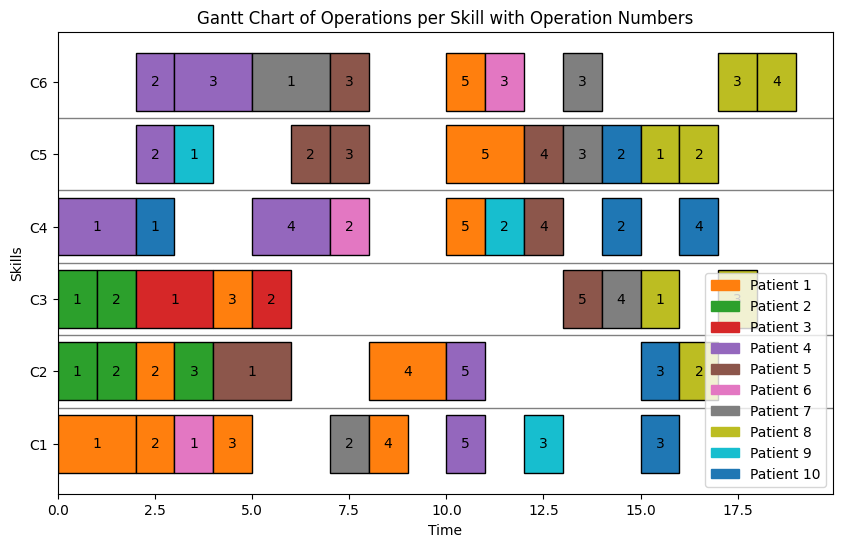

19

In [ ]:
# Importation des bibliothèques nécessaires
import random
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from heapq import heappop, heappush


# Fonction de génération de solution initiale
def generate_optimized_schedule_v7(patients, skills_available):
    schedule = {skill: [] for skill in skills_available}
    skill_time = {skill: 0 for skill in skills_available}
    patient_time = {patient: 0 for patient in patients}
    ready_operations = {patient: 0 for patient in patients}

    # File de priorité pour gérer les événements (temps de disponibilité de chaque compétence ou opération)
    events = [(0, skill) for skill in skills_available]  # (temps disponible, compétence)

    # Boucle jusqu'à ce que toutes les opérations soient assignées
    while any(ready_operations[patient] < len(patients[patient]['operations']) for patient in patients):
        # Extraire le prochain événement disponible
        current_time, skill = heappop(events)

        # Si la compétence n'a pas d'opérations assignables, continuer
        assigned = False

        # Essayer d'assigner la compétence à une opération
        for patient, op_index in ready_operations.items():
            if op_index < len(patients[patient]['operations']):
                op_id, skills_needed = patients[patient]['operations'][op_index]

                # Vérifier que toutes les compétences nécessaires sont disponibles au même moment
                if all(skill_time[req_skill] <= current_time for req_skill in skills_needed.keys()):
                    start_time = max(patient_time[patient], current_time)
                    finish_times = {req_skill: start_time + skills_needed[req_skill] for req_skill in skills_needed.keys()}
                    finish_time = max(finish_times.values())

                    # Assigner chaque compétence et mettre à jour les temps
                    for req_skill, duration in skills_needed.items():
                        schedule[req_skill].append((patient, start_time, finish_times[req_skill], op_id))
                        skill_time[req_skill] = finish_times[req_skill]

                    # Mettre à jour le temps du patient et passer à l'opération suivante
                    patient_time[patient] = finish_time
                    ready_operations[patient] += 1
                    assigned = True

                    # Ajouter les nouveaux événements de disponibilité pour chaque compétence
                    for req_skill in skills_needed.keys():
                        heappush(events, (finish_times[req_skill], req_skill))
                    break

        # Si la compétence n'a pas été assignée, avancer son temps de disponibilité
        if not assigned:
            heappush(events, (current_time + 1, skill))

    return schedule

# Fonction d'évaluation
def evaluate_schedule(schedule):
    max_time = 0
    for skill, tasks in schedule.items():
        for task in tasks:
            _, start, end, _ = task
            max_time = max(max_time, end)
    return max_time

# Générer des voisins optimisés
def generate_neighbors(schedule, num_neighbors=5):
    neighbors = []
    skills = list(schedule.keys())

    for _ in range(num_neighbors):
        skill = random.choice(skills)
        tasks = schedule[skill]
        if len(tasks) < 2:
            continue
        i = random.randint(0, len(tasks) - 2)
        new_schedule = copy.deepcopy(schedule)
        new_schedule[skill][i], new_schedule[skill][i + 1] = new_schedule[skill][i + 1], new_schedule[skill][i]
        neighbors.append(new_schedule)

    return neighbors

# Algorithme de recuit simulé
def simulated_annealing(initial_solution, max_iterations=2000, initial_temp=300, cooling_rate=0.98):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    current_objective = best_objective
    temperature = initial_temp

    for iteration in range(max_iterations):
        # Générer un voisin
        neighbors = generate_neighbors(current_solution, num_neighbors=1)
        neighbor = neighbors[0]
        neighbor_objective = evaluate_schedule(neighbor)

        # Calculer la variation d'énergie (différence entre les objectifs)
        delta = neighbor_objective - current_objective

        # Vérifier si la nouvelle solution doit être acceptée
        if delta < 0 or math.exp(-delta / temperature) > random.random():
            current_solution = neighbor
            current_objective = neighbor_objective

            # Mettre à jour la meilleure solution si on trouve un meilleur objectif
            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective

        # Réduire la température
        temperature *= cooling_rate

        # Afficher les informations de l'itération
        if iteration % 100 == 0 or iteration == max_iterations - 1:
            print(f"Iteration {iteration + 1}/{max_iterations}, Temperature: {temperature:.2f}, Best Objective: {best_objective}")

    return best_solution, best_objective

# Diagramme de Gantt
def plot_gantt_chart(schedule, patient_colors):
    fig, ax = plt.subplots(figsize=(10, 6))

    for skill, intervals in schedule.items():
        for task in intervals:
            patient, start, end, operation = task
            ax.barh(skill, end - start, left=start, color=patient_colors[patient], edgecolor='black')
            ax.text((start + end) / 2, skill, f'{operation}', va='center', ha='center', color='black', fontsize=10)

    skill_positions = list(schedule.keys())
    for i in range(len(skill_positions) - 1):
        ax.axhline(i + 0.5, color='gray', linewidth=1)

    patches = [mpatches.Patch(color=color, label=f'Patient {patient}') for patient, color in patient_colors.items()]
    plt.legend(handles=patches)
    ax.set_xlabel('Time')
    ax.set_ylabel('Skills')
    ax.set_title('Gantt Chart of Operations per Skill with Operation Numbers')

    plt.show()

# Couleurs pour le diagramme
patient_colors = {i: plt.cm.tab10(i % 10) for i in range(1, 11)}

# Générer la solution initiale et exécuter le recuit simulé
initial_solution = generate_optimized_schedule_v7(patients, skills_available)
best_solution_sa, best_objective_sa = simulated_annealing(initial_solution)

# Afficher le diagramme de Gantt pour la meilleure solution trouvée
plot_gantt_chart(best_solution_sa, patient_colors)

# Afficher la valeur optimale trouvée
best_objective_sa


genetic_algorithm

Generation 1/50, Best Objective: 19
Generation 11/50, Best Objective: 19
Generation 21/50, Best Objective: 19
Generation 31/50, Best Objective: 19
Generation 41/50, Best Objective: 19
Generation 50/50, Best Objective: 19


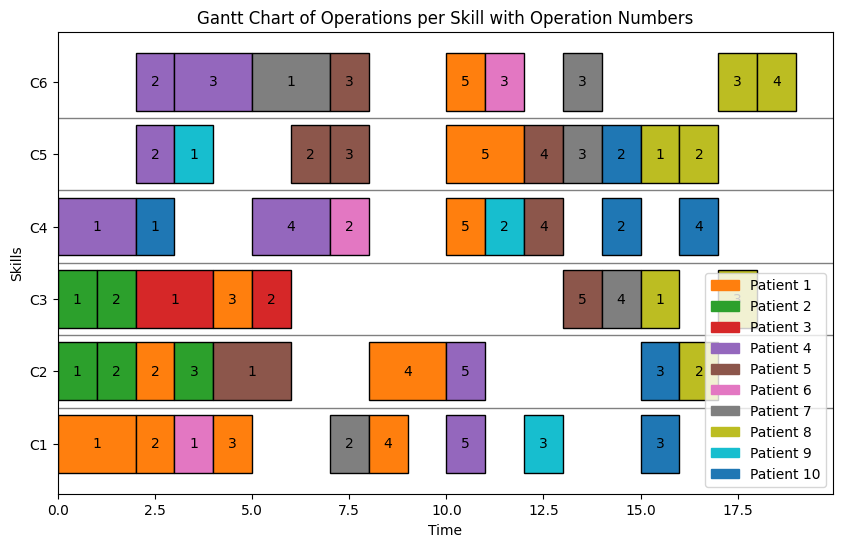

19

In [ ]:
# Algorithme génétique pour l'optimisation de l'ordonnancement
def initialize_population(patients, skills_available, population_size=10):
    """Génère une population initiale de solutions pour le problème."""
    return [generate_optimized_schedule_v7(patients, skills_available) for _ in range(population_size)]

def crossover(parent1, parent2):
    """Effectue un croisement entre deux parents pour produire un enfant."""
    child = {}
    for skill in parent1.keys():
        # Sélection aléatoire de tâches à partir de chaque parent
        tasks = parent1[skill][:len(parent1[skill]) // 2] + parent2[skill][len(parent2[skill]) // 2:]
        child[skill] = sorted(tasks, key=lambda x: x[1])  # Trier par temps de début
    return child

def mutate(schedule, mutation_rate=0.1):
    """Effectue une mutation sur un plan d'ordonnancement avec un taux de mutation."""
    for skill in schedule.keys():
        if random.random() < mutation_rate and len(schedule[skill]) > 1:
            i = random.randint(0, len(schedule[skill]) - 2)
            # Permutation de deux tâches adjacentes
            schedule[skill][i], schedule[skill][i + 1] = schedule[skill][i + 1], schedule[skill][i]
    return schedule

def genetic_algorithm(patients, skills_available, population_size=10, max_generations=50, mutation_rate=0.1):
    # Initialiser la population
    population = initialize_population(patients, skills_available, population_size)
    best_solution = None
    best_objective = float('inf')

    for generation in range(max_generations):
        # Évaluer la population
        evaluated_population = [(schedule, evaluate_schedule(schedule)) for schedule in population]
        evaluated_population.sort(key=lambda x: x[1])  # Trier par makespan

        # Mettre à jour la meilleure solution
        if evaluated_population[0][1] < best_objective:
            best_solution, best_objective = evaluated_population[0]

        # Sélection (on prend la moitié des meilleurs pour la prochaine génération)
        selected_parents = [schedule for schedule, _ in evaluated_population[:population_size // 2]]

        # Générer les enfants par croisement et mutation
        next_population = []
        while len(next_population) < population_size:
            # Sélectionner deux parents aléatoirement parmi les meilleurs
            parent1, parent2 = random.sample(selected_parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_population.append(child)

        # Remplacer la population actuelle
        population = next_population

        # Affichage de la progression
        if generation % 10 == 0 or generation == max_generations - 1:
            print(f"Generation {generation + 1}/{max_generations}, Best Objective: {best_objective}")

    return best_solution, best_objective

# Exécuter l'algorithme génétique
best_solution_ga, best_objective_ga = genetic_algorithm(patients, skills_available)

# Afficher le diagramme de Gantt pour la meilleure solution trouvée par l'algorithme génétique
plot_gantt_chart(best_solution_ga, patient_colors)

# Afficher la valeur optimale trouvée
best_objective_ga


Fonction Multi-Agent (multi_agent_system)
Cette fonction centralise les interactions entre les agents :

Elle génère une solution initiale pour tous les agents.
Les trois agents (tabou, recuit simulé, génétique) optimisent indépendamment la solution.
Après un certain nombre d'itérations, chaque agent partage sa meilleure solution avec les autres. Par exemple, si l'agent tabou a la meilleure solution, elle est utilisée comme point de départ pour les deux autres agents.
Ce processus est répété un certain nombre de fois, permettant aux agents d’exploiter les découvertes des autres pour converger vers une solution plus optimale.

In [ ]:
import random
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from heapq import heappop, heappush

# Fonction d'évaluation de l'ordonnancement
def evaluate_schedule(schedule):
    max_time = 0
    for skill, tasks in schedule.items():
        for task in tasks:
            _, start, end, _ = task
            max_time = max(max_time, end)
    return max_time

# Algorithmes de génération de solutions
def generate_optimized_schedule_v7(patients, skills_available):
    """Fonction de génération de solution initiale pour l'ordonnancement."""
    schedule = {skill: [] for skill in skills_available}
    skill_time = {skill: 0 for skill in skills_available}
    patient_time = {patient: 0 for patient in patients}
    ready_operations = {patient: 0 for patient in patients}
    events = [(0, skill) for skill in skills_available]

    while any(ready_operations[patient] < len(patients[patient]['operations']) for patient in patients):
        current_time, skill = heappop(events)
        assigned = False

        for patient, op_index in ready_operations.items():
            if op_index < len(patients[patient]['operations']):
                op_id, skills_needed = patients[patient]['operations'][op_index]

                if all(skill_time[req_skill] <= current_time for req_skill in skills_needed.keys()):
                    start_time = max(patient_time[patient], current_time)
                    finish_times = {req_skill: start_time + skills_needed[req_skill] for req_skill in skills_needed.keys()}
                    finish_time = max(finish_times.values())

                    for req_skill, duration in skills_needed.items():
                        schedule[req_skill].append((patient, start_time, finish_times[req_skill], op_id))
                        skill_time[req_skill] = finish_times[req_skill]

                    patient_time[patient] = finish_time
                    ready_operations[patient] += 1
                    assigned = True

                    for req_skill in skills_needed.keys():
                        heappush(events, (finish_times[req_skill], req_skill))
                    break

        if not assigned:
            heappush(events, (current_time + 1, skill))

    return schedule

# Agent de recherche taboue
def tabu_agent(initial_solution, max_iterations=100, tabu_size=10):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    tabu_list = []

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        best_neighbor = None
        best_neighbor_objective = float('inf')

        for neighbor in neighbors:
            neighbor_objective = evaluate_schedule(neighbor)
            if neighbor not in tabu_list or neighbor_objective < best_objective:
                if neighbor_objective < best_neighbor_objective:
                    best_neighbor = neighbor
                    best_neighbor_objective = neighbor_objective

        if best_neighbor is None:
            break

        current_solution = best_neighbor
        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        if best_neighbor_objective < best_objective:
            best_solution = best_neighbor
            best_objective = best_neighbor_objective

    return best_solution, best_objective

# Agent de recuit simulé
def simulated_annealing_agent(initial_solution, max_iterations=2000, initial_temp=300, cooling_rate=0.98):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    current_objective = best_objective
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_solution, num_neighbors=1)
        neighbor = neighbors[0]
        neighbor_objective = evaluate_schedule(neighbor)
        delta = neighbor_objective - current_objective

        if delta < 0 or math.exp(-delta / temperature) > random.random():
            current_solution = neighbor
            current_objective = neighbor_objective

            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective

        temperature *= cooling_rate

    return best_solution, best_objective

# Agent génétique  plus de croisement que de mutation
def genetic_algorithm_agent(patients, skills_available, population_size=10, max_generations=50, mutation_rate=0.1):
    population = initialize_population(patients, skills_available, population_size)
    best_solution = None
    best_objective = float('inf')

    for generation in range(max_generations):
        evaluated_population = [(schedule, evaluate_schedule(schedule)) for schedule in population]
        evaluated_population.sort(key=lambda x: x[1])

        if evaluated_population[0][1] < best_objective:
            best_solution, best_objective = evaluated_population[0]

        selected_parents = [schedule for schedule, _ in evaluated_population[:population_size // 2]]
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected_parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_population.append(child)

        population = next_population

    return best_solution, best_objective

# Fonction pour initier le système multi-agent et orchestrer les interactions
def multi_agent_system(patients, skills_available, num_iterations=3):
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    tabu_solution, tabu_obj = tabu_agent(initial_solution)
    sa_solution, sa_obj = simulated_annealing_agent(initial_solution)
    ga_solution, ga_obj = genetic_algorithm_agent(patients, skills_available)

    best_solution, best_objective = initial_solution, evaluate_schedule(initial_solution)

    for iteration in range(num_iterations):
        best_objective = min(tabu_obj, sa_obj, ga_obj)

        if tabu_obj == best_objective:
            sa_solution, sa_obj = simulated_annealing_agent(tabu_solution)
            ga_solution, ga_obj = genetic_algorithm_agent(patients, skills_available)

        elif sa_obj == best_objective:
            tabu_solution, tabu_obj = tabu_agent(sa_solution)
            ga_solution, ga_obj = genetic_algorithm_agent(patients, skills_available)

        elif ga_obj == best_objective:
            tabu_solution, tabu_obj = tabu_agent(ga_solution)
            sa_solution, sa_obj = simulated_annealing_agent(ga_solution)

        best_solution = min((tabu_solution, sa_solution, ga_solution), key=evaluate_schedule)

    return best_solution, evaluate_schedule(best_solution)

# Support pour l'algorithme génétique
def initialize_population(patients, skills_available, population_size=10):
    return [generate_optimized_schedule_v7(patients, skills_available) for _ in range(population_size)]

def crossover(parent1, parent2):
    child = {}
    for skill in parent1.keys():
        tasks = parent1[skill][:len(parent1[skill]) // 2] + parent2[skill][len(parent2[skill]) // 2:]
        child[skill] = sorted(tasks, key=lambda x: x[1])
    return child

def mutate(schedule, mutation_rate=0.1):
    for skill in schedule.keys():
        if random.random() < mutation_rate and len(schedule[skill]) > 1:
            i = random.randint(0, len(schedule[skill]) - 2)
            schedule[skill][i], schedule[skill][i + 1] = schedule[skill][i + 1], schedule[skill][i]
    return schedule

def generate_neighbors(schedule, num_neighbors=5):
    neighbors = []
    skills = list(schedule.keys())

    for _ in range(num_neighbors):
        new_schedule = copy.deepcopy(schedule)
        skill = random.choice(skills)
        tasks = new_schedule[skill]
        if len(tasks) < 2:
            continue
        i = random.randint(0, len(tasks) - 1)
        task = tasks[i]
        patient, start, end, op_id = task
        delta = random.choice([-1, 1])
        new_start = max(0, start + delta)
        new_end = new_start + (end - start)
        new_schedule[skill][i] = (patient, new_start, new_end, op_id)

        neighbors.append(new_schedule)

    return neighbors



best_solution, best_objective = multi_agent_system(patients, skills_available)
print("Best Solution:", best_solution)
print("Best Objective:", best_objective)


Best Solution: {'C1': [(1, 7, 9, 1), (1, 1, 2, 2), (6, 5, 6, 1), (1, 8, 9, 3), (7, 1, 2, 2), (1, 11, 12, 4), (4, 5, 6, 5), (9, 16, 17, 3), (10, 10, 11, 3)], 'C2': [(2, 5, 6, 1), (2, 0, 1, 2), (1, 1, 2, 2), (2, 2, 3, 3), (5, 1, 3, 1), (1, 11, 13, 4), (4, 12, 13, 5), (10, 15, 16, 3), (8, 13, 14, 2)], 'C3': [(2, 0, 1, 1), (2, 4, 5, 2), (3, 1, 3, 1), (1, 0, 1, 3), (3, 6, 7, 2), (5, 12, 13, 5), (7, 5, 6, 4), (8, 14, 15, 1), (8, 12, 13, 3)], 'C4': [(4, 0, 2, 1), (10, 9, 10, 1), (4, 11, 13, 4), (6, 14, 15, 2), (1, 11, 12, 5), (9, 7, 8, 2), (5, 14, 15, 4), (10, 9, 10, 2), (10, 10, 11, 4)], 'C5': [(4, 5, 6, 2), (9, 10, 11, 1), (5, 2, 3, 2), (5, 4, 5, 3), (1, 7, 9, 5), (5, 9, 10, 4), (7, 10, 11, 3), (10, 16, 17, 2), (8, 13, 14, 1), (8, 9, 10, 2)], 'C6': [(4, 3, 4, 2), (4, 8, 10, 3), (7, 2, 4, 1), (5, 8, 9, 3), (1, 7, 8, 5), (6, 10, 11, 3), (7, 16, 17, 3), (8, 15, 16, 3), (8, 16, 17, 4)]}
Best Objective: 17


In [ ]:
import random
import copy
import math
from heapq import heappop, heappush

# Fonction d'évaluation de l'ordonnancement
def evaluate_schedule(schedule):
    max_time = 0
    for skill, tasks in schedule.items():
        for task in tasks:
            _, start, end, _ = task
            max_time = max(max_time, end)
    return max_time

# Algorithmes de génération de solutions
def generate_optimized_schedule_v7(patients, skills_available):
    """Fonction de génération de solution initiale pour l'ordonnancement."""
    schedule = {skill: [] for skill in skills_available}
    skill_time = {skill: 0 for skill in skills_available}
    patient_time = {patient: 0 for patient in patients}
    ready_operations = {patient: 0 for patient in patients}
    events = [(0, skill) for skill in skills_available]

    while any(ready_operations[patient] < len(patients[patient]['operations']) for patient in patients):
        current_time, skill = heappop(events)
        assigned = False

        for patient, op_index in ready_operations.items():
            if op_index < len(patients[patient]['operations']):
                op_id, skills_needed = patients[patient]['operations'][op_index]

                if all(skill_time[req_skill] <= current_time for req_skill in skills_needed.keys()):
                    start_time = max(patient_time[patient], current_time)
                    finish_times = {req_skill: start_time + skills_needed[req_skill] for req_skill in skills_needed.keys()}
                    finish_time = max(finish_times.values())

                    for req_skill, duration in skills_needed.items():
                        schedule[req_skill].append((patient, start_time, finish_times[req_skill], op_id))
                        skill_time[req_skill] = finish_times[req_skill]

                    patient_time[patient] = finish_time
                    ready_operations[patient] += 1
                    assigned = True

                    for req_skill in skills_needed.keys():
                        heappush(events, (finish_times[req_skill], req_skill))
                    break

        if not assigned:
            heappush(events, (current_time + 1, skill))

    return schedule

# Agent de recherche taboue
def tabu_agent(initial_solution, max_iterations=100, tabu_size=10):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    tabu_list = []

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        best_neighbor = None
        best_neighbor_objective = float('inf')

        for neighbor in neighbors:
            neighbor_objective = evaluate_schedule(neighbor)
            if neighbor not in tabu_list or neighbor_objective < best_objective:
                if neighbor_objective < best_neighbor_objective:
                    best_neighbor = neighbor
                    best_neighbor_objective = neighbor_objective

        if best_neighbor is None:
            break

        current_solution = best_neighbor
        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        if best_neighbor_objective < best_objective:
            best_solution = best_neighbor
            best_objective = best_neighbor_objective

    return best_solution

# Agent de recuit simulé
def simulated_annealing_agent(initial_solution, max_iterations=2000, initial_temp=300, cooling_rate=0.98):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    current_objective = best_objective
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_solution, num_neighbors=1)
        neighbor = neighbors[0]
        neighbor_objective = evaluate_schedule(neighbor)
        delta = neighbor_objective - current_objective

        if delta < 0 or math.exp(-delta / temperature) > random.random():
            current_solution = neighbor
            current_objective = neighbor_objective

            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective

        temperature *= cooling_rate

    return best_solution

# Agent génétique plus de croisement que de mutation
def genetic_algorithm_agent(patients, skills_available, population_size=10, max_generations=50, mutation_rate=0.1):
    population = initialize_population(patients, skills_available, population_size)
    best_solution = None
    best_objective = float('inf')

    for generation in range(max_generations):
        evaluated_population = [(schedule, evaluate_schedule(schedule)) for schedule in population]
        evaluated_population.sort(key=lambda x: x[1])

        if evaluated_population[0][1] < best_objective:
            best_solution, best_objective = evaluated_population[0]

        selected_parents = [schedule for schedule, _ in evaluated_population[:population_size // 2]]
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected_parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_population.append(child)

        population = next_population

    return best_solution

# Fonction pour initier le système multi-agent et orchestrer les interactions
def multi_agent_system(patients, skills_available, num_iterations=3):
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)

    # Collaboration entre les agents : partage des meilleures solutions
    tabu_solution = tabu_agent(initial_solution)
    sa_solution = simulated_annealing_agent(initial_solution)
    ga_solution = genetic_algorithm_agent(patients, skills_available)

    best_solution = min([tabu_solution, sa_solution, ga_solution], key=evaluate_schedule)
    best_objective = evaluate_schedule(best_solution)

    for iteration in range(num_iterations):
        # Chaque agent partage sa solution avec les autres
        tabu_solution = tabu_agent(best_solution)
        sa_solution = simulated_annealing_agent(best_solution)
        ga_solution = genetic_algorithm_agent(patients, skills_available)

        # Les agents améliorent collectivement la solution
        best_solution = min([tabu_solution, sa_solution, ga_solution], key=evaluate_schedule)
        best_objective = evaluate_schedule(best_solution)

    return best_solution, best_objective

# Support pour l'algorithme génétique
def initialize_population(patients, skills_available, population_size=10):
    return [generate_optimized_schedule_v7(patients, skills_available) for _ in range(population_size)]

def crossover(parent1, parent2):
    child = {}
    for skill in parent1.keys():
        tasks = parent1[skill][:len(parent1[skill]) // 2] + parent2[skill][len(parent2[skill]) // 2:]
        child[skill] = sorted(tasks, key=lambda x: x[1])
    return child

def mutate(schedule, mutation_rate=0.1):
    for skill in schedule.keys():
        if random.random() < mutation_rate and len(schedule[skill]) > 1:
            i = random.randint(0, len(schedule[skill]) - 2)
            schedule[skill][i], schedule[skill][i + 1] = schedule[skill][i + 1], schedule[skill][i]
    return schedule

def generate_neighbors(schedule, num_neighbors=5):
    neighbors = []
    skills = list(schedule.keys())

    for _ in range(num_neighbors):
        new_schedule = copy.deepcopy(schedule)
        skill = random.choice(skills)
        tasks = new_schedule[skill]
        if len(tasks) < 2:
            continue
        i = random.randint(0, len(tasks) - 1)
        task = tasks[i]
        patient, start, end, op_id = task
        delta = random.choice([-1, 1])
        new_start = max(0, start + delta)
        new_end = new_start + (end - start)
        new_schedule[skill][i] = (patient, new_start, new_end, op_id)

        neighbors.append(new_schedule)

    return neighbors


# Exemple d'exécution
best_solution, best_objective = multi_agent_system(patients, skills_available)
print("Best Solution:", best_solution)
print("Best Objective:", best_objective)


Best Solution: {'C1': [(1, 0, 2, 1), (1, 2, 3, 2), (6, 3, 4, 1), (1, 4, 5, 3), (7, 8, 9, 2), (1, 8, 9, 4), (4, 9, 10, 5), (9, 10, 11, 3), (10, 16, 17, 3)], 'C2': [(2, 0, 1, 1), (2, 0, 1, 2), (1, 1, 2, 2), (2, 3, 4, 3), (5, 4, 6, 1), (1, 10, 12, 4), (4, 9, 10, 5), (10, 15, 16, 3), (8, 16, 17, 2)], 'C3': [(2, 0, 1, 1), (2, 0, 1, 2), (3, 2, 4, 1), (1, 4, 5, 3), (3, 4, 5, 2), (5, 12, 13, 5), (7, 12, 13, 4), (8, 13, 14, 1), (8, 16, 17, 3)], 'C4': [(4, 0, 2, 1), (10, 0, 1, 1), (4, 6, 8, 4), (6, 7, 8, 2), (1, 10, 11, 5), (9, 12, 13, 2), (5, 13, 14, 4), (10, 15, 16, 2), (10, 16, 17, 4)], 'C5': [(4, 2, 3, 2), (9, 5, 6, 1), (5, 7, 8, 2), (5, 7, 8, 3), (1, 13, 15, 5), (5, 11, 12, 4), (7, 14, 15, 3), (10, 13, 14, 2), (8, 16, 17, 1), (8, 16, 17, 2)], 'C6': [(4, 2, 3, 2), (4, 4, 6, 3), (7, 4, 6, 1), (5, 6, 7, 3), (1, 10, 11, 5), (6, 13, 14, 3), (7, 12, 13, 3), (8, 15, 16, 3), (8, 16, 17, 4)]}
Best Objective: 17


In [ ]:
import random
import copy
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import math
import numpy as np
import matplotlib.patches as mpatches
from collections import defaultdict

# Données initiales : patients, compétences et opérations
patients = {
    1: {'operations': [(1, {'C1': 2}), (2, {'C1': 1, 'C2': 1}), (3, {'C1': 1, 'C3': 1}), (4, {'C1': 1, 'C2': 2}), (5, {'C4': 1, 'C5': 2, 'C6': 1})]},
    2: {'operations': [(1, {'C2': 1, 'C3': 1}), (2, {'C2': 1, 'C3': 1}), (3, {'C2': 1})]},
    3: {'operations': [(1, {'C3': 2}), (2, {'C3': 1})]},
    4: {'operations': [(1, {'C4': 2}), (2, {'C5': 1, 'C6': 1}), (3, {'C6': 2}), (4, {'C4': 2}), (5, {'C1': 1, 'C2': 1})]},
    5: {'operations': [(1, {'C2': 2}), (2, {'C5': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C4': 1, 'C5': 1}), (5, {'C3': 1})]},
    6: {'operations': [(1, {'C1': 1}), (2, {'C4': 1}), (3, {'C6': 1})]},
    7: {'operations': [(1, {'C6': 2}), (2, {'C1': 1}), (3, {'C5': 1, 'C6': 1}), (4, {'C3': 1})]},
    8: {'operations': [(1, {'C3': 1, 'C5': 1}), (2, {'C2': 1, 'C5': 1}), (3, {'C3': 1, 'C6': 1}),(4, {'C6': 1})]},
    9: {'operations': [(1, {'C5': 1}), (2, {'C4': 1}), (3, {'C1': 1})]},
    10: {'operations': [(1, {'C4': 1}), (2, {'C4': 1, 'C5': 1}), (3, {'C1': 1, 'C2': 1}), (4, {'C4': 1})]}
}

# Compétences disponibles pour chaque patient
skills_available = {'C1': 1, 'C2': 1, 'C3': 1,'C4': 1,'C5': 1,'C6': 1}  # Une seule instance de chaque compétence à la fois

# Define colors for patients
patient_colors = {
    1: '#FF9999',  # Light red
    2: '#66B2FF',  # Light blue
    3: '#99FF99',  # Light green
    4: '#FFCC99',  # Light orange
    5: '#FF99CC',  # Light pink
    6: '#99CCFF',  # Light cyan
    7: '#FFB366',  # Light orange
    8: '#B366FF',  # Light purple
    9: '#66FFB2',  # Light mint
    10: '#FF66B2'  # Light magenta
}

def initialize_population(patients, skills_available, population_size=10):
    return [generate_optimized_schedule_v7(patients, skills_available) for _ in range(population_size)]

def crossover(parent1, parent2):
    child = {}
    for skill in parent1.keys():
        tasks = parent1[skill][:len(parent1[skill]) // 2] + parent2[skill][len(parent2[skill]) // 2:]
        child[skill] = sorted(tasks, key=lambda x: x[1])
    return child

def mutate(schedule, mutation_rate=0.1):
    for skill in schedule.keys():
        if random.random() < mutation_rate and len(schedule[skill]) > 1:
            i = random.randint(0, len(schedule[skill]) - 2)
            schedule[skill][i], schedule[skill][i + 1] = schedule[skill][i + 1], schedule[skill][i]
    return schedule

def generate_neighbors(schedule, num_neighbors=5):
    """Generate neighboring solutions by making small modifications to the current schedule"""
    neighbors = []
    skills = list(schedule.keys())

    for _ in range(num_neighbors):
        new_schedule = copy.deepcopy(schedule)
        skill = random.choice(skills)
        tasks = new_schedule[skill]
        if len(tasks) < 2:
            continue

        # Try to find a valid move
        max_attempts = 10
        for _ in range(max_attempts):
            i = random.randint(0, len(tasks) - 1)
            task = tasks[i]
            patient, start, end, op_id = task

            # Calculate valid time window
            prev_end = 0 if i == 0 else tasks[i-1][2]
            next_start = float('inf') if i == len(tasks)-1 else tasks[i+1][1]

            # Try to move the task within valid window
            delta = random.choice([-1, 1])
            new_start = max(prev_end, start + delta)
            new_end = new_start + (end - start)

            # Check if the move is valid
            if new_end <= next_start:
                new_schedule[skill][i] = (patient, new_start, new_end, op_id)
                # Verify no overlaps in other skills
                if not has_overlaps(new_schedule):
                    neighbors.append(new_schedule)
                break

    return neighbors if neighbors else [schedule]

def has_overlaps(schedule):
    """Check if there are any overlapping operations in the schedule"""
    for patient in patients:
        patient_tasks = []
        for skill, tasks in schedule.items():
            for task in tasks:
                if task[0] == patient:
                    patient_tasks.append(task)

        # Sort tasks by start time
        patient_tasks.sort(key=lambda x: x[1])

        # Check for overlaps
        for i in range(len(patient_tasks)-1):
            if patient_tasks[i][2] > patient_tasks[i+1][1]:
                return True
    return False

def reconstruct_schedule_from_state(state):
    """Reconstruct a schedule from its state representation"""
    # If state is not a dictionary, try to convert it
    if not isinstance(state, dict):
        try:
            state = unhash_state(state)
        except Exception as e:
            print(f"Error converting state: {e}")
            return generate_optimized_schedule_v7(patients, skills_available)

    schedule = {skill: [] for skill in skills_available}

    # Get the original schedule from the initial solution
    initial_schedule = generate_optimized_schedule_v7(patients, skills_available)

    # For each patient, reconstruct their tasks based on completion status
    for patient in patients:
        if state.get('operation_completion', {}).get(patient, 0) > 0:
            # Get the patient's operations
            patient_ops = patients[patient]['operations']
            completed_ops = int(len(patient_ops) * state['operation_completion'][patient])

            # Find tasks for this patient in the initial schedule
            for skill, tasks in initial_schedule.items():
                for task in tasks:
                    if task[0] == patient and task[3] <= completed_ops:
                        # Adjust the task timing based on state information
                        _, start, end, op_id = task
                        # Scale the timing based on total_time
                        scale_factor = state.get('total_time', 0) / evaluate_schedule(initial_schedule)
                        new_start = int(start * scale_factor)
                        new_end = int(end * scale_factor)
                        schedule[skill].append((patient, new_start, new_end, op_id))

    # Sort tasks by start time for each skill
    for skill in schedule:
        schedule[skill].sort(key=lambda x: x[1])

    return schedule

def get_state_representation(schedule):
    """Convert schedule into a meaningful state representation for RL"""
    state = {
        'total_time': evaluate_schedule(schedule),
        'skill_utilization': {},
        'patient_wait_times': {},
        'operation_completion': {}
    }

    # Calculate skill utilization
    for skill, tasks in schedule.items():
        total_time = 0
        for task in tasks:
            _, start, end, _ = task
            total_time += (end - start)
        state['skill_utilization'][skill] = total_time / state['total_time'] if state['total_time'] > 0 else 0

    # Calculate patient wait times and completion status
    for patient in patients:
        patient_tasks = []
        for skill, tasks in schedule.items():
            for task in tasks:
                if task[0] == patient:
                    patient_tasks.append(task)

        if patient_tasks:
            wait_time = sum(task[1] - (0 if i == 0 else patient_tasks[i-1][2])
                          for i, task in enumerate(patient_tasks))
            state['patient_wait_times'][patient] = wait_time
            state['operation_completion'][patient] = len(patient_tasks) / len(patients[patient]['operations'])
        else:
            state['patient_wait_times'][patient] = 0
            state['operation_completion'][patient] = 0

    return state

# Fonction d'évaluation de l'ordonnancement
def evaluate_schedule(schedule):
    max_time = 0
    for skill, tasks in schedule.items():
        for task in tasks:
            _, start, end, _ = task
            max_time = max(max_time, end)
    return max_time

# Algorithmes de génération de solutions
def generate_optimized_schedule_v7(patients, skills_available):
    """Fonction de génération de solution initiale pour l'ordonnancement."""
    schedule = {skill: [] for skill in skills_available}
    skill_time = {skill: 0 for skill in skills_available}
    patient_time = {patient: 0 for patient in patients}
    ready_operations = {patient: 0 for patient in patients}
    events = [(0, skill) for skill in skills_available]

    while any(ready_operations[patient] < len(patients[patient]['operations']) for patient in patients):
        current_time, skill = heappop(events)
        assigned = False

        for patient, op_index in ready_operations.items():
            if op_index < len(patients[patient]['operations']):
                op_id, skills_needed = patients[patient]['operations'][op_index]

                if all(skill_time[req_skill] <= current_time for req_skill in skills_needed.keys()):
                    start_time = max(patient_time[patient], current_time)
                    finish_times = {req_skill: start_time + skills_needed[req_skill] for req_skill in skills_needed.keys()}
                    finish_time = max(finish_times.values())

                    for req_skill, duration in skills_needed.items():
                        schedule[req_skill].append((patient, start_time, finish_times[req_skill], op_id))
                        skill_time[req_skill] = finish_times[req_skill]

                    patient_time[patient] = finish_time
                    ready_operations[patient] += 1
                    assigned = True

                    for req_skill in skills_needed.keys():
                        heappush(events, (finish_times[req_skill], req_skill))
                    break

        if not assigned:
            heappush(events, (current_time + 1, skill))

    return schedule

# Q-learning update for Tabu agent
# Tabu agent with Q-learning
def tabu_agent_with_q_learning(initial_solution, max_iterations=100, tabu_size=10, alpha=0.1, gamma=0.9, epsilon=0.1):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    tabu_list = []
    diversification_list = []  # Track solutions to avoid revisiting
    iteration_without_improvement = 0
    adaptive_tabu_size = tabu_size

    # Initialize Q-table
    Q_table = {}
    current_state = get_state_representation(current_solution)

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        best_neighbor = None
        best_neighbor_objective = float('inf')
        best_non_tabu_neighbor = None
        best_non_tabu_objective = float('inf')

        # Evaluate all neighbors
        for neighbor in neighbors:
            neighbor_objective = evaluate_schedule(neighbor)

            # Check if neighbor is tabu
            is_tabu = neighbor in tabu_list
            is_diversification = neighbor in diversification_list

            # Aspiration criteria: accept tabu solution if it's better than best solution
            if neighbor_objective < best_objective:
                best_neighbor = neighbor
                best_neighbor_objective = neighbor_objective
            elif not is_tabu and not is_diversification:
                if neighbor_objective < best_non_tabu_objective:
                    best_non_tabu_neighbor = neighbor
                    best_non_tabu_objective = neighbor_objective

        # If no improvement found, use best non-tabu neighbor
        if best_neighbor is None:
            best_neighbor = best_non_tabu_neighbor
            best_neighbor_objective = best_non_tabu_objective

        if best_neighbor is None:
            # Diversification: generate new solution
            current_solution = generate_optimized_schedule_v7(patients, skills_available)
            current_state = get_state_representation(current_solution)
            continue

        # Update Q-table
        new_state = get_state_representation(best_neighbor)
        reward = calculate_reward(current_state, new_state, best_neighbor)
        Q_table = q_learning_update(Q_table, current_state, best_neighbor, reward, new_state, alpha, gamma)

        # Update current solution
        current_solution = best_neighbor
        current_state = new_state

        # Update tabu list
        tabu_list.append(current_solution)
        if len(tabu_list) > adaptive_tabu_size:
            tabu_list.pop(0)

        # Update best solution
        if best_neighbor_objective < best_objective:
            best_solution = best_neighbor
            best_objective = best_neighbor_objective
            iteration_without_improvement = 0
            # Reduce tabu size when finding improvements
            adaptive_tabu_size = max(5, adaptive_tabu_size - 1)
        else:
            iteration_without_improvement += 1
            # Increase tabu size when stuck
            adaptive_tabu_size = min(20, adaptive_tabu_size + 1)

        # Diversification strategy
        if iteration_without_improvement > 20:
            diversification_list.append(current_solution)
            if len(diversification_list) > 5:
                diversification_list.pop(0)
            current_solution = generate_optimized_schedule_v7(patients, skills_available)
            current_state = get_state_representation(current_solution)
            iteration_without_improvement = 0

        epsilon = max(0.01, epsilon * 0.995)

    return best_solution, best_objective, Q_table

# Simulated Annealing agent with Q-learning
def simulated_annealing_agent_with_q_learning(initial_solution, max_iterations=2000, initial_temp=300, cooling_rate=0.98, alpha=0.1, gamma=0.9, epsilon=0.1):
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    current_objective = best_objective
    temperature = initial_temp

    # Initialize Q-table
    Q_table = {}
    current_state = get_state_representation(current_solution)

    # Adaptive parameters
    acceptance_rate = 0
    improvement_rate = 0
    iterations_since_improvement = 0
    min_temp = 0.1

    for iteration in range(max_iterations):
        # Generate multiple neighbors and select the best one
        neighbors = generate_neighbors(current_solution, num_neighbors=5)
        best_neighbor = None
        best_neighbor_objective = float('inf')

        for neighbor in neighbors:
            neighbor_objective = evaluate_schedule(neighbor)
            if neighbor_objective < best_neighbor_objective:
                best_neighbor = neighbor
                best_neighbor_objective = neighbor_objective

        if best_neighbor is None:
            continue

        delta = best_neighbor_objective - current_objective

        # Adaptive temperature adjustment
        if iteration > 0 and iteration % 100 == 0:
            if acceptance_rate < 0.1:  # Too few acceptances
                temperature *= 1.1  # Increase temperature
            elif acceptance_rate > 0.5:  # Too many acceptances
                temperature *= 0.9  # Decrease temperature
            acceptance_rate = 0

        # Acceptance probability with adaptive temperature
        if delta < 0 or math.exp(-delta / temperature) > random.random():
            # Update Q-table
            new_state = get_state_representation(best_neighbor)
            reward = calculate_reward(current_state, new_state, best_neighbor)
            Q_table = q_learning_update(Q_table, current_state, best_neighbor, reward, new_state, alpha, gamma)

            current_solution = best_neighbor
            current_objective = best_neighbor_objective
            current_state = new_state
            acceptance_rate += 1

            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective
                iterations_since_improvement = 0
                improvement_rate += 1
            else:
                iterations_since_improvement += 1

        # Adaptive cooling schedule
        if iteration % 100 == 0:
            if improvement_rate < 0.1:  # Few improvements
                cooling_rate = min(0.99, cooling_rate * 1.1)  # Slower cooling
            elif improvement_rate > 0.3:  # Many improvements
                cooling_rate = max(0.95, cooling_rate * 0.9)  # Faster cooling
            improvement_rate = 0

        # Temperature update with adaptive cooling
        temperature = max(min_temp, temperature * cooling_rate)

        # Restart strategy
        if iterations_since_improvement > 500:
            current_solution = generate_optimized_schedule_v7(patients, skills_available)
            current_objective = evaluate_schedule(current_solution)
            current_state = get_state_representation(current_solution)
            temperature = initial_temp
            iterations_since_improvement = 0

        epsilon = max(0.01, epsilon * 0.995)

    return best_solution, best_objective, Q_table

# Genetic Algorithm agent with Q-learning
def genetic_algorithm_agent_with_q_learning(patients, skills_available, population_size=10, max_generations=50, mutation_rate=0.1, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize population
    population = initialize_population(patients, skills_available, population_size)
    best_solution = None
    best_objective = float('inf')

    # Initialize Q-table
    Q_table = {}

    # Adaptive parameters
    current_mutation_rate = mutation_rate
    diversity_threshold = 0.3
    elite_size = max(1, population_size // 10)  # Keep 10% of best solutions

    for generation in range(max_generations):
        # Evaluate population
        evaluated_population = [(schedule, evaluate_schedule(schedule)) for schedule in population]
        evaluated_population.sort(key=lambda x: x[1])

        # Update best solution
        if evaluated_population[0][1] < best_objective:
            best_solution, best_objective = evaluated_population[0]

        # Elitism: keep best solutions
        next_population = [schedule for schedule, _ in evaluated_population[:elite_size]]

        # Calculate population diversity
        diversity = calculate_population_diversity(population)

        # Adaptive mutation rate
        if diversity < diversity_threshold:
            current_mutation_rate = min(0.5, current_mutation_rate * 1.1)  # Increase mutation
        else:
            current_mutation_rate = max(0.05, current_mutation_rate * 0.9)  # Decrease mutation

        # Generate offspring
        while len(next_population) < population_size:
            # Tournament selection
            parent1 = tournament_selection(evaluated_population)
            parent2 = tournament_selection(evaluated_population)

            # Crossover with adaptive probability
            if random.random() < 0.8:  # 80% chance of crossover
                child = adaptive_crossover(parent1, parent2)
            else:
                child = copy.deepcopy(parent1)

            # Mutation with adaptive rate
            if random.random() < current_mutation_rate:
                child = adaptive_mutation(child)

            next_population.append(child)

        # Update Q-table for each individual
        for schedule in population:
            current_state = get_state_representation(schedule)
            neighbors = generate_neighbors(schedule)
            if not neighbors:
                continue

            # Select action using epsilon-greedy policy
            if random.random() < epsilon:
                action = random.choice(neighbors)
            else:
                state_tuple = make_hashable(current_state)
                if state_tuple in Q_table and Q_table[state_tuple]:
                    best_action = max(Q_table[state_tuple].items(), key=lambda x: x[1])[0]
                    if isinstance(best_action, tuple):
                        state_dict = unhash_state(best_action)
                        action = reconstruct_schedule_from_state(state_dict)
                    else:
                        action = best_action
                else:
                    action = random.choice(neighbors)

            new_state = get_state_representation(action)
            reward = calculate_reward(current_state, new_state, action)
            Q_table = q_learning_update(Q_table, current_state, action, reward, new_state, alpha, gamma)

        population = next_population
        epsilon = max(0.01, epsilon * 0.995)

    return best_solution, best_objective, Q_table

def tournament_selection(evaluated_population, tournament_size=3):
    """Select parent using tournament selection"""
    tournament = random.sample(evaluated_population, tournament_size)
    return min(tournament, key=lambda x: x[1])[0]

def adaptive_crossover(parent1, parent2):
    """Perform adaptive crossover between two parents"""
    child = {}
    for skill in parent1.keys():
        # Randomly choose crossover point
        crossover_point = random.randint(0, len(parent1[skill]))

        # Combine tasks from both parents
        tasks = parent1[skill][:crossover_point] + parent2[skill][crossover_point:]

        # Remove duplicates while preserving order
        seen = set()
        unique_tasks = []
        for task in tasks:
            if task not in seen:
                seen.add(task)
                unique_tasks.append(task)

        child[skill] = unique_tasks

    return child

def adaptive_mutation(schedule):
    """Perform adaptive mutation on the schedule"""
    mutated = copy.deepcopy(schedule)
    for skill in mutated.keys():
        if random.random() < 0.3 and len(mutated[skill]) > 1:  # 30% chance to mutate each skill
            # Swap two random tasks
            i, j = random.sample(range(len(mutated[skill])), 2)
            mutated[skill][i], mutated[skill][j] = mutated[skill][j], mutated[skill][i]

            # Randomly adjust timing
            task = mutated[skill][i]
            patient, start, end, op_id = task
            delta = random.choice([-1, 1])
            new_start = max(0, start + delta)
            new_end = new_start + (end - start)
            mutated[skill][i] = (patient, new_start, new_end, op_id)

    return mutated

def calculate_population_diversity(population):
    """Calculate the diversity of the population"""
    if not population:
        return 0

    total_diversity = 0
    for i in range(len(population)):
        for j in range(i + 1, len(population)):
            # Calculate Hamming distance between schedules
            distance = 0
            for skill in population[i].keys():
                if skill not in population[j]:
                    distance += len(population[i][skill])
                else:
                    distance += sum(1 for t1, t2 in zip(population[i][skill], population[j][skill]) if t1 != t2)
            total_diversity += distance

    # Normalize diversity
    max_possible_distance = len(population[0]) * max(len(tasks) for tasks in population[0].values())
    return total_diversity / (len(population) * (len(population) - 1) * max_possible_distance)

def calculate_reward(old_state, new_state, action):
    """Calculate reward based on multiple objectives"""
    if not isinstance(old_state, dict) or not isinstance(new_state, dict):
        return -1000  # Large negative reward for invalid states

    # Convert states to schedules if needed
    old_schedule = reconstruct_schedule_from_state(old_state)
    new_schedule = reconstruct_schedule_from_state(new_state)

    # Calculate time improvement
    old_time = evaluate_schedule(old_schedule)
    new_time = evaluate_schedule(new_schedule)
    time_improvement = old_time - new_time

    # Calculate skill utilization
    old_utilization = calculate_skill_utilization(old_schedule)
    new_utilization = calculate_skill_utilization(new_schedule)
    utilization_improvement = new_utilization - old_utilization

    # Calculate patient wait time reduction
    old_wait = calculate_total_wait_time(old_schedule)
    new_wait = calculate_total_wait_time(new_schedule)
    wait_improvement = old_wait - new_wait

    # Calculate operation completion improvement
    old_completion = calculate_operation_completion(old_schedule)
    new_completion = calculate_operation_completion(new_schedule)
    completion_improvement = new_completion - old_completion

    # Combine rewards with weights
    reward = (
        2.0 * time_improvement +  # Weight time improvement more heavily
        1.5 * utilization_improvement +
        1.0 * wait_improvement +
        1.0 * completion_improvement
    )

    # Penalize invalid schedules
    if has_overlaps(new_schedule):
        reward -= 1000

    return reward

def calculate_skill_utilization(schedule):
    """Calculate the utilization of each skill"""
    total_utilization = 0
    for skill, tasks in schedule.items():
        if not tasks:
            continue
        total_time = max(task[2] for task in tasks)
        busy_time = sum(task[2] - task[1] for task in tasks)
        utilization = busy_time / total_time if total_time > 0 else 0
        total_utilization += utilization
    return total_utilization / len(schedule)

def calculate_total_wait_time(schedule):
    """Calculate total wait time between operations for each patient"""
    total_wait = 0
    for patient in patients:
        patient_tasks = []
        for skill, tasks in schedule.items():
            for task in tasks:
                if task[0] == patient:
                    patient_tasks.append(task)

        # Sort tasks by start time
        patient_tasks.sort(key=lambda x: x[1])

        # Calculate wait time between consecutive operations
        for i in range(len(patient_tasks)-1):
            wait = patient_tasks[i+1][1] - patient_tasks[i][2]
            total_wait += max(0, wait)

    return total_wait

def calculate_operation_completion(schedule):
    """Calculate the percentage of operations completed"""
    # Calculate total operations across all patients
    total_ops = 0
    for patient_id in patients:
        total_ops += len(patients[patient_id]['operations'])

    # Count completed operations
    completed_ops = 0
    for patient_id in patients:
        completed = set()
        for skill, tasks in schedule.items():
            for task in tasks:
                if task[0] == patient_id:
                    completed.add(task[3])
        completed_ops += len(completed)

    return completed_ops / total_ops if total_ops > 0 else 0

def q_learning_update(Q_table, state, action, reward, next_state, alpha=0.1, gamma=0.9):
    """Update Q-values using Q-learning"""
    # Convert all inputs to hashable types
    state_tuple = make_hashable(state)
    action_tuple = make_hashable(action)
    next_state_tuple = make_hashable(next_state)

    # Get the maximum future Q-value for the next state
    max_future_q = max(Q_table.get(next_state_tuple, {}).values(), default=0)

    # Get current Q-value
    current_q = Q_table.get(state_tuple, {}).get(action_tuple, 0)

    # Q-learning update rule
    Q_table.setdefault(state_tuple, {})[action_tuple] = current_q + alpha * (reward + gamma * max_future_q - current_q)

    return Q_table

def make_hashable(obj):
    """Convert objects to hashable types while preserving structure"""
    if isinstance(obj, dict):
        return tuple(sorted((make_hashable(k), make_hashable(v)) for k, v in obj.items()))
    elif isinstance(obj, list):
        return tuple(make_hashable(x) for x in obj)
    elif isinstance(obj, tuple):
        return tuple(make_hashable(x) for x in obj)
    else:
        return obj

def unhash_state(state_tuple):
    """Convert hashable state tuple back to dictionary"""
    if not isinstance(state_tuple, tuple):
        return state_tuple

    # Handle the case where state_tuple is a tuple of (key, value) pairs
    if len(state_tuple) > 0 and isinstance(state_tuple[0], tuple) and len(state_tuple[0]) == 2:
        state_dict = {}
        for pair in state_tuple:
            if isinstance(pair, tuple) and len(pair) == 2:
                k, v = pair
                if isinstance(v, tuple):
                    state_dict[k] = unhash_state(v)
                else:
                    state_dict[k] = v
        return state_dict

    # Handle the case where state_tuple is a flat tuple of values
    return list(state_tuple)

def select_action(Q_table, state, epsilon=0.1):
    """Epsilon-greedy action selection"""
    if isinstance(state, dict) and 'total_time' in state:
        # If state is a state representation, convert it to a schedule
        schedule = reconstruct_schedule_from_state(state)
    else:
        schedule = state

    if random.random() < epsilon:
        # Exploration: randomly select a neighbor
        neighbors = generate_neighbors(schedule)
        if not neighbors:  # If no neighbors generated, create a new solution
            return generate_optimized_schedule_v7(patients, skills_available)
        return random.choice(neighbors)
    else:
        # Exploitation: select best known action
        state_tuple = make_hashable(state)
        if state_tuple in Q_table and Q_table[state_tuple]:
            best_action = max(Q_table[state_tuple].items(), key=lambda x: x[1])[0]
            # Convert tuple action back to schedule if needed
            if isinstance(best_action, tuple):
                try:
                    # First convert the state tuple back to a dictionary
                    state_dict = unhash_state(best_action)
                    return reconstruct_schedule_from_state(state_dict)
                except Exception as e:
                    print(f"Error converting action: {e}")
                    return generate_optimized_schedule_v7(patients, skills_available)
            return best_action
        # If no Q-values available, generate a new solution
        return generate_optimized_schedule_v7(patients, skills_available)

def run_individual_agents(patients, skills_available):
    """Run each agent separately and display their results"""
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)

    print("\n=== Tabu Search Agent Results ===")
    tabu_solution, tabu_obj, _ = tabu_agent_with_q_learning(initial_solution)
    print(f"Best Objective Value: {tabu_obj}")
    print("Schedule:")
    for skill, tasks in tabu_solution.items():
        print(f"\n{skill}:")
        for task in tasks:
            print(f"  Patient {task[0]}, Operation {task[3]}: {task[1]}-{task[2]}")

    print("\n=== Simulated Annealing Agent Results ===")
    sa_solution, sa_obj, _ = simulated_annealing_agent_with_q_learning(initial_solution)
    print(f"Best Objective Value: {sa_obj}")
    print("Schedule:")
    for skill, tasks in sa_solution.items():
        print(f"\n{skill}:")
        for task in tasks:
            print(f"  Patient {task[0]}, Operation {task[3]}: {task[1]}-{task[2]}")

    print("\n=== Genetic Algorithm Agent Results ===")
    ga_solution, ga_obj, _ = genetic_algorithm_agent_with_q_learning(patients, skills_available)
    print(f"Best Objective Value: {ga_obj}")
    print("Schedule:")
    for skill, tasks in ga_solution.items():
        print(f"\n{skill}:")
        for task in tasks:
            print(f"  Patient {task[0]}, Operation {task[3]}: {task[1]}-{task[2]}")

    return tabu_solution, tabu_obj, sa_solution, sa_obj, ga_solution, ga_obj

def multi_agent_system_with_q_learning(patients, skills_available, num_iterations=3):
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)

    # Track performance of each agent
    agent_performance = {
        'tabu': [],
        'sa': [],
        'ga': []
    }

    for iteration in range(num_iterations):
        # Run each agent with the current best solution
        tabu_solution, tabu_obj, _ = tabu_agent_with_q_learning(best_solution)
        sa_solution, sa_obj, _ = simulated_annealing_agent_with_q_learning(best_solution)
        ga_solution, ga_obj, _ = genetic_algorithm_agent_with_q_learning(patients, skills_available)

        # Track performance
        agent_performance['tabu'].append(tabu_obj)
        agent_performance['sa'].append(sa_obj)
        agent_performance['ga'].append(ga_obj)

        # Update best solution if any agent found a better one
        if tabu_obj < best_objective:
            best_solution = tabu_solution
            best_objective = tabu_obj
        if sa_obj < best_objective:
            best_solution = sa_solution
            best_objective = sa_obj
        if ga_obj < best_objective:
            best_solution = ga_solution
            best_objective = ga_obj

    # Print performance statistics
    print("\nAgent Performance Statistics:")
    for agent, performance in agent_performance.items():
        avg_performance = sum(performance) / len(performance)
        best_performance = min(performance)
        print(f"{agent.upper()}: Average = {avg_performance:.2f}, Best = {best_performance}")

    return best_solution, best_objective

def multi_agent_system_without_q_learning(patients, skills_available, num_iterations=3):
    """Multi-agent system without Q-learning"""
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)

    print("\nStarting Multi-Agent System without Q-learning...")
    for iteration in range(num_iterations):
        print(f"\nMulti-Agent Iteration {iteration + 1}/{num_iterations}")

        print("Running Tabu Search...")
        tabu_solution, tabu_obj = tabu_agent(best_solution)
        print(f"Tabu Search result: {tabu_obj}")

        print("Running Simulated Annealing...")
        sa_solution, sa_obj = simulated_annealing_agent(best_solution)
        print(f"Simulated Annealing result: {sa_obj}")

        print("Running Genetic Algorithm...")
        ga_solution, ga_obj = genetic_algorithm_agent(patients, skills_available)
        print(f"Genetic Algorithm result: {ga_obj}")

        # Update best solution
        if tabu_obj < best_objective:
            best_solution = tabu_solution
            best_objective = tabu_obj
            print(f"New best solution found by Tabu Search: {best_objective}")
        if sa_obj < best_objective:
            best_solution = sa_solution
            best_objective = sa_obj
            print(f"New best solution found by Simulated Annealing: {best_objective}")
        if ga_obj < best_objective:
            best_solution = ga_solution
            best_objective = ga_obj
            print(f"New best solution found by Genetic Algorithm: {best_objective}")

    print("\nMulti-Agent System without Q-learning completed!")
    return best_solution, best_objective

def adversarial_agent(schedule, patients, skills_available):
    """Adversarial agent that tries to disrupt the schedule"""
    disrupted_schedule = copy.deepcopy(schedule)

    # Strategy 1: Create conflicts in skill usage
    for skill in skills_available:
        if len(disrupted_schedule[skill]) > 1:
            # Swap two random tasks to create potential conflicts
            i, j = random.sample(range(len(disrupted_schedule[skill])), 2)
            disrupted_schedule[skill][i], disrupted_schedule[skill][j] = \
                disrupted_schedule[skill][j], disrupted_schedule[skill][i]

    # Strategy 2: Increase wait times between operations
    for patient in patients:
        patient_tasks = []
        for skill, tasks in disrupted_schedule.items():
            for task in tasks:
                if task[0] == patient:
                    patient_tasks.append((skill, task))

        if len(patient_tasks) > 1:
            # Add delay to some operations
            for i in range(len(patient_tasks)):
                if random.random() < 0.3:  # 30% chance to add delay
                    skill, task = patient_tasks[i]
                    patient, start, end, op_id = task
                    delay = random.randint(1, 3)
                    new_start = start + delay
                    new_end = end + delay
                    task_index = disrupted_schedule[skill].index(task)
                    disrupted_schedule[skill][task_index] = (patient, new_start, new_end, op_id)

    return disrupted_schedule

def multi_agent_system_with_adversary(patients, skills_available, num_iterations=3):
    """Multi-agent system with adversarial agent"""
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)

    # Track performance
    performance_history = []

    for iteration in range(num_iterations):
        # Generate adversarial schedule
        adversarial_schedule = adversarial_agent(best_solution, patients, skills_available)

        # Run each agent with both best and adversarial solutions
        tabu_solution, tabu_obj = tabu_agent(adversarial_schedule)
        sa_solution, sa_obj = simulated_annealing_agent(adversarial_schedule)
        ga_solution, ga_obj = genetic_algorithm_agent(patients, skills_available)

        # Update best solution
        current_best = min((tabu_solution, sa_solution, ga_solution),
                          key=evaluate_schedule)
        current_best_obj = evaluate_schedule(current_best)

        if current_best_obj < best_objective:
            best_solution = current_best
            best_objective = current_best_obj

        performance_history.append(best_objective)

    print("\nPerformance with Adversary:")
    print(f"Initial Objective: {evaluate_schedule(initial_solution)}")
    print(f"Final Objective: {best_objective}")
    print(f"Improvement: {evaluate_schedule(initial_solution) - best_objective}")

    return best_solution, best_objective

def tabu_agent(initial_solution, max_iterations=100, tabu_size=10):
    """Basic Tabu Search agent without Q-learning"""
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    tabu_list = []

    print("\nStarting Tabu Search...")
    for iteration in range(max_iterations):
        if iteration % 10 == 0:  # Print progress every 10 iterations
            print(f"Tabu Search: Iteration {iteration}/{max_iterations} ({(iteration/max_iterations)*100:.1f}%)")

        neighbors = generate_neighbors(current_solution)
        best_neighbor = None
        best_neighbor_objective = float('inf')

        for neighbor in neighbors:
            neighbor_objective = evaluate_schedule(neighbor)
            if neighbor not in tabu_list or neighbor_objective < best_objective:
                if neighbor_objective < best_neighbor_objective:
                    best_neighbor = neighbor
                    best_neighbor_objective = neighbor_objective

        if best_neighbor is None:
            break

        current_solution = best_neighbor
        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        if best_neighbor_objective < best_objective:
            best_solution = best_neighbor
            best_objective = best_neighbor_objective
            print(f"Tabu Search: New best objective found: {best_objective}")

    print("Tabu Search completed!")
    return best_solution, best_objective

def simulated_annealing_agent(initial_solution, max_iterations=2000, initial_temp=300, cooling_rate=0.98):
    """Basic Simulated Annealing agent without Q-learning"""
    current_solution = initial_solution
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)
    current_objective = best_objective
    temperature = initial_temp

    print("\nStarting Simulated Annealing...")
    for iteration in range(max_iterations):
        if iteration % 200 == 0:  # Print progress every 200 iterations
            print(f"SA: Iteration {iteration}/{max_iterations} ({(iteration/max_iterations)*100:.1f}%), Temp: {temperature:.2f}")

        neighbors = generate_neighbors(current_solution, num_neighbors=1)
        if not neighbors:
            continue
        neighbor = neighbors[0]
        neighbor_objective = evaluate_schedule(neighbor)
        delta = neighbor_objective - current_objective

        if delta < 0 or math.exp(-delta / temperature) > random.random():
            current_solution = neighbor
            current_objective = neighbor_objective

            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective
                print(f"SA: New best objective found: {best_objective}")

        temperature *= cooling_rate

    print("Simulated Annealing completed!")
    return best_solution, best_objective

def genetic_algorithm_agent(patients, skills_available, population_size=10, max_generations=50, mutation_rate=0.1):
    """Basic Genetic Algorithm agent without Q-learning"""
    population = initialize_population(patients, skills_available, population_size)
    best_solution = None
    best_objective = float('inf')

    print("\nStarting Genetic Algorithm...")
    for generation in range(max_generations):
        if generation % 5 == 0:  # Print progress every 5 generations
            print(f"GA: Generation {generation}/{max_generations} ({(generation/max_generations)*100:.1f}%)")

        evaluated_population = [(schedule, evaluate_schedule(schedule)) for schedule in population]
        evaluated_population.sort(key=lambda x: x[1])

        if evaluated_population[0][1] < best_objective:
            best_solution, best_objective = evaluated_population[0]
            print(f"GA: New best objective found: {best_objective}")

        selected_parents = [schedule for schedule, _ in evaluated_population[:population_size // 2]]
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected_parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_population.append(child)

        population = next_population

    print("Genetic Algorithm completed!")
    return best_solution, best_objective

def multi_agent_system_with_adversary_and_q_learning(patients, skills_available, num_iterations=3):
    """Multi-agent system with adversarial agent and Q-learning"""
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    best_solution = initial_solution
    best_objective = evaluate_schedule(best_solution)

    # Initialize Q-tables for each agent
    tabu_q_table = {}
    sa_q_table = {}
    ga_q_table = {}

    print("\nStarting Competitive Multi-Agent System with Q-learning...")
    for iteration in range(num_iterations):
        print(f"\nCompetitive Q-learning Iteration {iteration + 1}/{num_iterations}")

        # Generate adversarial schedule
        adversarial_schedule = adversarial_agent(best_solution, patients, skills_available)

        # Run each agent with Q-learning on the adversarial schedule
        print("Running Tabu Search with Q-learning...")
        tabu_solution, tabu_obj, tabu_q_table = tabu_agent_with_q_learning(adversarial_schedule)
        print(f"Tabu Search result: {tabu_obj}")

        print("Running Simulated Annealing with Q-learning...")
        sa_solution, sa_obj, sa_q_table = simulated_annealing_agent_with_q_learning(adversarial_schedule)
        print(f"Simulated Annealing result: {sa_obj}")

        print("Running Genetic Algorithm with Q-learning...")
        ga_solution, ga_obj, ga_q_table = genetic_algorithm_agent_with_q_learning(patients, skills_available)
        print(f"Genetic Algorithm result: {ga_obj}")

        # Update best solution
        if tabu_obj < best_objective:
            best_solution = tabu_solution
            best_objective = tabu_obj
            print(f"New best solution found by Tabu Search: {best_objective}")
        if sa_obj < best_objective:
            best_solution = sa_solution
            best_objective = sa_obj
            print(f"New best solution found by Simulated Annealing: {best_objective}")
        if ga_obj < best_objective:
            best_solution = ga_solution
            best_objective = ga_obj
            print(f"New best solution found by Genetic Algorithm: {best_objective}")

    print("\nCompetitive Multi-Agent System with Q-learning completed!")
    return best_solution, best_objective

def check_overlaps(schedule):
    """Check for overlapping tasks in the schedule and return a list of overlaps"""
    overlaps = []

    # Check overlaps for each patient
    for patient in patients:
        patient_tasks = []
        for skill, tasks in schedule.items():
            for task in tasks:
                if task[0] == patient:
                    patient_tasks.append((skill, task))

        # Sort tasks by start time
        patient_tasks.sort(key=lambda x: x[1][1])

        # Check for overlaps
        for i in range(len(patient_tasks)-1):
            current_skill, current_task = patient_tasks[i]
            next_skill, next_task = patient_tasks[i+1]
            if current_task[2] > next_task[1]:
                overlaps.append({
                    'patient': patient,
                    'first_task': (current_skill, current_task),
                    'second_task': (next_skill, next_task),
                    'overlap_time': (next_task[1], current_task[2])
                })

    return overlaps

def fix_overlaps(schedule):
    """Fix overlapping tasks in the schedule by adjusting start times"""
    fixed_schedule = copy.deepcopy(schedule)
    overlaps = check_overlaps(fixed_schedule)

    while overlaps:
        for overlap in overlaps:
            first_skill, first_task = overlap['first_task']
            second_skill, second_task = overlap['second_task']

            # Find the tasks in the schedule
            try:
                first_idx = fixed_schedule[first_skill].index(first_task)
                second_idx = fixed_schedule[second_skill].index(second_task)

                # Calculate the required delay
                delay = first_task[2] - second_task[1]

                # Shift the second task and all subsequent tasks
                for skill in fixed_schedule:
                    for i in range(len(fixed_schedule[skill])):
                        task = fixed_schedule[skill][i]
                        if task[1] >= second_task[1]:  # If task starts after or at the same time
                            fixed_schedule[skill][i] = (
                                task[0],  # patient
                                task[1] + delay,  # start time
                                task[2] + delay,  # end time
                                task[3]  # operation id
                            )
            except ValueError:
                # If task not found, skip this overlap
                continue

        # Check for new overlaps
        overlaps = check_overlaps(fixed_schedule)

    return fixed_schedule

def create_gantt_chart(schedule, title):
    """Create a Gantt chart for the given schedule"""
    # Silently fix overlaps before creating the chart
    try:
        schedule = fix_overlaps(schedule)
    except Exception:
        pass  # Silently continue if overlap fixing fails

    plt.figure(figsize=(15, 8))

    # Create tasks for each skill
    for skill_idx, (skill, tasks) in enumerate(schedule.items()):
        for task in tasks:
            patient, start, end, op_id = task
            plt.barh(skill_idx, end - start, left=start,
                    color=patient_colors[patient], alpha=0.8)
            plt.text(start + (end - start)/2, skill_idx,
                    f'P{patient}O{op_id}', ha='center', va='center')

    # Customize the chart
    plt.yticks(range(len(schedule)), schedule.keys())
    plt.xlabel('Time')
    plt.title(title)
    plt.grid(True, axis='x')

    # Add legend for patients
    legend_elements = [mpatches.Patch(facecolor=color, label=f'Patient {patient}')
                      for patient, color in patient_colors.items()]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Starting scheduling optimization...")

    print("\nRunning individual agents...")
    initial_solution = generate_optimized_schedule_v7(patients, skills_available)
    initial_obj = evaluate_schedule(initial_solution)
    print("Initial solution generated with objective:", initial_obj)

    tabu_sol, tabu_obj = tabu_agent(initial_solution)
    sa_sol, sa_obj = simulated_annealing_agent(initial_solution)
    ga_sol, ga_obj = genetic_algorithm_agent(patients, skills_available)

    print("\n=== Individual Agent Results ===")
    print(f"Tabu Search: {tabu_obj}")
    print(f"Simulated Annealing: {sa_obj}")
    print(f"Genetic Algorithm: {ga_obj}")

    print("\nRunning multi-agent system without Q-learning (cooperative)...")
    best_solution_no_q, best_objective_no_q = multi_agent_system_without_q_learning(patients, skills_available)
    print(f"Best Objective Value (Cooperative without Q-learning): {best_objective_no_q}")

    print("\nRunning multi-agent system with adversary (competitive)...")
    best_solution_adv, best_objective_adv = multi_agent_system_with_adversary(patients, skills_available)
    print(f"Best Objective Value (Competitive without Q-learning): {best_objective_adv}")

    print("\nRunning multi-agent system with Q-learning (cooperative)...")
    best_solution_q, best_objective_q = multi_agent_system_with_q_learning(patients, skills_available)
    print(f"Best Objective Value (Cooperative with Q-learning): {best_objective_q}")

    print("\nRunning multi-agent system with adversary and Q-learning (competitive)...")
    best_solution_adv_q, best_objective_adv_q = multi_agent_system_with_adversary_and_q_learning(patients, skills_available)
    print(f"Best Objective Value (Competitive with Q-learning): {best_objective_adv_q}")

    print("\n=== Comprehensive Results Comparison ===")
    print("\nIndividual Agents:")
    print(f"Tabu Search: {tabu_obj}")
    print(f"Simulated Annealing: {sa_obj}")
    print(f"Genetic Algorithm: {ga_obj}")

    print("\nMulti-Agent Systems:")
    print(f"Cooperative (without Q-learning): {best_objective_no_q}")
    print(f"Competitive (without Q-learning): {best_objective_adv}")
    print(f"Cooperative (with Q-learning): {best_objective_q}")
    print(f"Competitive (with Q-learning): {best_objective_adv_q}")

    print("\nImprovements over Initial Solution:")
    print(f"Initial Solution: {initial_obj}")
    print(f"Best Individual Improvement: {initial_obj - min(tabu_obj, sa_obj, ga_obj)}")
    print(f"Best Multi-Agent Improvement: {initial_obj - min(best_objective_no_q, best_objective_adv, best_objective_q, best_objective_adv_q)}")

    print("\nBest Overall Result:")
    all_results = [
        ("Tabu Search", tabu_obj, tabu_sol),
        ("Simulated Annealing", sa_obj, sa_sol),
        ("Genetic Algorithm", ga_obj, ga_sol),
        ("Cooperative without Q-learning", best_objective_no_q, best_solution_no_q),
        ("Competitive without Q-learning", best_objective_adv, best_solution_adv),
        ("Cooperative with Q-learning", best_objective_q, best_solution_q),
        ("Competitive with Q-learning", best_objective_adv_q, best_solution_adv_q)
    ]
    best_method, best_value, best_solution = min(all_results, key=lambda x: x[1])
    print(f"Method: {best_method}")
    print(f"Objective Value: {best_value}")

    # Generate Gantt chart for the best solution
    create_gantt_chart(best_solution, f"Best Overall Schedule ({best_method})")

    print("\nOptimization completed!")


Starting scheduling optimization...

Running individual agents...
Initial solution generated with objective: 19

Starting Tabu Search...
Tabu Search: Iteration 0/100 (0.0%)
Tabu Search completed!

Starting Simulated Annealing...
SA: Iteration 0/2000 (0.0%), Temp: 300.00
SA: Iteration 200/2000 (10.0%), Temp: 5.28
SA: Iteration 400/2000 (20.0%), Temp: 0.09
SA: Iteration 600/2000 (30.0%), Temp: 0.00
SA: Iteration 800/2000 (40.0%), Temp: 0.00
SA: Iteration 1000/2000 (50.0%), Temp: 0.00
SA: Iteration 1200/2000 (60.0%), Temp: 0.00
SA: Iteration 1400/2000 (70.0%), Temp: 0.00
SA: Iteration 1600/2000 (80.0%), Temp: 0.00
SA: Iteration 1800/2000 (90.0%), Temp: 0.00
Simulated Annealing completed!

Starting Genetic Algorithm...
GA: Generation 0/50 (0.0%)
GA: New best objective found: 19
GA: Generation 5/50 (10.0%)
GA: Generation 10/50 (20.0%)
GA: Generation 15/50 (30.0%)
GA: Generation 20/50 (40.0%)
GA: Generation 25/50 (50.0%)
GA: Generation 30/50 (60.0%)
GA: Generation 35/50 (70.0%)
GA: Generatio

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-dcb06f785d36>", line 1242, in <cell line: 0>
    create_gantt_chart(best_solution, f"Best Overall Schedule ({best_method})")
  File "<ipython-input-8-dcb06f785d36>", line 1148, in create_gantt_chart
    schedule = fix_overlaps(schedule)
               ^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-8-dcb06f785d36>", line 1140, in fix_overlaps
    overlaps = check_overlaps(fixed_schedule)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-8-dcb06f785d36>", line None, in check_overlaps
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
    

# ***Old code joseph***

Original per‐patient makespan: 35


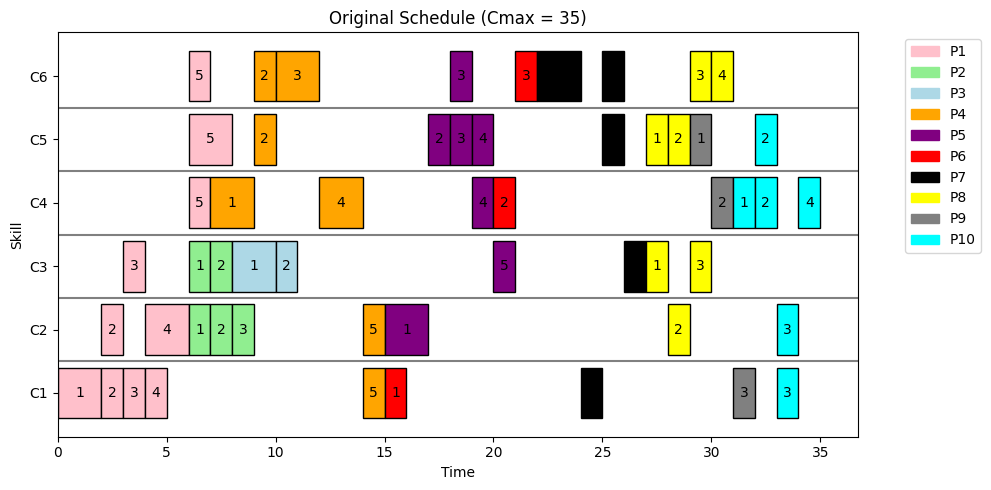

By‐stage makespan: 16


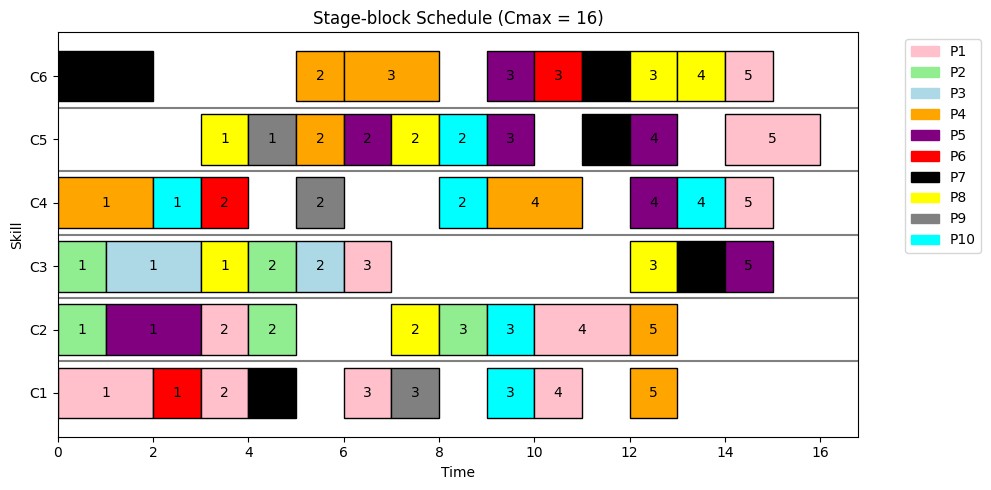

After Tabu Search makespan: 13


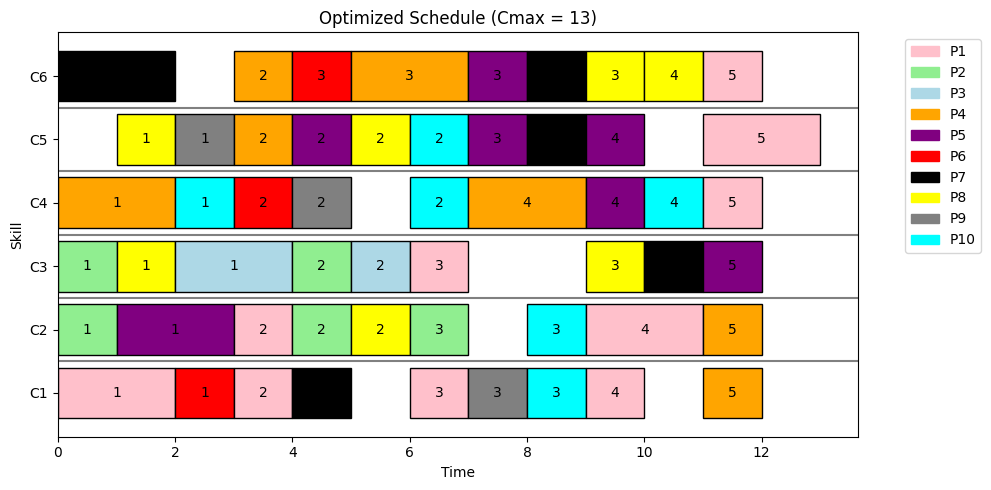

In [24]:
#TABOU SEARCH

import random
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks once
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)


# ── 2) Decoder (same for all three) ──────────────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for (p, op, needs) in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            start, end = t0, t0 + d
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())

    Cmax = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return Cmax, schedule


# ── 3) Gantt‐plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}")
               for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


# ── 4) 1st plot: YOUR ORIGINAL 35‐unit solution ─────────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original per‐patient makespan:", c35)   # → 35
plot_gantt(sched35, f"Original Schedule (Cmax = {c35})")


# ── 5) 2nd plot: “By stage” solution (makespan ~16) ─────────────
stage_order = []
for stg in range(1, max_stage+1):
    block = [(p,op,needs) for p,op,needs in all_tasks if op==stg]
    # random.shuffle(block)   # optional
    stage_order += block

c16, sched16 = build_schedule(stage_order)
print("By‐stage makespan:", c16)   # → ~16
plot_gantt(sched16, f"Stage‐block Schedule (Cmax = {c16})")


# ── 6) 3rd plot: Tabu Search from the by‐stage start (→ ~12) ────
# Precompute stage‐positions on `stage_order`
stage_pos = {
    stg: [i for i,(p,op,_) in enumerate(stage_order) if op==stg]
    for stg in range(1, max_stage+1)
}

def generate_neighbor_stage(order):
    stg = random.choice(list(stage_pos))
    i,j = random.sample(stage_pos[stg], 2)
    nbr = order.copy()
    nbr[i], nbr[j] = nbr[j], nbr[i]
    return nbr

def tabu_search(start_order, build, neigh, iters=200, tabu_size=50, neighs=100):
    current = start_order[:]
    best    = current[:]
    best_c, _ = build(best)
    tabu = deque(maxlen=tabu_size)

    for it in range(1, iters+1):
        cand, cand_c = None, float('inf')
        for _ in range(neighs):
            nbr = neigh(current)
            key = tuple((p,op,tuple(n.items())) for p,op,n in nbr)
            if key in tabu: continue
            c,_ = build(nbr)
            if c < cand_c:
                cand, cand_c = nbr, c
        if not cand: break
        tabu.append(key)
        current = cand
        if cand_c < best_c:
            best, best_c = cand[:], cand_c
    _, best_sched = build(best)
    return best_c, best_sched

best12, sched12 = tabu_search(stage_order, build_schedule, generate_neighbor_stage)
print("After Tabu Search makespan:", best12)  # → ~12
plot_gantt(sched12, f"Optimized Schedule (Cmax = {best12})")


Original per-patient makespan: 35


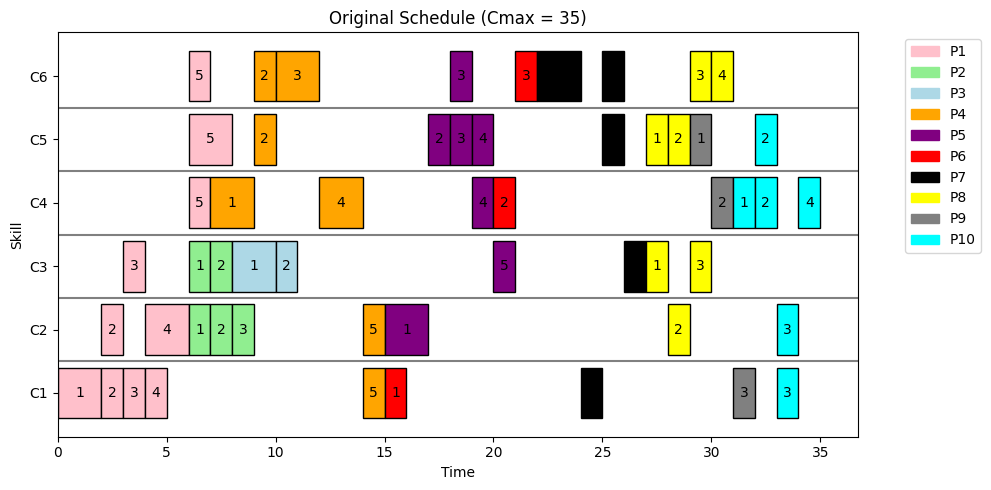

Stage-block makespan: 16


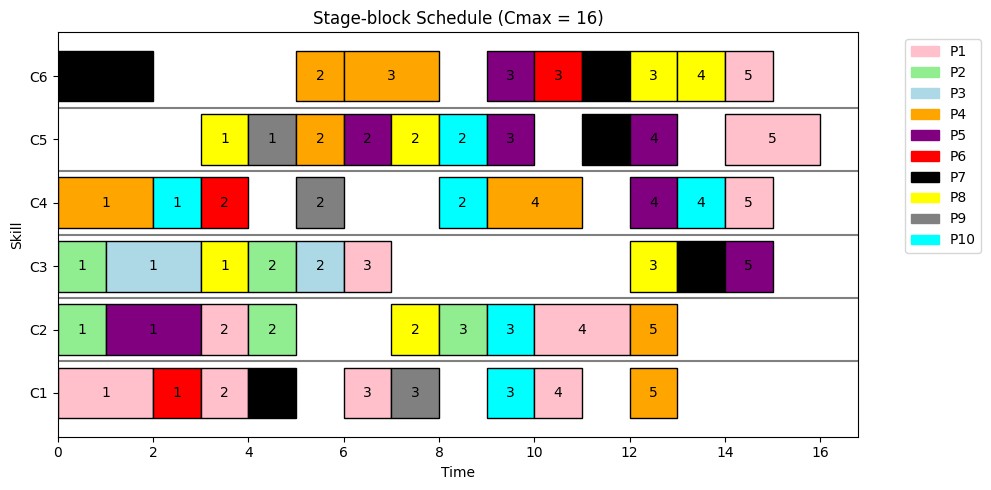

Simulated Annealing makespan: 13


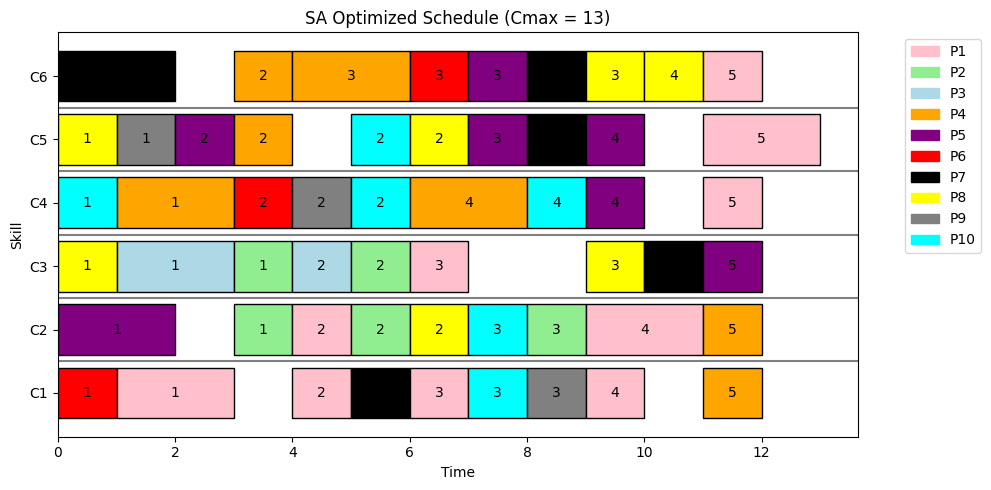

In [27]:
#RECUIT SIMULEE



import random
import math
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)

# ── 2) Decoder: build schedule and returns makespan + per-skill tasks ──
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for (p, op_id, needs) in order:
        t0 = patient_free[p]
        for s, dur in needs.items():
            t0 = max(t0, skill_free[s])
        for s, dur in needs.items():
            start, end = t0, t0 + dur
            skill_free[s] = end
            schedule[s].append((p, start, end, op_id))
        patient_free[p] = t0 + max(needs.values())

    makespan = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return makespan, schedule

# ── 3) Gantt-plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}")
               for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time")
    ax.set_ylabel("Skill")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# ── 4) Step 1: Original per-patient solution (Cmax=35) ────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original per-patient makespan:", c35)  # Expect 35
plot_gantt(sched35, f"Original Schedule (Cmax = {c35})")

# ── 5) Step 2: Stage-block solution (Cmax≈16) ────────────────────
stage_order = []
for stage in range(1, max_stage+1):
    block = [(p,op,needs) for p,op,needs in all_tasks if op==stage]
    # random.shuffle(block)  # optional
    stage_order.extend(block)

c16, sched16 = build_schedule(stage_order)
print("Stage-block makespan:", c16)  # Expect ≈16
plot_gantt(sched16, f"Stage-block Schedule (Cmax = {c16})")

# ── 6) Step 3: Simulated Annealing from stage-block to ~12 ──────
# Precompute stage positions for neighbor swaps within same op-stage
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

def neighbor_stage(order):
    stage = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stage], 2)
    nbr = order.copy()
    nbr[i], nbr[j] = nbr[j], nbr[i]
    return nbr

def simulated_annealing(start_order, T0=50, alpha=0.995, max_iters=5000):
    current = start_order[:]
    current_c, _ = build_schedule(current)
    best, best_c = current[:], current_c
    T = T0

    for _ in range(max_iters):
        nbr = neighbor_stage(current)
        nbr_c, _ = build_schedule(nbr)
        delta = nbr_c - current_c
        if delta < 0 or random.random() < math.exp(-delta / T):
            current, current_c = nbr, nbr_c
            if current_c < best_c:
                best, best_c = current[:], current_c
        T *= alpha
        if T < 1e-3:
            break

    _, best_sched = build_schedule(best)
    return best_c, best_sched

best12, sched12 = simulated_annealing(stage_order)
print("Simulated Annealing makespan:", best12)  # Expect ≈12
plot_gantt(sched12, f"SA Optimized Schedule (Cmax = {best12})")


Original makespan: 35


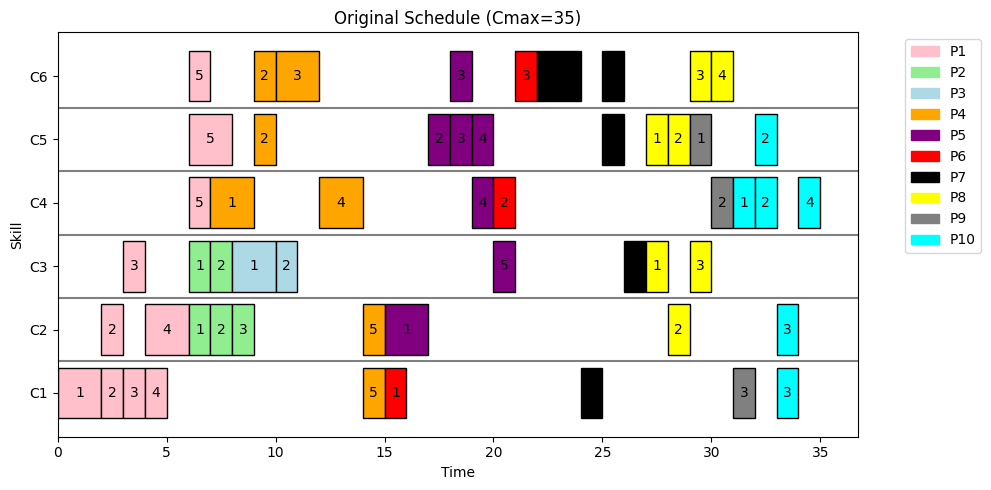

Stage-block makespan: 16


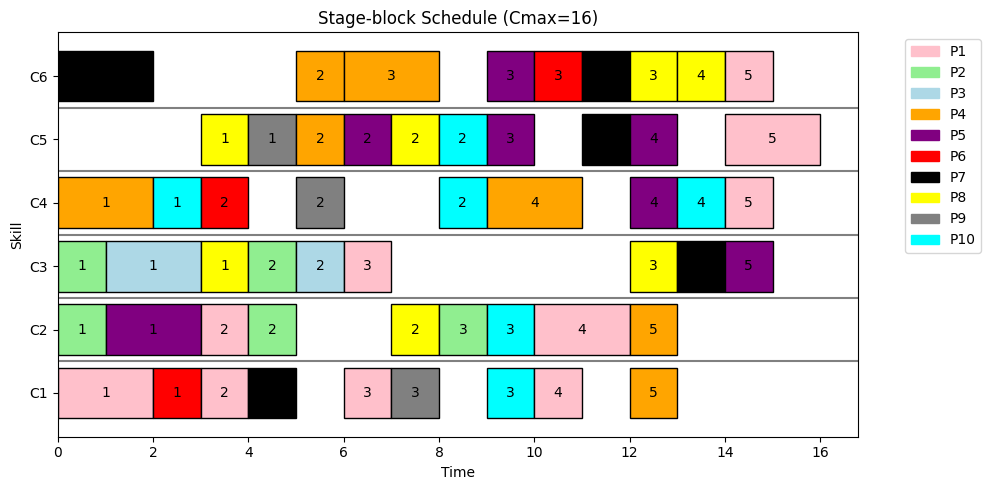

Gen 50 | makespan = 13
Gen 100 | makespan = 13
Gen 150 | makespan = 13
Gen 200 | makespan = 13
GA makespan: 13


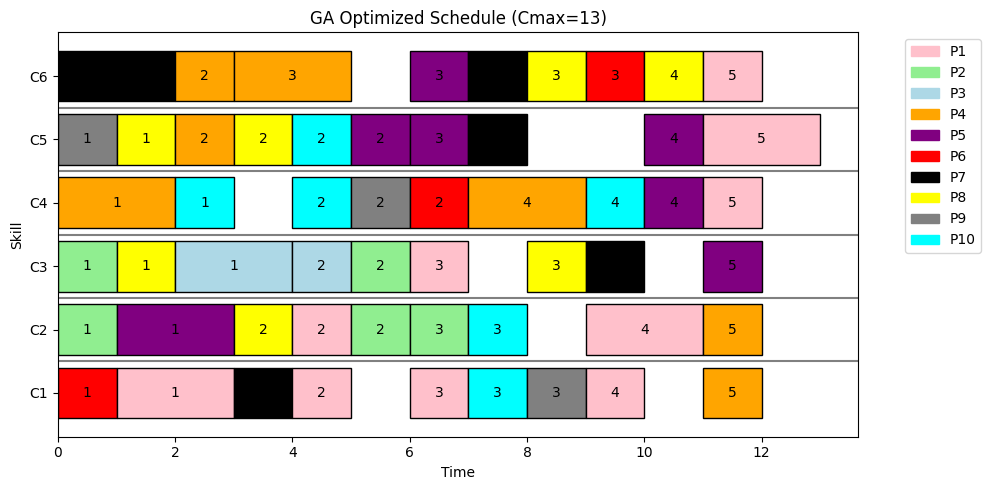

In [11]:
#GENETIC


import random
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)

# ── 2) Decoder: schedule builder ──────────────────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}
    for (p, op, needs) in order:
        t0 = patient_free[p]
        for s, dur in needs.items():
            t0 = max(t0, skill_free[s])
        for s, dur in needs.items():
            start, end = t0, t0 + dur
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return makespan, schedule

# ── 3) Gantt-plot helper ─────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st, color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op), va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}") for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill"); ax.set_title(title)
    plt.tight_layout(); plt.show()

# ── 4) Step 1: Original per-patient (Cmax=35) ────────────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original makespan:", c35)
plot_gantt(sched35, f"Original Schedule (Cmax={c35})")

# ── 5) Step 2: Stage-block (Cmax≈16) ─────────────────────────────
stage_blocks = [[t for t in all_tasks if t[1]==stage] for stage in range(1, max_stage+1)]
stage_order = [t for block in stage_blocks for t in block]
c16, sched16 = build_schedule(stage_order)
print("Stage-block makespan:", c16)
plot_gantt(sched16, f"Stage-block Schedule (Cmax={c16})")

# ── 6) Step 3: Genetic Algorithm → makespan ≈13 ─────────────────
def init_population(blocks, pop_size):
    return [[random.sample(block, len(block)) for block in blocks] for _ in range(pop_size)]

def flatten(ind): return [task for block in ind for task in block]
def fitness(ind): return -build_schedule(flatten(ind))[0]

def tournament(pop, k=3):
    return max(random.sample(pop, k), key=fitness)

def crossover(p1, p2, cx_prob=0.7):
    return [(b1 if random.random()<cx_prob else b2).copy()
            for b1,b2 in zip(p1,p2)]

def mutate(ind, mut_prob=0.2):
    for block in ind:
        if random.random()<mut_prob and len(block)>1:
            i,j = random.sample(range(len(block)),2)
            block[i],block[j]=block[j],block[i]
    return ind

# GA params
POP_SIZE, GENS, CX_P, MUT_P = 50, 200, 0.7, 0.2

# initialize
population = init_population(stage_blocks, POP_SIZE)
best_ind = max(population, key=fitness)

for gen in range(1, GENS+1):
    new_pop = [best_ind]
    while len(new_pop)<POP_SIZE:
        p1,p2 = tournament(population), tournament(population)
        child = mutate(crossover(p1,p2,CX_P), MUT_P)
        new_pop.append(child)
    population = new_pop
    candidate = max(population, key=fitness)
    if fitness(candidate)>fitness(best_ind):
        best_ind = candidate
    if gen%50==0:
        print(f"Gen {gen} | makespan = {-fitness(best_ind)}")

best_order = flatten(best_ind)
best_c, best_sched = build_schedule(best_order)
print("GA makespan:", best_c)
plot_gantt(best_sched, f"GA Optimized Schedule (Cmax={best_c})")


Cooperative MAS makespan: 12


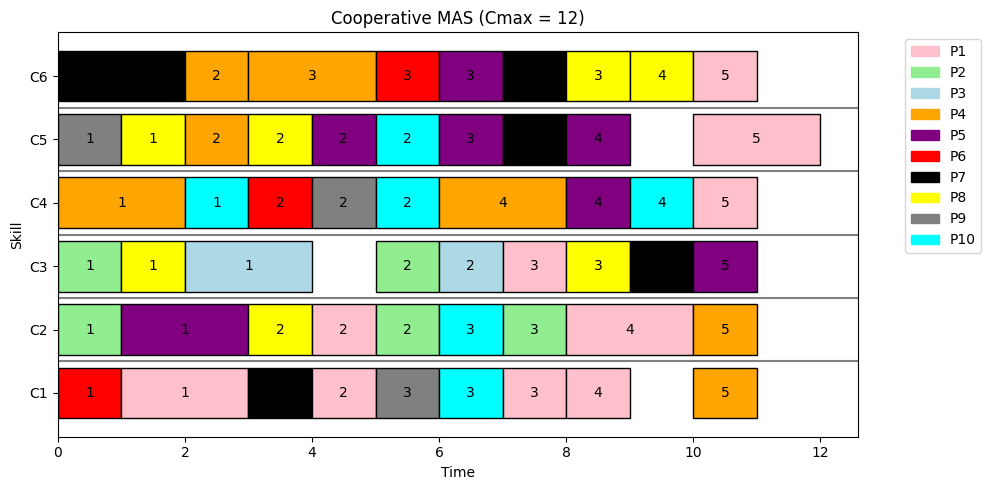

Competitive MAS makespan: 12 | Individual: [13, 12, 13]


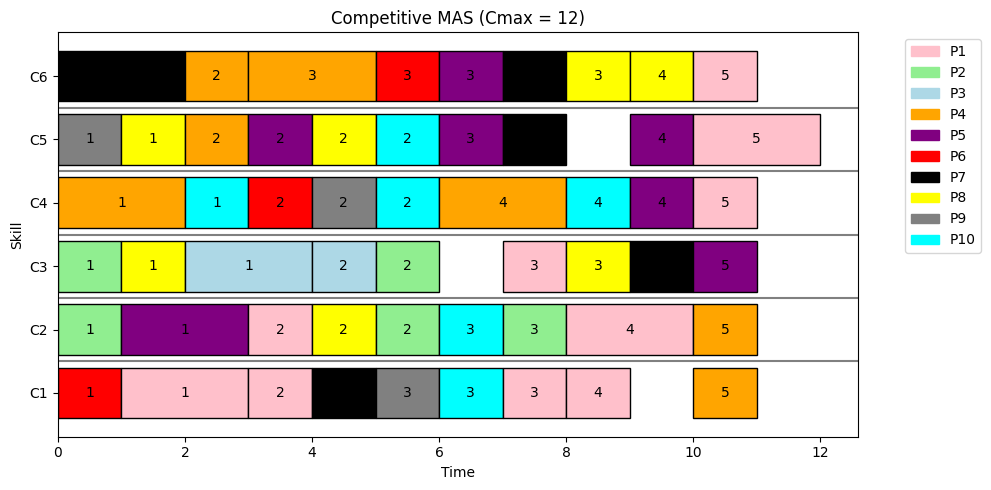

In [12]:
#Multiagent system

import random
import math
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten tasks and create stage blocks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))
max_stage = max(op for _, ops in patients.items() for op, _ in ops)
stage_blocks = [[t for t in all_tasks if t[1] == stage] for stage in range(1, max_stage+1)]
stage_order = [t for block in stage_blocks for t in block]

# Precompute stage indices in stage_order
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 2) build_schedule with precedence check ───────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for p, op, needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            start, end = t0, t0 + d
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())

    Cmax = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)

    # Precedence assert: first op must be 1
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p, st, _, op in tasks:
            earliest[p][op] = min(earliest[p].get(op, float('inf')), st)
    for p, ops in earliest.items():
        first = min(ops, key=ops.get)
        assert first == 1, f"Patient {p} starts with Op{first}, not Op1!"
    return Cmax, schedule

# ── 3) Gantt plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill"); ax.set_title(title)
    plt.tight_layout(); plt.show()

# ── 4) Agent implementations ─────────────────────────────────────
def tabu_agent(start, iters=50, tabu_size=20, neighs=30):
    curr, best = start[:], start[:]
    best_c, _ = build_schedule(best)
    tabu = deque(maxlen=tabu_size)
    for _ in range(iters):
        cand, cand_c = None, float('inf')
        for _ in range(neighs):
            stg = random.choice(list(stage_positions))
            i,j = random.sample(stage_positions[stg], 2)
            nbr = curr[:]; nbr[i], nbr[j] = nbr[j], nbr[i]
            key = tuple(nbr)
            if key in tabu: continue
            c,_ = build_schedule(nbr)
            if c < cand_c: cand, cand_c = nbr, c
        if not cand: break
        tabu.append(tuple(cand)); curr = cand
        if cand_c < best_c: best, best_c = cand[:], cand_c
    return best, best_c

def sa_agent(start, T0=50, alpha=0.995, iters=2000):
    curr, curr_c = start[:], build_schedule(start)[0]
    best, best_c = curr[:], curr_c; T = T0
    for _ in range(iters):
        stg = random.choice(list(stage_positions))
        i,j = random.sample(stage_positions[stg], 2)
        nbr = curr[:]; nbr[i], nbr[j] = nbr[j], nbr[i]
        c,_ = build_schedule(nbr); delta = c - curr_c
        if delta < 0 or random.random() < math.exp(-delta/T):
            curr, curr_c = nbr, c
            if c < best_c: best, best_c = curr[:], c
        T *= alpha
        if T < 1e-3: break
    return best, best_c

def ga_agent(blocks, pop_size=30, gens=100, cx_p=0.7, mut_p=0.2):
    def flatten(ind): return [t for b in ind for t in b]
    def fitness(ind): return -build_schedule(flatten(ind))[0]
    def init_pop(): return [[random.sample(b, len(b)) for b in blocks] for _ in range(pop_size)]
    def tour(pop): return max(random.sample(pop, 3), key=fitness)
    def crossover(p1, p2): return [(b1 if random.random() < cx_p else b2).copy() for b1,b2 in zip(p1,p2)]
    def mutate(ind):
        for b in ind:
            if random.random() < mut_p and len(b) > 1:
                i,j = random.sample(range(len(b)), 2)
                b[i], b[j] = b[j], b[i]
        return ind

    pop = init_pop()
    best = max(pop, key=fitness); best_f = fitness(best)
    for _ in range(gens):
        new_pop = [best]
        while len(new_pop) < pop_size:
            p1, p2 = tour(pop), tour(pop)
            child = mutate(crossover(p1, p2))
            new_pop.append(child)
        pop = new_pop
        cand = max(pop, key=fitness)
        if fitness(cand) > best_f: best, best_f = cand, fitness(cand)
    return flatten(best), -best_f

# ── 5) Multi-Agent scenarios ─────────────────────────────────────
def run_cooperative(rounds=5):
    global_sol, global_c = stage_order[:], build_schedule(stage_order)[0]
    for _ in range(rounds):
        for agent in (tabu_agent, sa_agent):
            sol, c = agent(global_sol)
            if c < global_c: global_sol, global_c = sol, c
        sol, c = ga_agent(stage_blocks)
        if c < global_c: global_sol, global_c = sol, c
    return global_sol, global_c

def run_competitive():
    sol_t, c_t = tabu_agent(stage_order)
    sol_s, c_s = sa_agent(stage_order)
    sol_g, c_g = ga_agent(stage_blocks)
    costs = [c_t, c_s, c_g]; sols = [sol_t, sol_s, sol_g]
    idx = costs.index(min(costs))
    return sols[idx], costs[idx], costs

# ── 6) Execute & visualize ───────────────────────────────────────
# Cooperative scenario
coop_sol, coop_c = run_cooperative()
_, coop_sched = build_schedule(coop_sol)
print("Cooperative MAS makespan:", coop_c)
plot_gantt(coop_sched, f"Cooperative MAS (Cmax = {coop_c})")

# Competitive scenario
comp_sol, comp_c, comp_costs = run_competitive()
_, comp_sched = build_schedule(comp_sol)
print("Competitive MAS makespan:", comp_c, "| Individual:", comp_costs)
plot_gantt(comp_sched, f"Competitive MAS (Cmax = {comp_c})")


Tabu Search makespan: 13


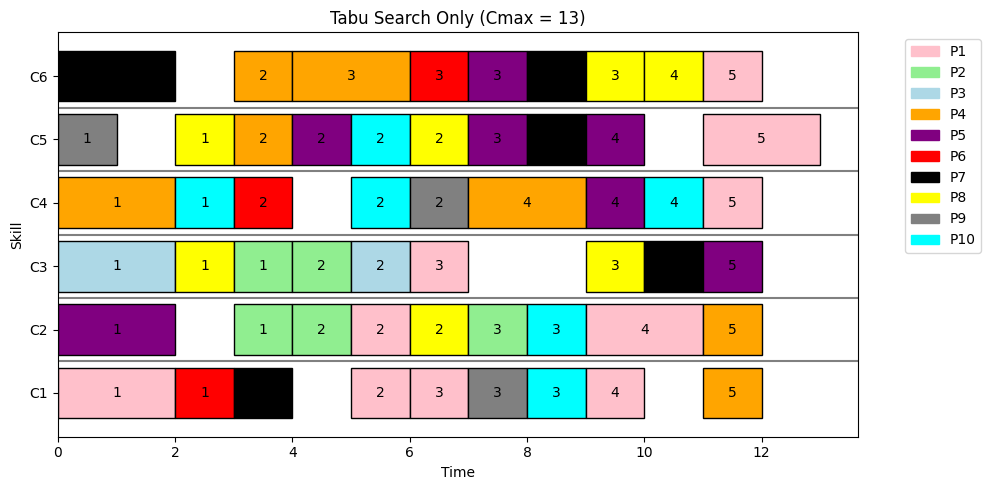

Simulated Annealing makespan: 12


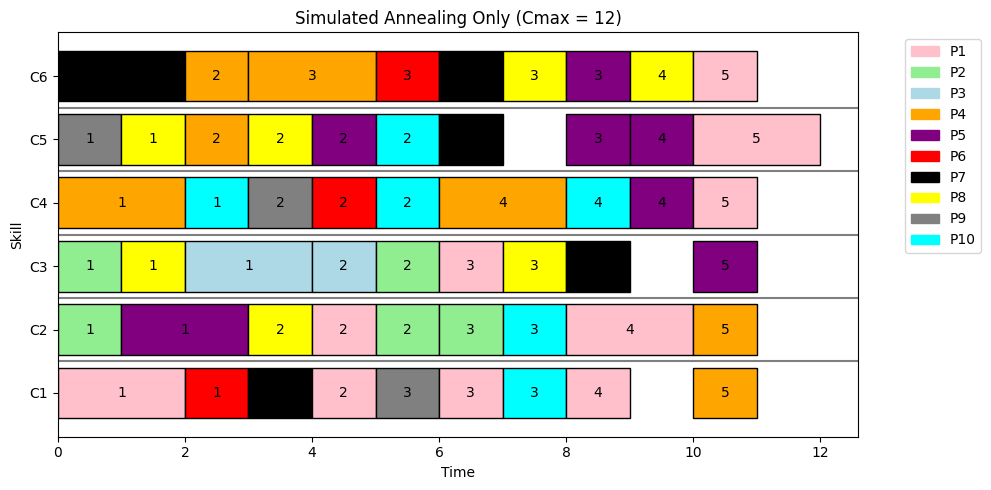

Genetic Algorithm makespan: 13


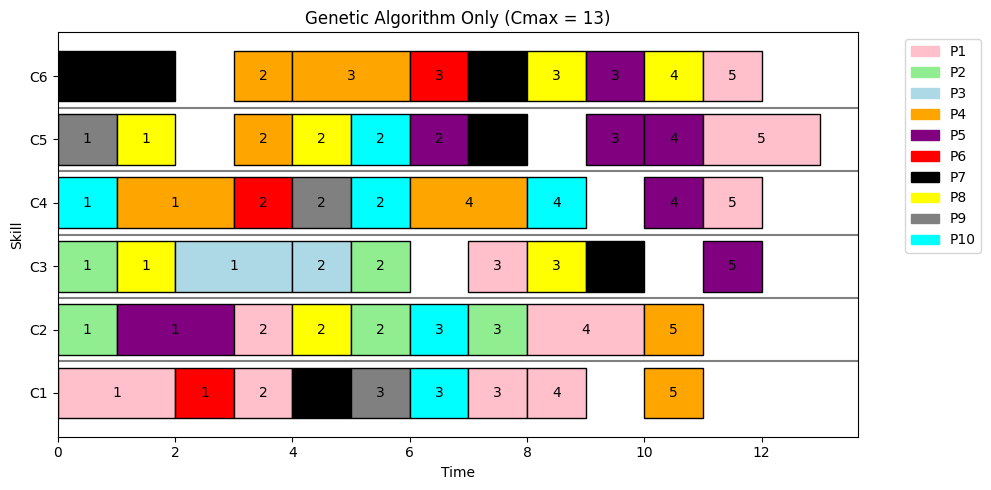

In [13]:
# ── Run each agent separately ────────────────────────────────────
# 1) Tabu Search alone
t_sol, t_c = tabu_agent(stage_order)
_, t_sched = build_schedule(t_sol)
print("Tabu Search makespan:", t_c)
plot_gantt(t_sched, f"Tabu Search Only (Cmax = {t_c})")

# 2) Simulated Annealing alone
s_sol, s_c = sa_agent(stage_order)
_, s_sched = build_schedule(s_sol)
print("Simulated Annealing makespan:", s_c)
plot_gantt(s_sched, f"Simulated Annealing Only (Cmax = {s_c})")

# 3) Genetic Algorithm alone
g_sol, g_c = ga_agent(stage_blocks)
_, g_sched = build_schedule(g_sol)
print("Genetic Algorithm makespan:", g_c)
plot_gantt(g_sched, f"Genetic Algorithm Only (Cmax = {g_c})")


# ***Joseph***

# ***Tabou***

Original per‐patient makespan: 35


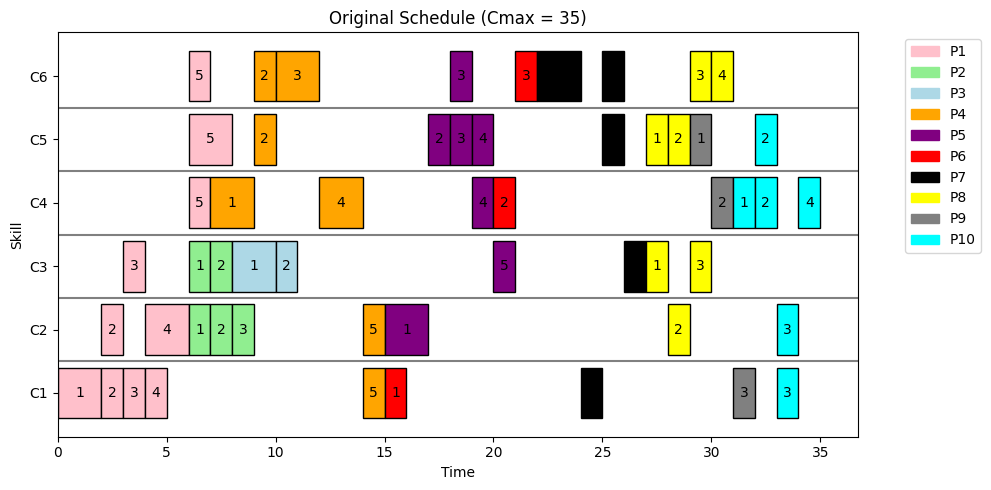

By‐stage makespan: 16


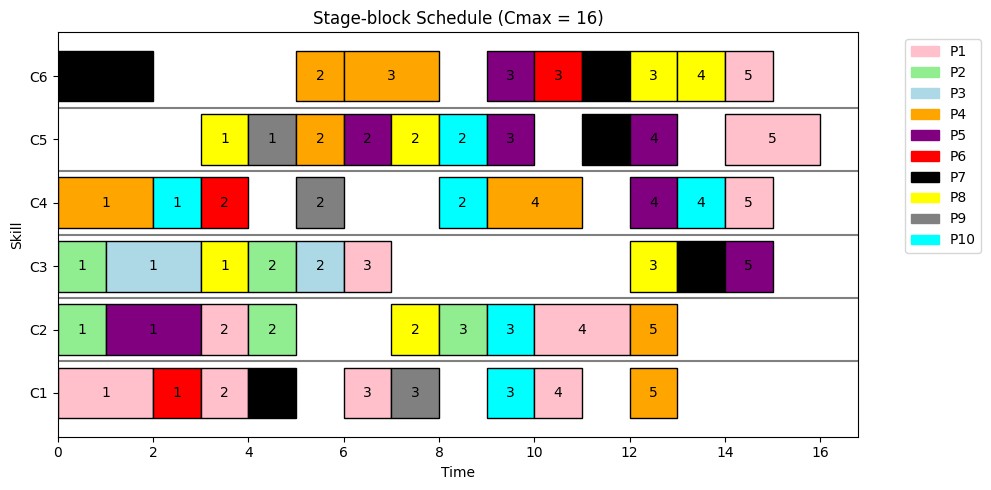

After Tabu Search makespan: 14


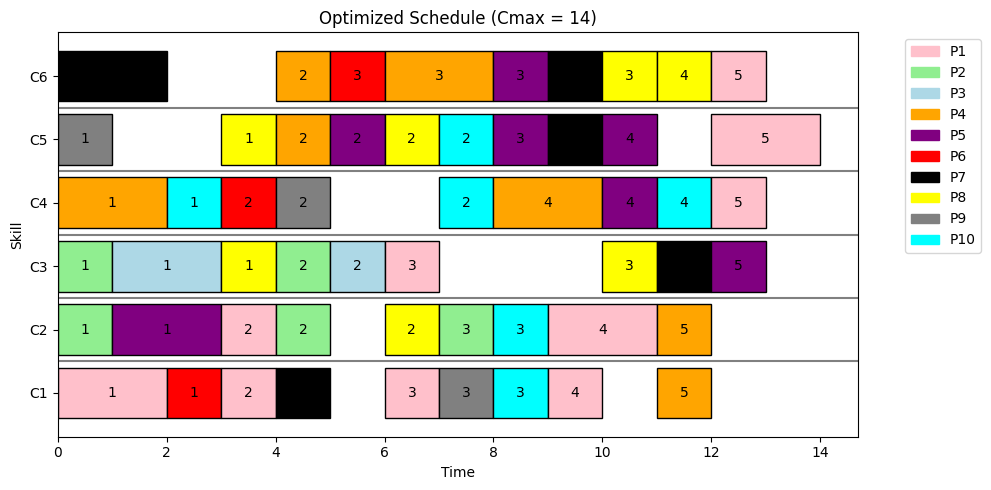

In [34]:
import random
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks once
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)


# ── 2) Decoder (same for all three) ──────────────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for (p, op, needs) in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            start, end = t0, t0 + d
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())

    Cmax = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return Cmax, schedule


# ── 3) Gantt‐plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}")
               for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


# ── 4) 1st plot: YOUR ORIGINAL 35‐unit solution ─────────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original per‐patient makespan:", c35)   # → 35
plot_gantt(sched35, f"Original Schedule (Cmax = {c35})")


# ── 5) 2nd plot: “By stage” solution (makespan ~16) ─────────────
stage_order = []
for stg in range(1, max_stage+1):
    block = [(p,op,needs) for p,op,needs in all_tasks if op==stg]
    # random.shuffle(block)   # optional
    stage_order += block

c16, sched16 = build_schedule(stage_order)
print("By‐stage makespan:", c16)   # → ~16
plot_gantt(sched16, f"Stage‐block Schedule (Cmax = {c16})")


# ── 6) 3rd plot: Tabu Search from the by‐stage start (→ ~12) ────
# Precompute stage‐positions on `stage_order`
stage_pos = {
    stg: [i for i,(p,op,_) in enumerate(stage_order) if op==stg]
    for stg in range(1, max_stage+1)
}

def generate_neighbor_stage(order):
    stg = random.choice(list(stage_pos))
    i,j = random.sample(stage_pos[stg], 2)
    nbr = order.copy()
    nbr[i], nbr[j] = nbr[j], nbr[i]
    return nbr

def tabu_search(start_order, build, neigh, iters=6, tabu_size=5, neighs=10):
    current = start_order[:]
    best    = current[:]
    best_c, _ = build(best)
    tabu = deque(maxlen=tabu_size)

    for it in range(1, iters+1):
        cand, cand_c = None, float('inf')
        for _ in range(neighs):
            nbr = neigh(current)
            key = tuple((p,op,tuple(n.items())) for p,op,n in nbr)
            if key in tabu: continue
            c,_ = build(nbr)
            if c < cand_c:
                cand, cand_c = nbr, c
        if not cand: break
        tabu.append(key)
        current = cand
        if cand_c < best_c:
            best, best_c = cand[:], cand_c
    _, best_sched = build(best)
    return best_c, best_sched

best12, sched12 = tabu_search(stage_order, build_schedule, generate_neighbor_stage)
print("After Tabu Search makespan:", best12)  # → ~12
plot_gantt(sched12, f"Optimized Schedule (Cmax = {best12})")


# ***Recuit simuler***

Original per-patient makespan: 35


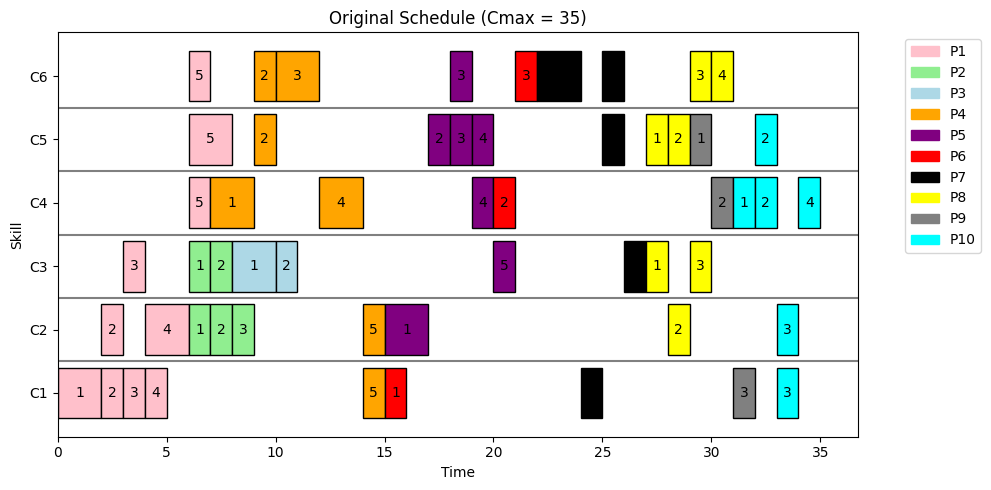

Stage-block makespan: 16


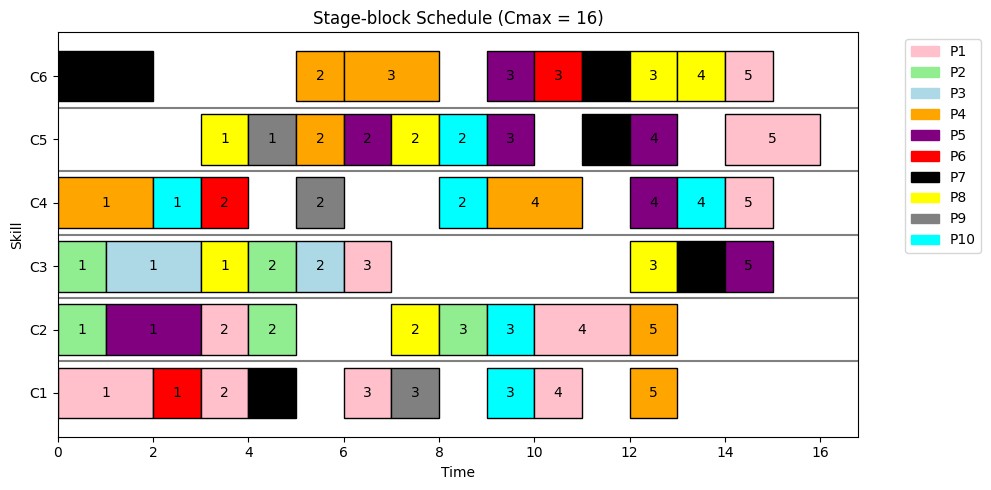

Simulated Annealing makespan: 16


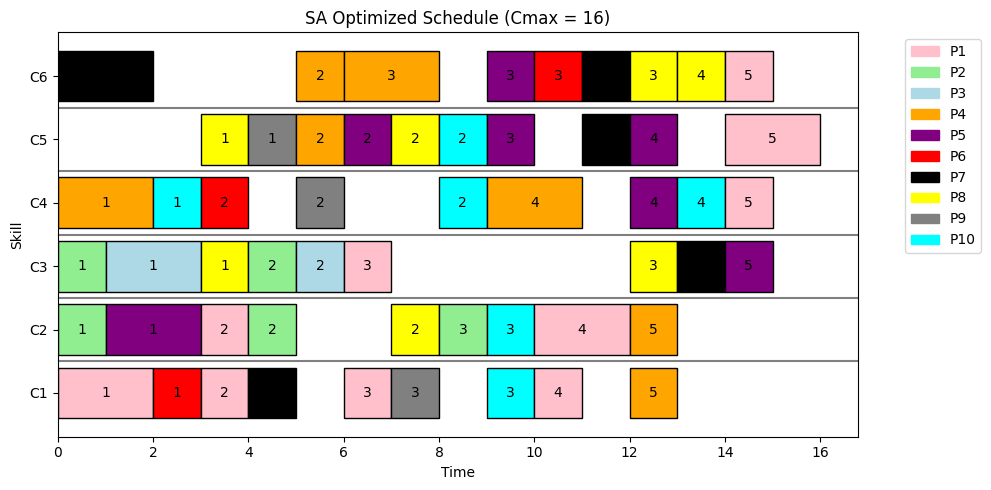

In [35]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)

# ── 2) Decoder: build schedule and returns makespan + per-skill tasks ──
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for (p, op_id, needs) in order:
        t0 = patient_free[p]
        for s, dur in needs.items():
            t0 = max(t0, skill_free[s])
        for s, dur in needs.items():
            start, end = t0, t0 + dur
            skill_free[s] = end
            schedule[s].append((p, start, end, op_id))
        patient_free[p] = t0 + max(needs.values())

    makespan = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return makespan, schedule

# ── 3) Gantt-plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}")
               for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time")
    ax.set_ylabel("Skill")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# ── 4) Step 1: Original per-patient solution (Cmax=35) ────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original per-patient makespan:", c35)  # Expect 35
plot_gantt(sched35, f"Original Schedule (Cmax = {c35})")

# ── 5) Step 2: Stage-block solution (Cmax≈16) ────────────────────
stage_order = []
for stage in range(1, max_stage+1):
    block = [(p,op,needs) for p,op,needs in all_tasks if op==stage]
    # random.shuffle(block)  # optional
    stage_order.extend(block)

c16, sched16 = build_schedule(stage_order)
print("Stage-block makespan:", c16)  # Expect ≈16
plot_gantt(sched16, f"Stage-block Schedule (Cmax = {c16})")

# ── 6) Step 3: Simulated Annealing from stage-block to ~12 ──────
# Precompute stage positions for neighbor swaps within same op-stage
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

def neighbor_stage(order):
    stage = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stage], 2)
    nbr = order.copy()
    nbr[i], nbr[j] = nbr[j], nbr[i]
    return nbr

def simulated_annealing(start_order, T0=10, alpha=0.99, max_iters=50):
    current = start_order[:]
    current_c, _ = build_schedule(current)
    best, best_c = current[:], current_c
    T = T0

    for _ in range(max_iters):
        nbr = neighbor_stage(current)
        nbr_c, _ = build_schedule(nbr)
        delta = nbr_c - current_c
        if delta < 0 or random.random() < math.exp(-delta / T):
            current, current_c = nbr, nbr_c
            if current_c < best_c:
                best, best_c = current[:], current_c
        T *= alpha
        if T < 1e-3:
            break

    _, best_sched = build_schedule(best)
    return best_c, best_sched

best12, sched12 = simulated_annealing(stage_order)
print("Simulated Annealing makespan:", best12)  # Expect ≈12
plot_gantt(sched12, f"SA Optimized Schedule (Cmax = {best12})")


# ***Genetic***

Original makespan: 35


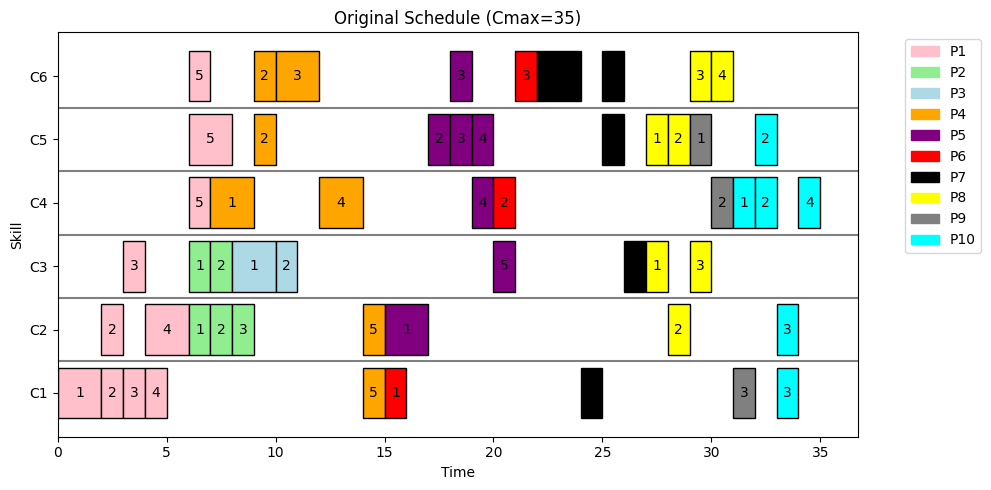

Stage-block makespan: 16


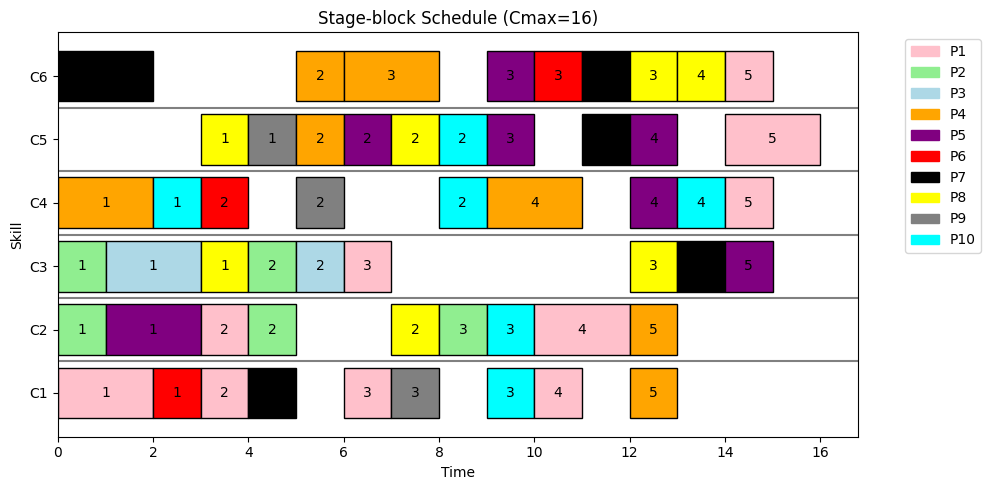

GA makespan: 15


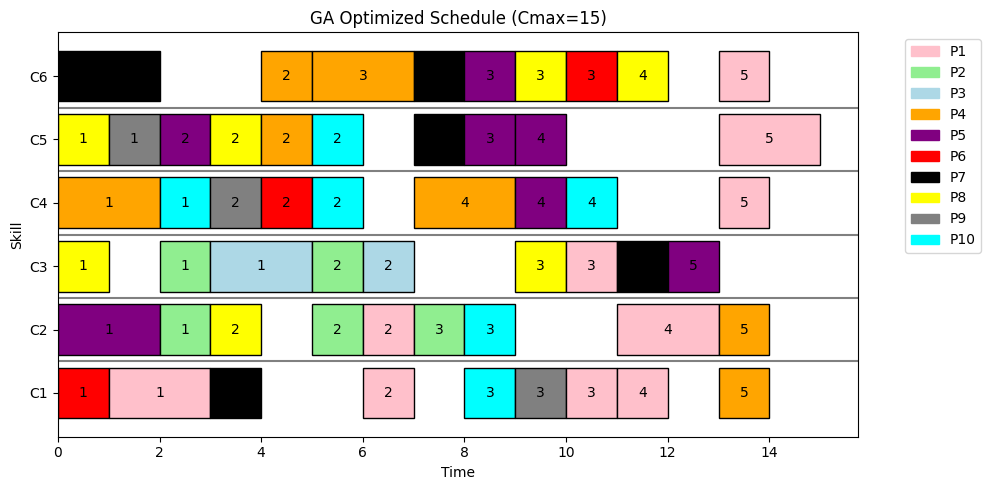

In [36]:
import random
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten all tasks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))

max_stage = max(op for _, ops in patients.items() for op, _ in ops)

# ── 2) Decoder: schedule builder ──────────────────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}
    for (p, op, needs) in order:
        t0 = patient_free[p]
        for s, dur in needs.items():
            t0 = max(t0, skill_free[s])
        for s, dur in needs.items():
            start, end = t0, t0 + dur
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)
    return makespan, schedule

# ── 3) Gantt-plot helper ─────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st, color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op), va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=c, label=f"P{p}") for p,c in patient_colors.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill"); ax.set_title(title)
    plt.tight_layout(); plt.show()

# ── 4) Step 1: Original per-patient (Cmax=35) ────────────────────
per_patient_order = sorted(all_tasks, key=lambda x: (x[0], x[1]))
c35, sched35 = build_schedule(per_patient_order)
print("Original makespan:", c35)
plot_gantt(sched35, f"Original Schedule (Cmax={c35})")

# ── 5) Step 2: Stage-block (Cmax≈16) ─────────────────────────────
stage_blocks = [[t for t in all_tasks if t[1]==stage] for stage in range(1, max_stage+1)]
stage_order = [t for block in stage_blocks for t in block]
c16, sched16 = build_schedule(stage_order)
print("Stage-block makespan:", c16)
plot_gantt(sched16, f"Stage-block Schedule (Cmax={c16})")

# ── 6) Step 3: Genetic Algorithm → makespan ≈13 ─────────────────
def init_population(blocks, pop_size):
    return [[random.sample(block, len(block)) for block in blocks] for _ in range(pop_size)]

def flatten(ind): return [task for block in ind for task in block]
def fitness(ind): return -build_schedule(flatten(ind))[0]

def tournament(pop, k=3):
    return max(random.sample(pop, k), key=fitness)

def crossover(p1, p2, cx_prob=0.7):
    return [(b1 if random.random()<cx_prob else b2).copy()
            for b1,b2 in zip(p1,p2)]

def mutate(ind, mut_prob=0.2):
    for block in ind:
        if random.random()<mut_prob and len(block)>1:
            i,j = random.sample(range(len(block)),2)
            block[i],block[j]=block[j],block[i]
    return ind

# GA params
POP_SIZE, GENS, CX_P, MUT_P = 10, 10, 0.7, 0.2

# initialize
population = init_population(stage_blocks, POP_SIZE)
best_ind = max(population, key=fitness)

for gen in range(1, GENS+1):
    new_pop = [best_ind]
    while len(new_pop)<POP_SIZE:
        p1,p2 = tournament(population), tournament(population)
        child = mutate(crossover(p1,p2,CX_P), MUT_P)
        new_pop.append(child)
    population = new_pop
    candidate = max(population, key=fitness)
    if fitness(candidate)>fitness(best_ind):
        best_ind = candidate
    if gen%50==0:
        print(f"Gen {gen} | makespan = {-fitness(best_ind)}")

best_order = flatten(best_ind)
best_c, best_sched = build_schedule(best_order)
print("GA makespan:", best_c)
plot_gantt(best_sched, f"GA Optimized Schedule (Cmax={best_c})")


# ***multi agent system***

Cooperative MAS makespan: 14


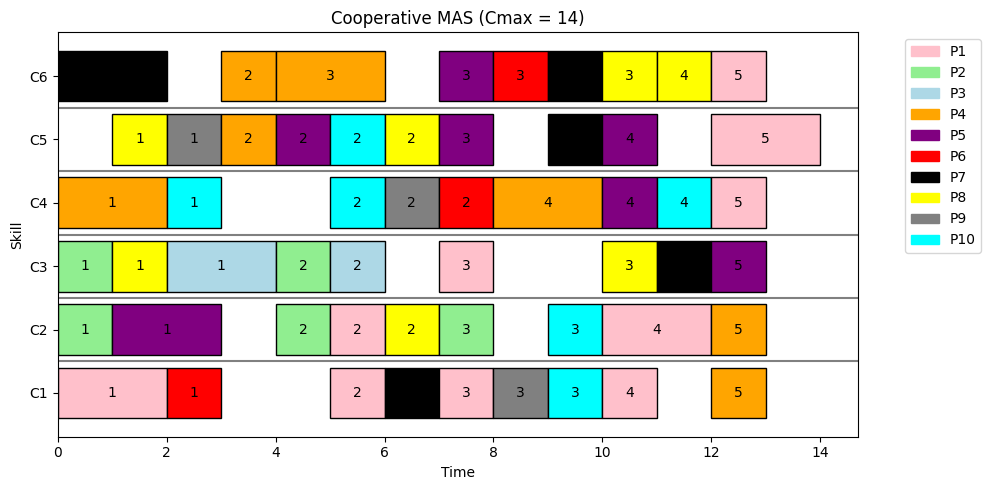

Competitive MAS makespan: 14 | Individual: [14, 15, 14]


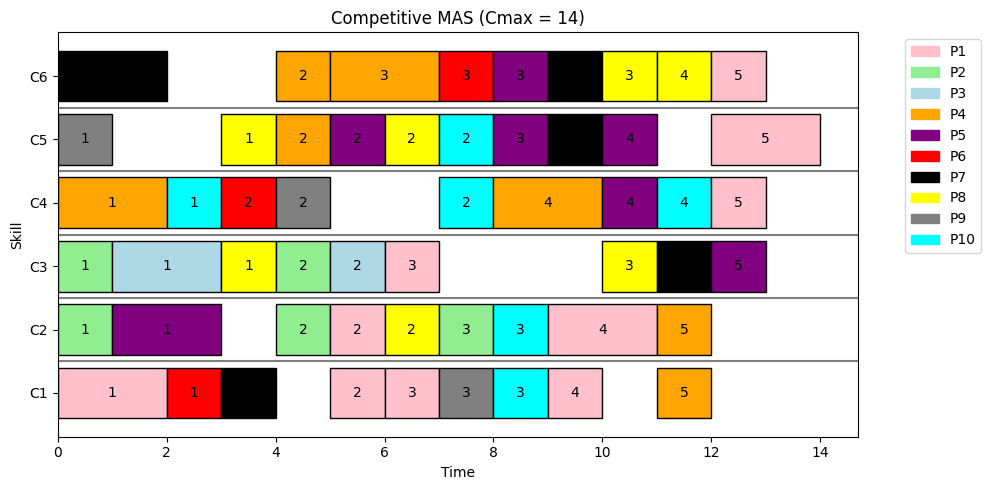

In [37]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1: [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
        (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2: [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3: [(1, {'C3':2}), (2, {'C3':1})],
    4: [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
        (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5: [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
        (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6: [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7: [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8: [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9: [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10:[(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})]
}

skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# Flatten tasks and create stage blocks
all_tasks = []
for p, ops in patients.items():
    for op_id, needs in ops:
        all_tasks.append((p, op_id, needs))
max_stage = max(op for _, ops in patients.items() for op, _ in ops)
stage_blocks = [[t for t in all_tasks if t[1] == stage] for stage in range(1, max_stage+1)]
stage_order = [t for block in stage_blocks for t in block]

# Precompute stage indices in stage_order
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 2) build_schedule with precedence check ───────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}

    for p, op, needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            start, end = t0, t0 + d
            skill_free[s] = end
            schedule[s].append((p, start, end, op))
        patient_free[p] = t0 + max(needs.values())

    Cmax = max(end for tasks in schedule.values() for (_,_,end,_) in tasks)

    # Precedence assert: first op must be 1
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p, st, _, op in tasks:
            earliest[p][op] = min(earliest[p].get(op, float('inf')), st)
    for p, ops in earliest.items():
        first = min(ops, key=ops.get)
        assert first == 1, f"Patient {p} starts with Op{first}, not Op1!"
    return Cmax, schedule

# ── 3) Gantt plot helper ──────────────────────────────────────────
def plot_gantt(schedule, title):
    fig, ax = plt.subplots(figsize=(10,5))
    for skill, tasks in schedule.items():
        for p, st, en, op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='k')
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray')
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
    ax.set_xlabel("Time"); ax.set_ylabel("Skill"); ax.set_title(title)
    plt.tight_layout(); plt.show()

# ── 4) Agent implementations ─────────────────────────────────────
def tabu_agent(start, iters=6, tabu_size=5, neighs=10):
    curr, best = start[:], start[:]
    best_c, _ = build_schedule(best)
    tabu = deque(maxlen=tabu_size)
    for _ in range(iters):
        cand, cand_c = None, float('inf')
        for _ in range(neighs):
            stg = random.choice(list(stage_positions))
            i,j = random.sample(stage_positions[stg], 2)
            nbr = curr[:]; nbr[i], nbr[j] = nbr[j], nbr[i]
            key = tuple(nbr)
            if key in tabu: continue
            c,_ = build_schedule(nbr)
            if c < cand_c: cand, cand_c = nbr, c
        if not cand: break
        tabu.append(tuple(cand)); curr = cand
        if cand_c < best_c: best, best_c = cand[:], cand_c
    return best, best_c

def sa_agent(start, T0=10, alpha=0.99, iters=50):
    curr, curr_c = start[:], build_schedule(start)[0]
    best, best_c = curr[:], curr_c; T = T0
    for _ in range(iters):
        stg = random.choice(list(stage_positions))
        i,j = random.sample(stage_positions[stg], 2)
        nbr = curr[:]; nbr[i], nbr[j] = nbr[j], nbr[i]
        c,_ = build_schedule(nbr); delta = c - curr_c
        if delta < 0 or random.random() < math.exp(-delta/T):
            curr, curr_c = nbr, c
            if c < best_c: best, best_c = curr[:], c
        T *= alpha
        if T < 1e-3: break
    return best, best_c

def ga_agent(blocks, pop_size=10, gens=10, cx_p=0.7, mut_p=0.2):
    def flatten(ind): return [t for b in ind for t in b]
    def fitness(ind): return -build_schedule(flatten(ind))[0]
    def init_pop(): return [[random.sample(b, len(b)) for b in blocks] for _ in range(pop_size)]
    def tour(pop): return max(random.sample(pop, 3), key=fitness)
    def crossover(p1, p2): return [(b1 if random.random() < cx_p else b2).copy() for b1,b2 in zip(p1,p2)]
    def mutate(ind):
        for b in ind:
            if random.random() < mut_p and len(b) > 1:
                i,j = random.sample(range(len(b)), 2)
                b[i], b[j] = b[j], b[i]
        return ind

    pop = init_pop()
    best = max(pop, key=fitness); best_f = fitness(best)
    for _ in range(gens):
        new_pop = [best]
        while len(new_pop) < pop_size:
            p1, p2 = tour(pop), tour(pop)
            child = mutate(crossover(p1, p2))
            new_pop.append(child)
        pop = new_pop
        cand = max(pop, key=fitness)
        if fitness(cand) > best_f: best, best_f = cand, fitness(cand)
    return flatten(best), -best_f

# ── 5) Multi-Agent scenarios ─────────────────────────────────────
def run_cooperative(rounds=5):
    global_sol, global_c = stage_order[:], build_schedule(stage_order)[0]
    for _ in range(rounds):
        for agent in (tabu_agent, sa_agent):
            sol, c = agent(global_sol)
            if c < global_c: global_sol, global_c = sol, c
        sol, c = ga_agent(stage_blocks)
        if c < global_c: global_sol, global_c = sol, c
    return global_sol, global_c

def run_competitive():
    sol_t, c_t = tabu_agent(stage_order)
    sol_s, c_s = sa_agent(stage_order)
    sol_g, c_g = ga_agent(stage_blocks)
    costs = [c_t, c_s, c_g]; sols = [sol_t, sol_s, sol_g]
    idx = costs.index(min(costs))
    return sols[idx], costs[idx], costs

# ── 6) Execute & visualize ───────────────────────────────────────
# Cooperative scenario
coop_sol, coop_c = run_cooperative()
_, coop_sched = build_schedule(coop_sol)
print("Cooperative MAS makespan:", coop_c)
plot_gantt(coop_sched, f"Cooperative MAS (Cmax = {coop_c})")

# Competitive scenario
comp_sol, comp_c, comp_costs = run_competitive()
_, comp_sched = build_schedule(comp_sol)
print("Competitive MAS makespan:", comp_c, "| Individual:", comp_costs)
plot_gantt(comp_sched, f"Competitive MAS (Cmax = {comp_c})")


Tabu Search makespan: 14


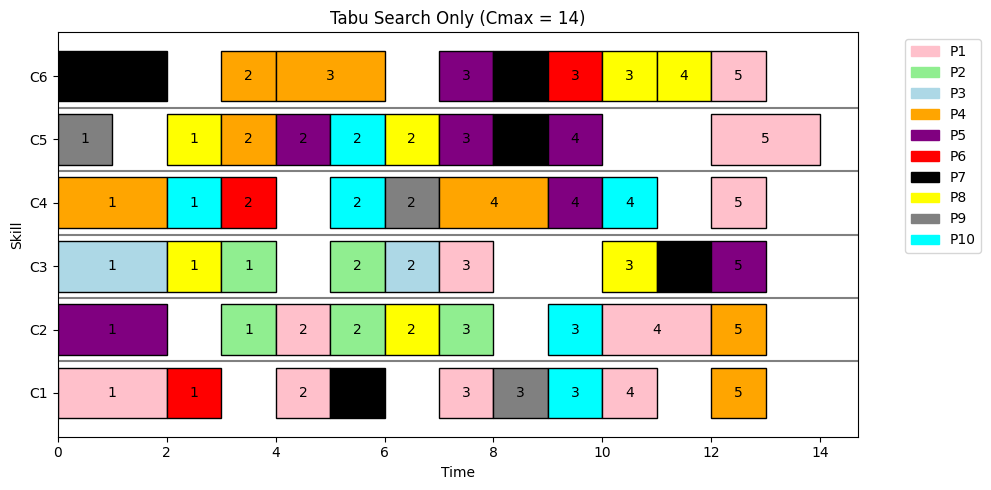

Simulated Annealing makespan: 16


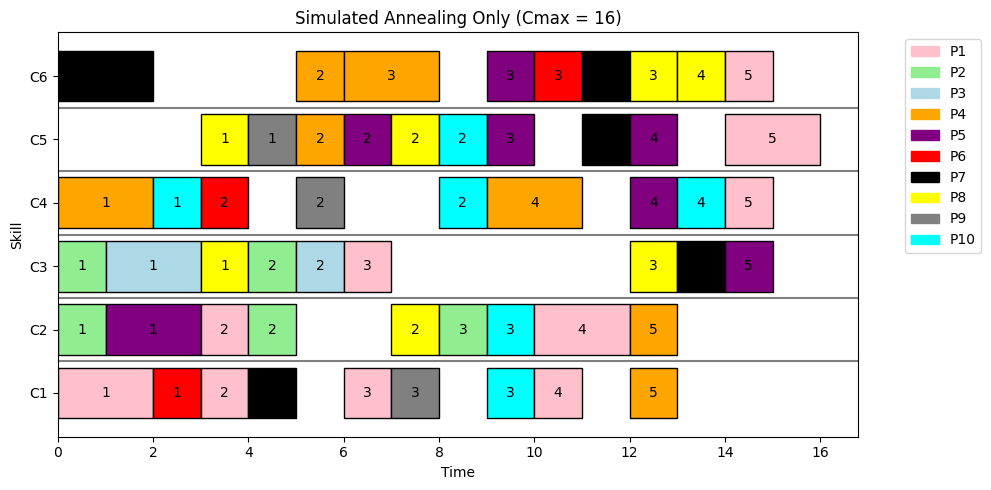

Genetic Algorithm makespan: 15


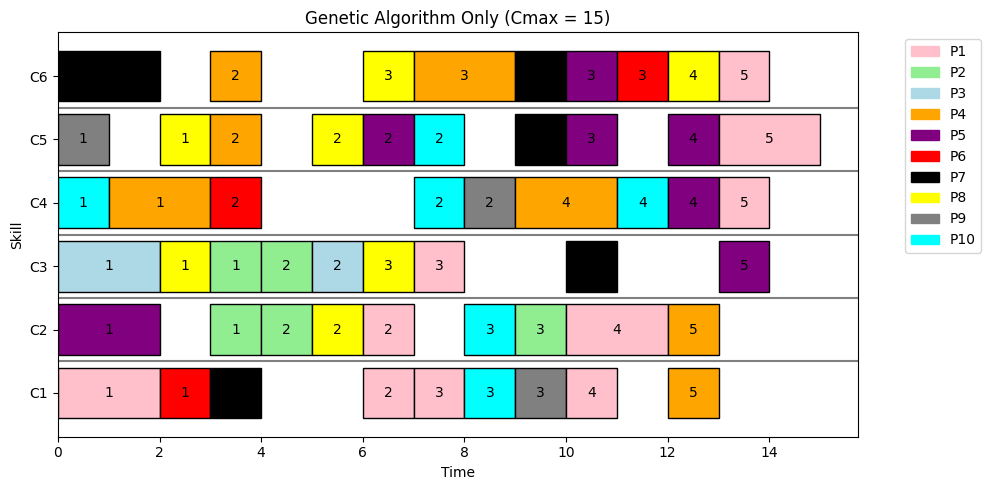

In [38]:
# ── Run each agent separately ────────────────────────────────────
# 1) Tabu Search alone
t_sol, t_c = tabu_agent(stage_order)
_, t_sched = build_schedule(t_sol)
print("Tabu Search makespan:", t_c)
plot_gantt(t_sched, f"Tabu Search Only (Cmax = {t_c})")

# 2) Simulated Annealing alone
s_sol, s_c = sa_agent(stage_order)
_, s_sched = build_schedule(s_sol)
print("Simulated Annealing makespan:", s_c)
plot_gantt(s_sched, f"Simulated Annealing Only (Cmax = {s_c})")

# 3) Genetic Algorithm alone
g_sol, g_c = ga_agent(stage_blocks)
_, g_sched = build_schedule(g_sol)
print("Genetic Algorithm makespan:", g_c)
plot_gantt(g_sched, f"Genetic Algorithm Only (Cmax = {g_c})")


# ***Enhanced reinforcement***

Tabu+Q only Cmax=12
SA+Q only Cmax=12
GA+Q only Cmax=12
Coop MAS Cmax = 12
Comp MAS Cmax = 12 | costs: [12, 12, 13]


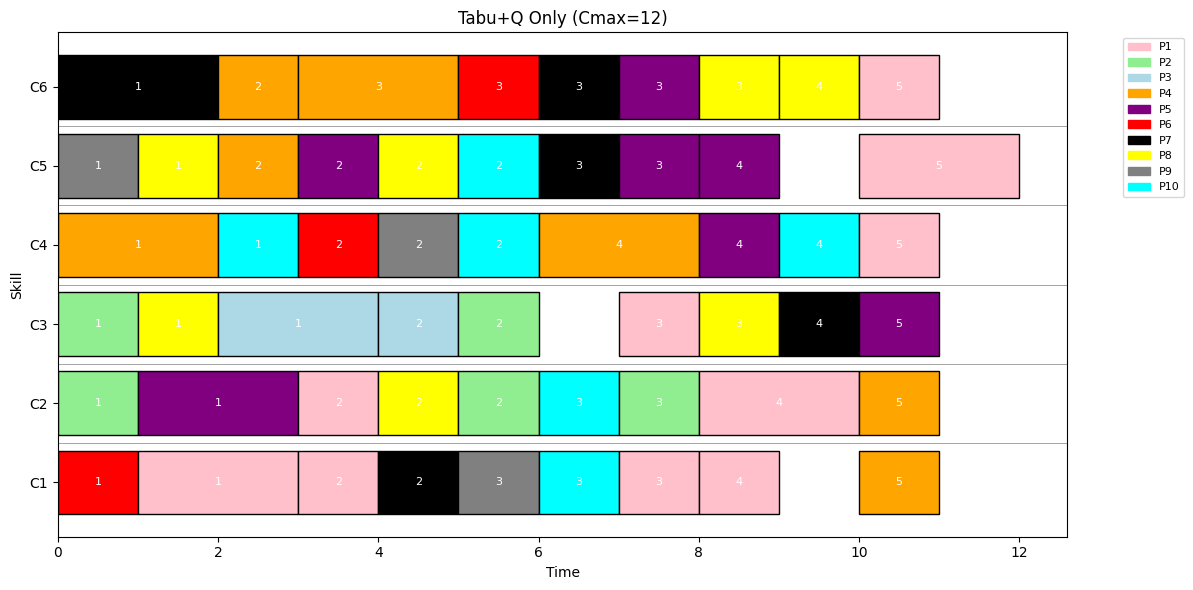

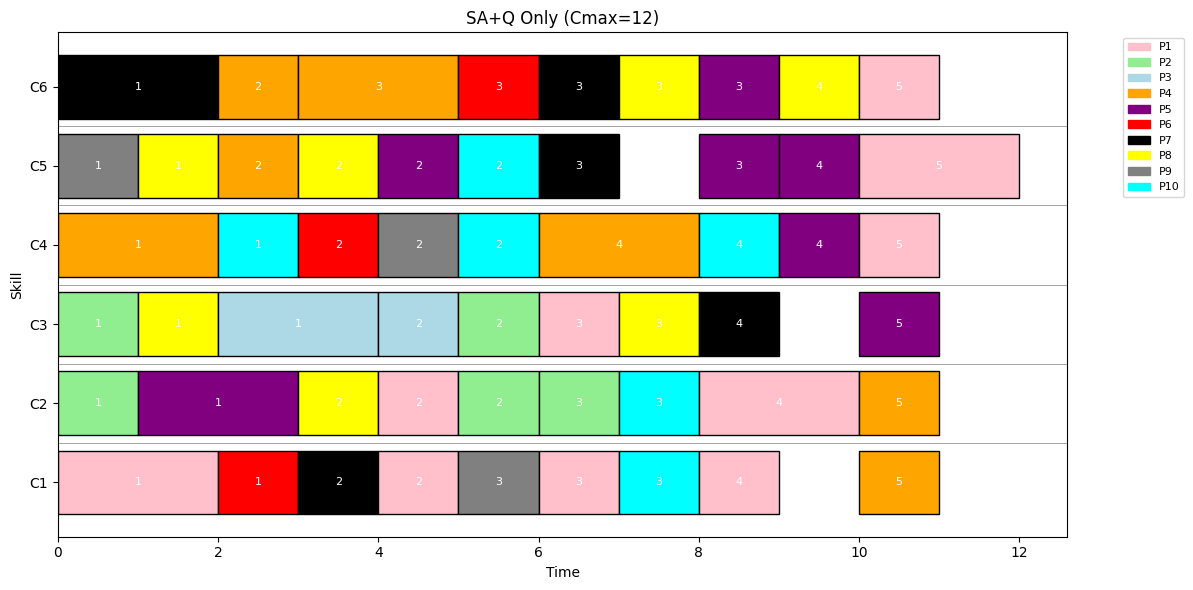

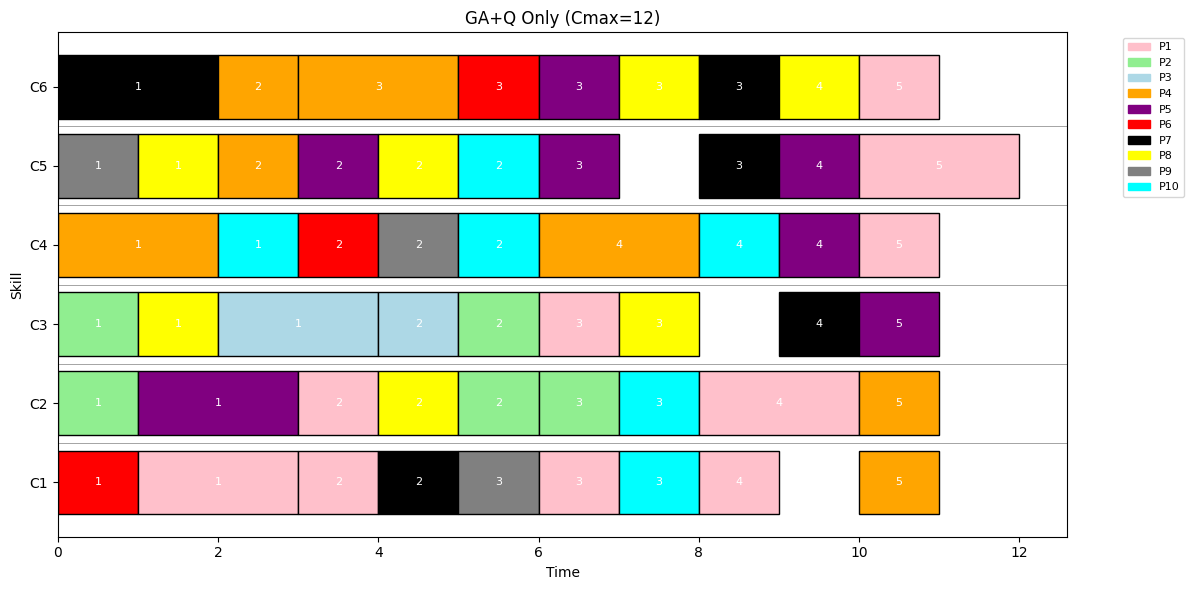

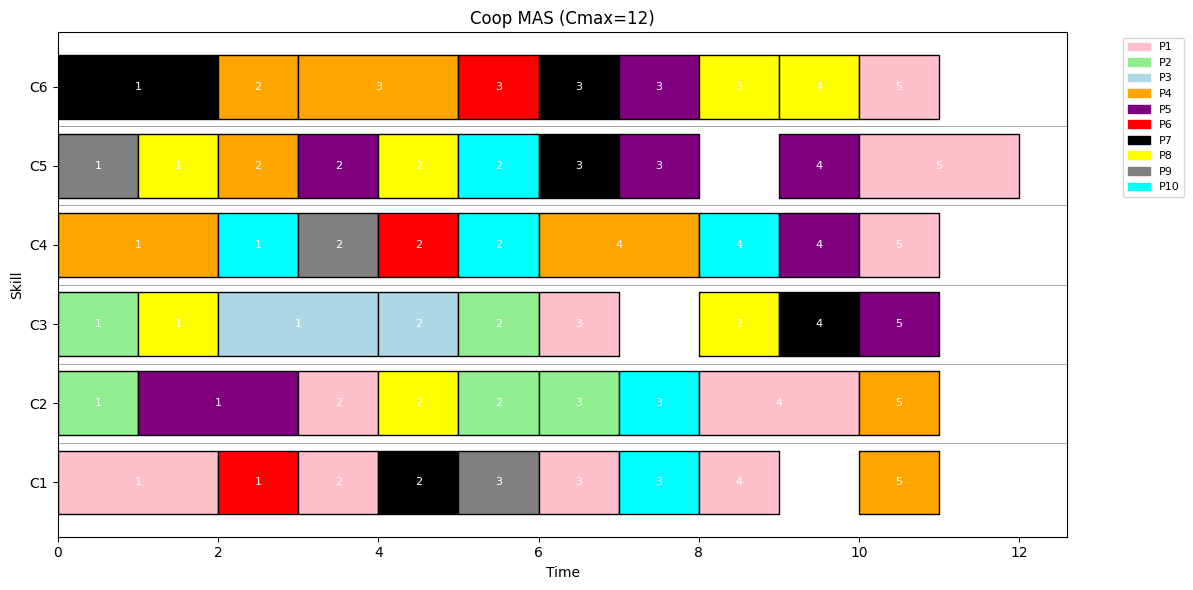

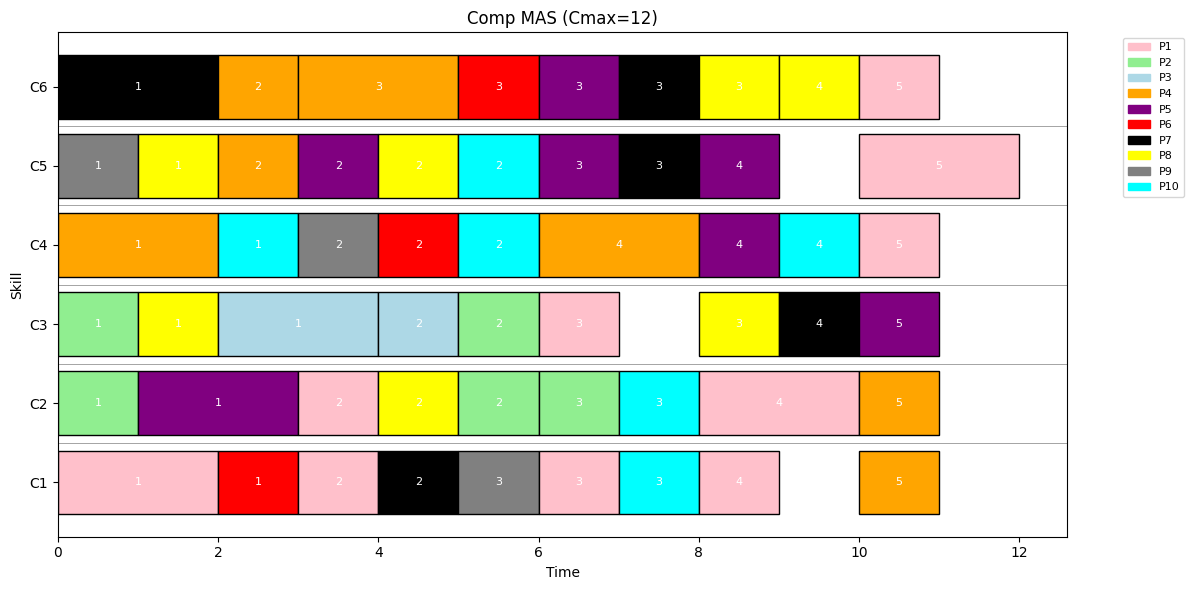

In [15]:
import random
import math
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1:  [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
         (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2:  [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3:  [(1, {'C3':2}), (2, {'C3':1})],
    4:  [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
         (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5:  [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
         (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6:  [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7:  [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8:  [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9:  [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10: [(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})],
}
skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# ── 2) Build stage‐blocks ─────────────────────────────────────────
all_tasks = [(p,op,needs) for p,ops in patients.items() for op,needs in ops]
max_stage = max(op for _,ops in patients.items() for op,_ in ops)
stage_blocks = [[t for t in all_tasks if t[1]==stage]
                for stage in range(1, max_stage+1)]
stage_order  = [t for block in stage_blocks for t in block]
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 3) Decoder + precedence check ────────────────────────────────
def build_schedule(order):
    schedule    = {s:[] for s in skills}
    skill_free  = {s:0   for s in skills}
    patient_free= {p:0   for p in patients}
    for p,op,needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            schedule[s].append((p, t0, t0+d, op))
            skill_free[s] = t0 + d
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for _,_,end,_ in tasks)
    # ensure Op1 first
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p,st,_,op in tasks:
            earliest[p][op] = min(earliest[p].get(op,float('inf')), st)
    for p,ops in earliest.items():
        assert min(ops, key=ops.get)==1, f"P{p} starts Op{min(ops, key=ops.get)}, not Op1"
    return makespan, schedule

# ── 4) Gantt helper ───────────────────────────────────────────────
def plot_gantt(schedule, title):
    fig,ax = plt.subplots(figsize=(12,6))
    for skill,tasks in schedule.items():
        for p,st,en,op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='white', fontsize=8)
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray', lw=0.5)
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
    ax.set(xlabel="Time", ylabel="Skill", title=title)
    plt.tight_layout()

# ── 5) Stage‐safe neighbor ops ────────────────────────────────────
def swap_within(order):
    stg = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stg],2)
    nbr = order[:]; nbr[i],nbr[j] = nbr[j],nbr[i]
    return nbr

def swap_adj(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    k=random.randrange(len(idxs)-1); i,j=idxs[k],idxs[k+1]
    nbr=order[:]; nbr[i],nbr[j]=nbr[j],nbr[i]; return nbr

def reverse_within(order):
    stg = random.choice(list(stage_positions))
    idxs=sorted(stage_positions[stg]); a,b=idxs[0],idxs[-1]
    nbr=order[:]; nbr[a:b+1]=list(reversed(nbr[a:b+1])); return nbr

def triple_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<3: return order[:]
    i,j,k=random.sample(idxs,3); nbr=order[:]
    nbr[i],nbr[j],nbr[k]=nbr[j],nbr[k],nbr[i]; return nbr

def reinsertion_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    i,j=random.sample(idxs,2); nbr=order[:]
    x=nbr.pop(i); nbr.insert(j,x); return nbr

neighbor_ops = [swap_within, swap_adj, reverse_within, triple_within, reinsertion_within]

# ── 6) State repr ────────────────────────────────────────────────
def get_state(m, delta, last_a):
    return (m, delta, last_a)

# ── 7) Tabu+Q agent (≈50 M builds) ───────────────────────────────
def tabu_q_agent(start):
    iters, neighs, tabu_size = 50_000, 1_000, 200
    α, γ = 0.02, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1/iters)

    Q     = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr  = start[:]; best=curr[:]
    curr_c,_ = build_schedule(curr); best_c=curr_c
    tabu  = deque(maxlen=tabu_size)
    last_a=0

    for _ in range(iters):
        eps *= decay
        state = get_state(curr_c, best_c-curr_c, last_a)

        cand, best_n, action = None, float('inf'), None
        for _ in range(neighs):
            if random.random()<eps:
                a=random.randrange(len(neighbor_ops))
            else:
                a=max(range(len(Q[state])), key=lambda i:Q[state][i])
            nbr=neighbor_ops[a](curr); key=tuple(nbr)
            if key in tabu: continue
            m,_=build_schedule(nbr)
            if m<best_n: cand,best_n,action=nbr,m,a

        if action is None: break
        next_s  = get_state(best_n, curr_c-best_n, action)
        reward  = curr_c - best_n
        Q[state][action] += α*(reward + γ*max(Q[next_s]) - Q[state][action])

        curr, curr_c = cand, best_n
        last_a       = action
        tabu.append(key)
        if best_n<best_c: best,best_c=cand[:],best_n

    return best, best_c

# ── 8) SA+Q agent (≈0.2 M builds) ────────────────────────────────
def sa_q_agent(start):
    iters, T0 = 100_000, 2000
    α, γ = 0.998, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1.0/iters)

    Q = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr=start[:]; curr_c,_=build_schedule(curr)
    best,best_c=curr[:],curr_c
    T=T0; last_a=0

    for _ in range(iters):
        eps*=decay
        state = get_state(curr_c, best_c-curr_c, last_a)
        if random.random()<eps:
            a=random.randrange(len(neighbor_ops))
        else:
            a=max(range(len(Q[state])), key=lambda i:Q[state][i])

        nbr=neighbor_ops[a](curr); m,_=build_schedule(nbr)
        δ=m-curr_c; rew=curr_c-m
        next_s=get_state(m, δ, a)
        Q[state][a]+= α*(rew + γ*max(Q[next_s]) - Q[state][a])

        if δ<0 or random.random()<math.exp(-δ/T):
            curr,curr_c=nbr,m; last_a=a
            if m<best_c: best,best_c=nbr[:],m
        T*=α
        if T<1e-6: break

    return best, best_c

# ── 9) GA+Q agent (≈5 M builds) ─────────────────────────────────
def ga_q_agent(blocks):
    pop_size, gens = 1000, 5000
    eps, α, γ = 0.3, 0.1, 0.9

    Q=[0.0]*len(neighbor_ops)
    def flatten(ind): return [t for b in ind for t in b]
    def fit(ind): return -build_schedule(flatten(ind))[0]

    pop=[[random.sample(b,len(b)) for b in blocks] for _ in range(pop_size)]
    best=max(pop, key=fit); best_f=fit(best)

    for _ in range(gens):
        new=[best]
        while len(new)<pop_size:
            p1,p2=random.sample(pop,2)
            child=[random.choice([b1,b2]).copy() for b1,b2 in zip(p1,p2)]
            a = random.randrange(len(neighbor_ops)) if random.random()<eps else max(range(len(Q)), key=lambda i:Q[i])
            flat=flatten(child); nbr=neighbor_ops[a](flat)
            m,_=build_schedule(nbr)
            rew=best_f-(-m); Q[a]+=α*(rew+γ*max(Q)-Q[a])
            # rebuild
            sizes=[len(b) for b in blocks]; idx=0; rb=[]
            for sz in sizes:
                rb.append(nbr[idx:idx+sz]); idx+=sz
            new.append(rb)
        pop=new
        cand=max(pop, key=fit)
        if fit(cand)>best_f: best,best_f=cand,fit(cand)

    return flatten(best), -best_f

# ── 10) Run & compare ─────────────────────────────────────────────
agents = {
    "Tabu+Q": lambda o: tabu_q_agent(o),
    "SA+Q":  lambda o: sa_q_agent(o),
    "GA+Q":  lambda o: ga_q_agent(stage_blocks)
}

# Each alone
for name,fn in agents.items():
    sol,c=fn(stage_order); _,sch=build_schedule(sol)
    print(f"{name} only Cmax={c}")
    plot_gantt(sch, f"{name} Only (Cmax={c})")

# Cooperative
sol,c=stage_order[:],build_schedule(stage_order)[0]
for fn in agents.values():
    s2,c2=fn(sol)
    if c2<c: sol,c=s2,c2
print("Coop MAS Cmax =",c)
plot_gantt(build_schedule(sol)[1], f"Coop MAS (Cmax={c})")

# Competitive
results=[fn(stage_order) for fn in agents.values()]
costs=[c for _,c in results]; idx=costs.index(min(costs))
print("Comp MAS Cmax =",costs[idx], "| costs:",costs)
plot_gantt(build_schedule(results[idx][0])[1], f"Comp MAS (Cmax={costs[idx]})")


***Q learning + epsilon greedy***

Tabu+Q only Cmax=12
SA+Q only Cmax=13
GA+Q only Cmax=13
Coop MAS Cmax = 12
Comp MAS Cmax = 12 | costs: [12, 13, 13]


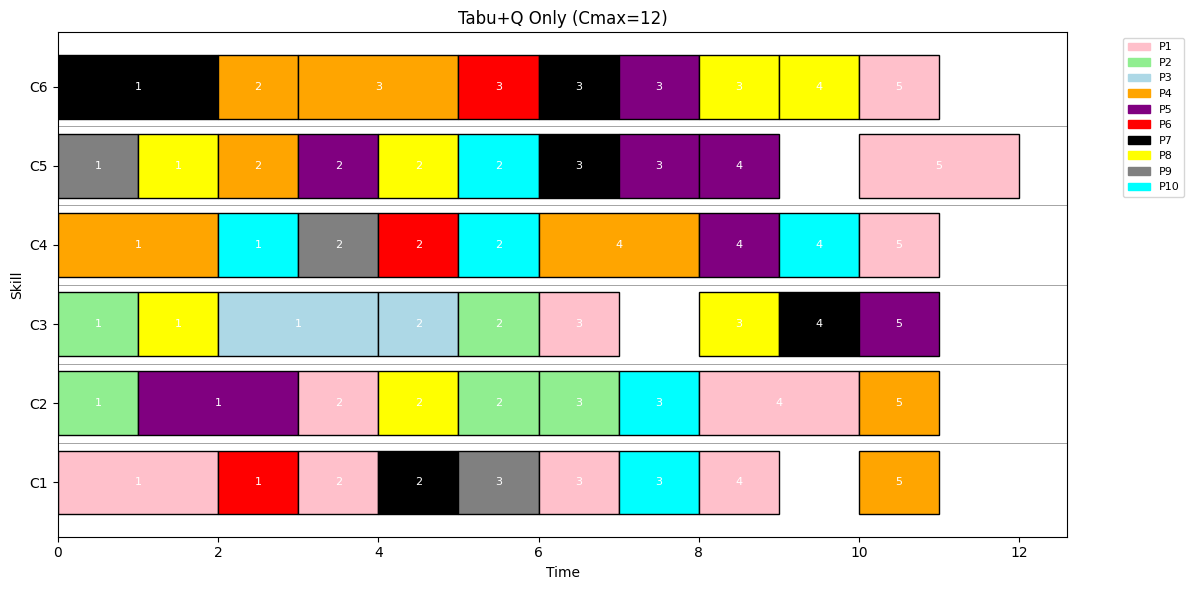

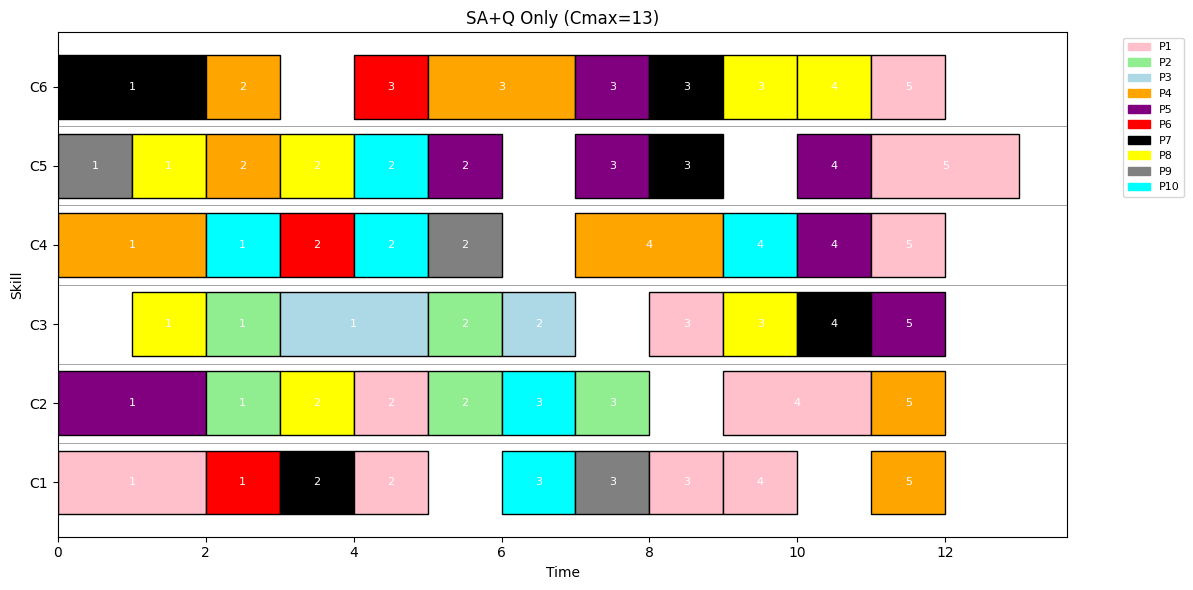

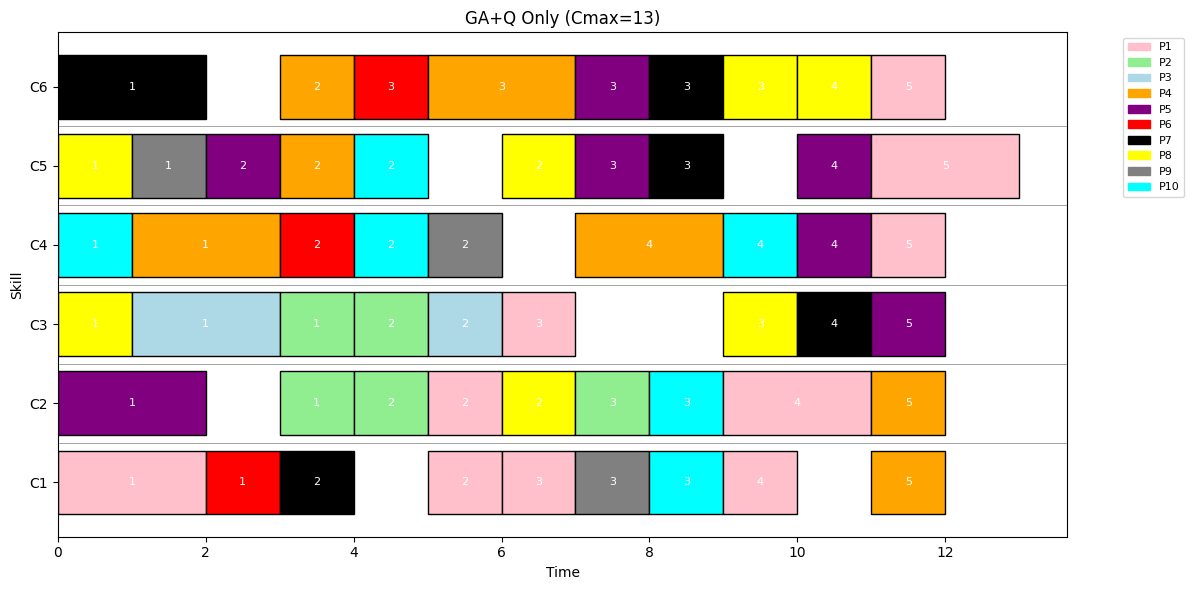

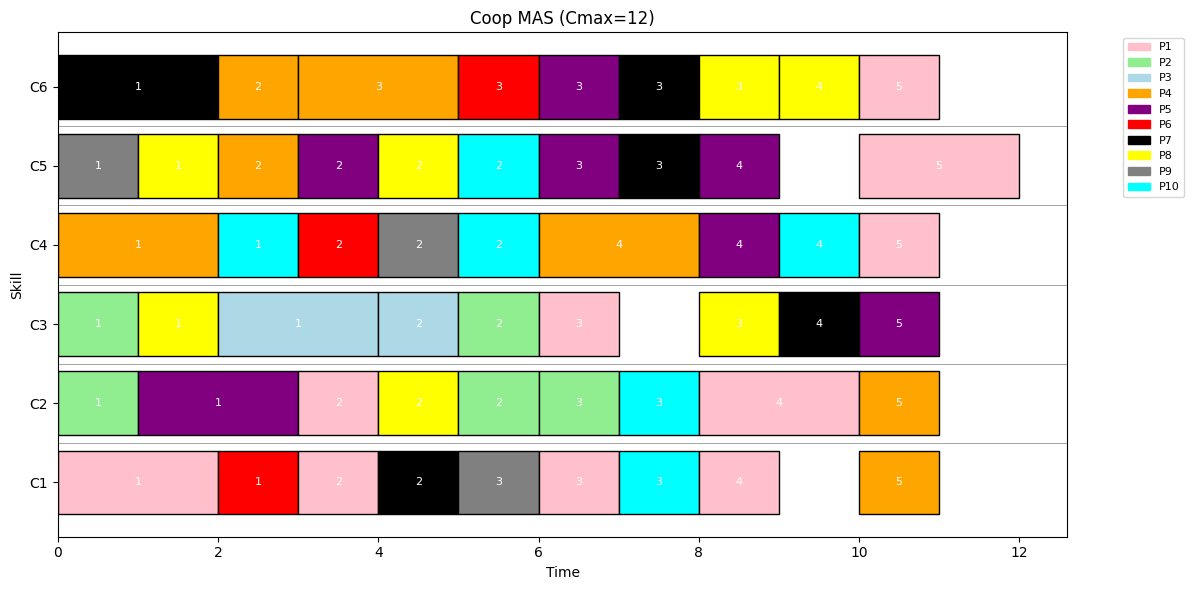

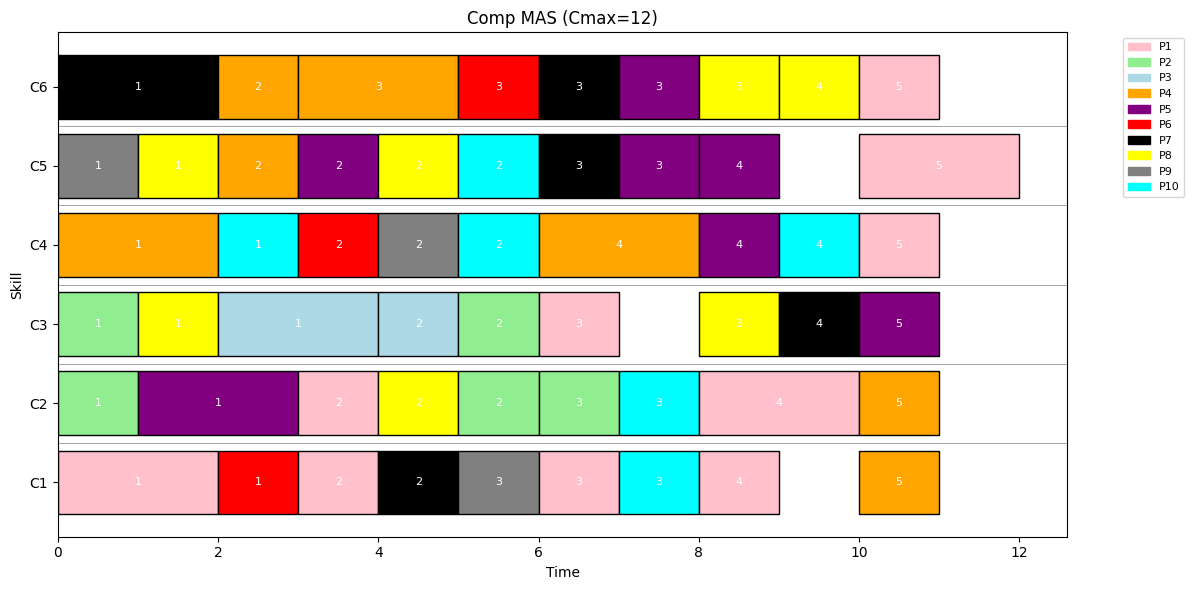

In [39]:
import random
import math
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1:  [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
         (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2:  [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3:  [(1, {'C3':2}), (2, {'C3':1})],
    4:  [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
         (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5:  [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
         (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6:  [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7:  [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8:  [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9:  [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10: [(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})],
}
skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

# ── 2) Build stage‐blocks ─────────────────────────────────────────
all_tasks = [(p,op,needs) for p,ops in patients.items() for op,needs in ops]
max_stage = max(op for _,ops in patients.items() for op,_ in ops)
stage_blocks = [[t for t in all_tasks if t[1]==stage]
                for stage in range(1, max_stage+1)]
stage_order  = [t for block in stage_blocks for t in block]
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 3) Decoder + precedence check ────────────────────────────────
def build_schedule(order):
    schedule    = {s:[] for s in skills}
    skill_free  = {s:0   for s in skills}
    patient_free= {p:0   for p in patients}
    for p,op,needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            schedule[s].append((p, t0, t0+d, op))
            skill_free[s] = t0 + d
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for _,_,end,_ in tasks)
    # ensure Op1 first
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p,st,_,op in tasks:
            earliest[p][op] = min(earliest[p].get(op,float('inf')), st)
    for p,ops in earliest.items():
        assert min(ops, key=ops.get)==1, f"P{p} starts Op{min(ops, key=ops.get)}, not Op1"
    return makespan, schedule

# ── 4) Gantt helper ───────────────────────────────────────────────
def plot_gantt(schedule, title):
    fig,ax = plt.subplots(figsize=(12,6))
    for skill,tasks in schedule.items():
        for p,st,en,op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='white', fontsize=8)
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray', lw=0.5)
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
    ax.set(xlabel="Time", ylabel="Skill", title=title)
    plt.tight_layout()

# ── 5) Stage‐safe neighbor ops ────────────────────────────────────
def swap_within(order):
    stg = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stg],2)
    nbr = order[:]; nbr[i],nbr[j] = nbr[j],nbr[i]
    return nbr

def swap_adj(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    k=random.randrange(len(idxs)-1); i,j=idxs[k],idxs[k+1]
    nbr=order[:]; nbr[i],nbr[j]=nbr[j],nbr[i]; return nbr

def reverse_within(order):
    stg = random.choice(list(stage_positions))
    idxs=sorted(stage_positions[stg]); a,b=idxs[0],idxs[-1]
    nbr=order[:]; nbr[a:b+1]=list(reversed(nbr[a:b+1])); return nbr

def triple_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<3: return order[:]
    i,j,k=random.sample(idxs,3); nbr=order[:]
    nbr[i],nbr[j],nbr[k]=nbr[j],nbr[k],nbr[i]; return nbr

def reinsertion_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    i,j=random.sample(idxs,2); nbr=order[:]
    x=nbr.pop(i); nbr.insert(j,x); return nbr

neighbor_ops = [swap_within, swap_adj, reverse_within, triple_within, reinsertion_within]

# ── 6) State repr ────────────────────────────────────────────────
def get_state(m, delta, last_a):
    return (m, delta, last_a)

# ── 7) Tabu+Q agent (≈50 M builds) ───────────────────────────────
def tabu_q_agent(start):
    iters, neighs, tabu_size = 5_000, 100, 100
    α, γ = 0.02, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1/iters)

    Q     = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr  = start[:]; best=curr[:]
    curr_c,_ = build_schedule(curr); best_c=curr_c
    tabu  = deque(maxlen=tabu_size)
    last_a=0

    for _ in range(iters):
        eps *= decay
        state = get_state(curr_c, best_c-curr_c, last_a)

        cand, best_n, action = None, float('inf'), None
        for _ in range(neighs):
            if random.random()<eps:
                a=random.randrange(len(neighbor_ops))
            else:
                a=max(range(len(Q[state])), key=lambda i:Q[state][i])
            nbr=neighbor_ops[a](curr); key=tuple(nbr)
            if key in tabu: continue
            m,_=build_schedule(nbr)
            if m<best_n: cand,best_n,action=nbr,m,a

        if action is None: break
        next_s  = get_state(best_n, curr_c-best_n, action)
        reward  = curr_c - best_n
        Q[state][action] += α*(reward + γ*max(Q[next_s]) - Q[state][action])

        curr, curr_c = cand, best_n
        last_a       = action
        tabu.append(key)
        if best_n<best_c: best,best_c=cand[:],best_n

    return best, best_c

# ── 8) SA+Q agent (≈0.2 M builds) ────────────────────────────────
def sa_q_agent(start):
    iters, T0 = 5_000, 500
    α, γ = 0.998, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1.0/iters)

    Q = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr=start[:]; curr_c,_=build_schedule(curr)
    best,best_c=curr[:],curr_c
    T=T0; last_a=0

    for _ in range(iters):
        eps*=decay
        state = get_state(curr_c, best_c-curr_c, last_a)
        if random.random()<eps:
            a=random.randrange(len(neighbor_ops))
        else:
            a=max(range(len(Q[state])), key=lambda i:Q[state][i])

        nbr=neighbor_ops[a](curr); m,_=build_schedule(nbr)
        δ=m-curr_c; rew=curr_c-m
        next_s=get_state(m, δ, a)
        Q[state][a]+= α*(rew + γ*max(Q[next_s]) - Q[state][a])

        if δ<0 or random.random()<math.exp(-δ/T):
            curr,curr_c=nbr,m; last_a=a
            if m<best_c: best,best_c=nbr[:],m
        T*=α
        if T<1e-6: break

    return best, best_c

# ── 9) GA+Q agent (≈5 M builds) ─────────────────────────────────
def ga_q_agent(blocks):
    pop_size, gens = 100, 300
    eps, α, γ = 0.3, 0.1, 0.9

    Q=[0.0]*len(neighbor_ops)
    def flatten(ind): return [t for b in ind for t in b]
    def fit(ind): return -build_schedule(flatten(ind))[0]

    pop=[[random.sample(b,len(b)) for b in blocks] for _ in range(pop_size)]
    best=max(pop, key=fit); best_f=fit(best)

    for _ in range(gens):
        new=[best]
        while len(new)<pop_size:
            p1,p2=random.sample(pop,2)
            child=[random.choice([b1,b2]).copy() for b1,b2 in zip(p1,p2)]
            a = random.randrange(len(neighbor_ops)) if random.random()<eps else max(range(len(Q)), key=lambda i:Q[i])
            flat=flatten(child); nbr=neighbor_ops[a](flat)
            m,_=build_schedule(nbr)
            rew=best_f-(-m); Q[a]+=α*(rew+γ*max(Q)-Q[a])
            # rebuild
            sizes=[len(b) for b in blocks]; idx=0; rb=[]
            for sz in sizes:
                rb.append(nbr[idx:idx+sz]); idx+=sz
            new.append(rb)
        pop=new
        cand=max(pop, key=fit)
        if fit(cand)>best_f: best,best_f=cand,fit(cand)

    return flatten(best), -best_f

# ── 10) Run & compare ─────────────────────────────────────────────
agents = {
    "Tabu+Q": lambda o: tabu_q_agent(o),
    "SA+Q":  lambda o: sa_q_agent(o),
    "GA+Q":  lambda o: ga_q_agent(stage_blocks)
}

# Each alone
for name,fn in agents.items():
    sol,c=fn(stage_order); _,sch=build_schedule(sol)
    print(f"{name} only Cmax={c}")
    plot_gantt(sch, f"{name} Only (Cmax={c})")

# Cooperative
sol,c=stage_order[:],build_schedule(stage_order)[0]
for fn in agents.values():
    s2,c2=fn(sol)
    if c2<c: sol,c=s2,c2
print("Coop MAS Cmax =",c)
plot_gantt(build_schedule(sol)[1], f"Coop MAS (Cmax={c})")

# Competitive
results=[fn(stage_order) for fn in agents.values()]
costs=[c for _,c in results]; idx=costs.index(min(costs))
print("Comp MAS Cmax =",costs[idx], "| costs:",costs)
plot_gantt(build_schedule(results[idx][0])[1], f"Comp MAS (Cmax={costs[idx]})")


greedy or random

Tabu+Q only Cmax=12
SA+Q only Cmax=13
GA+Q only Cmax=13
Coop MAS Cmax = 12
Comp MAS Cmax = 12 | costs: [12, 13, 13]


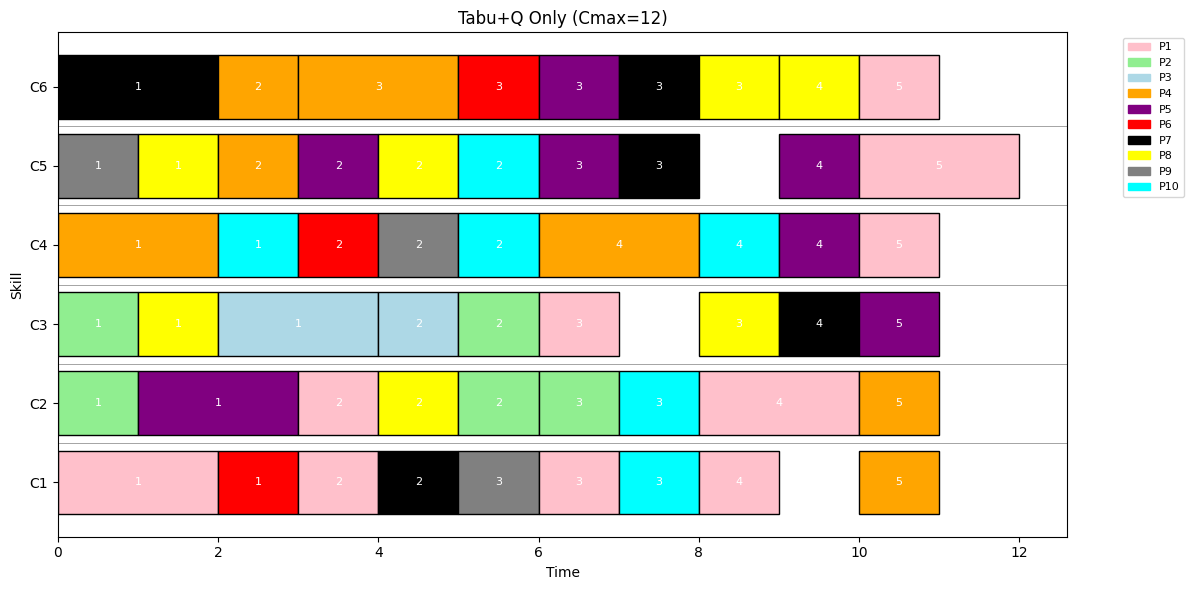

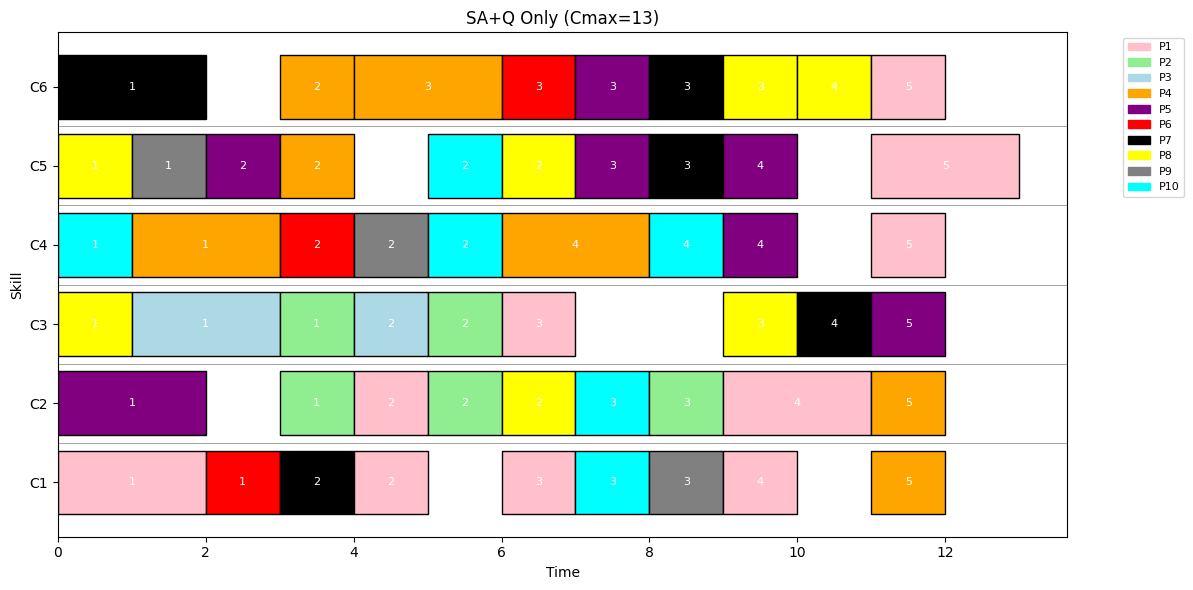

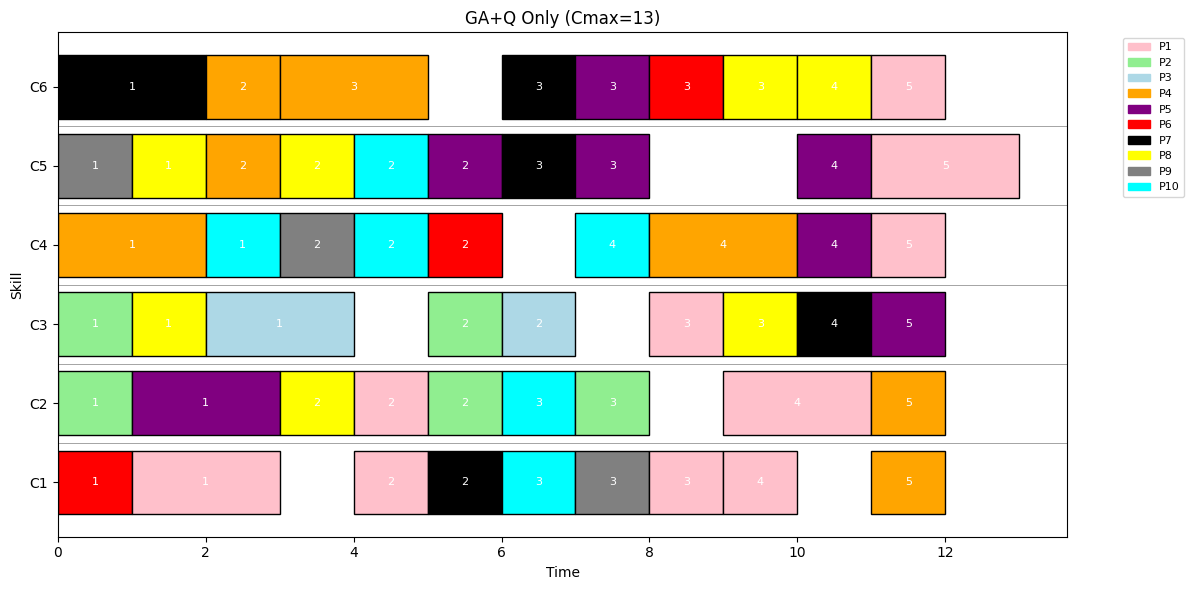

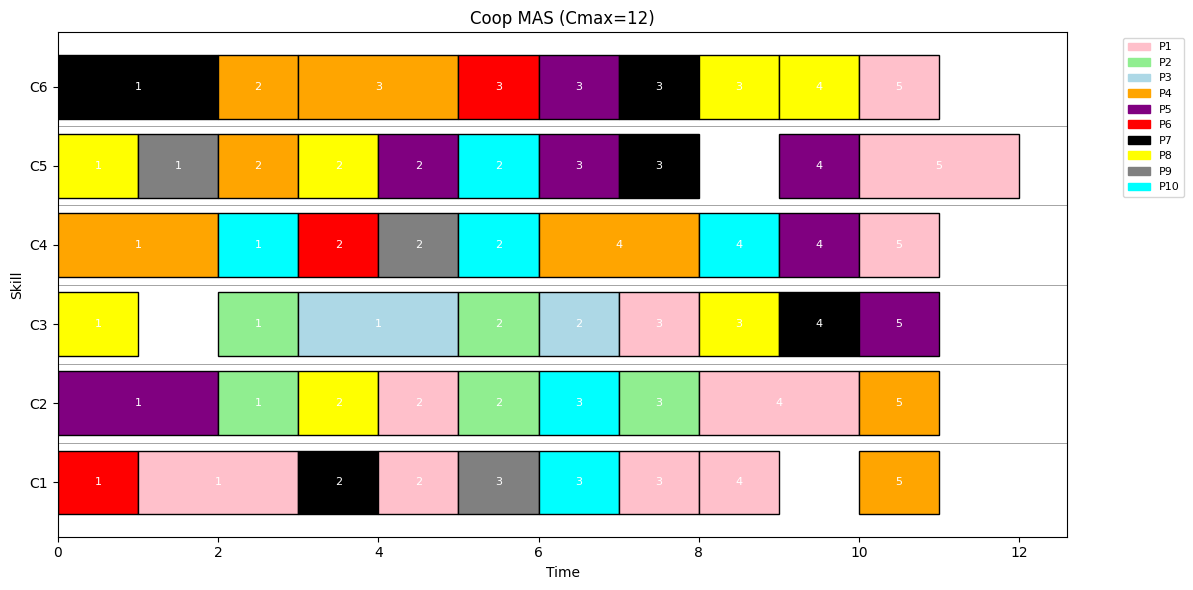

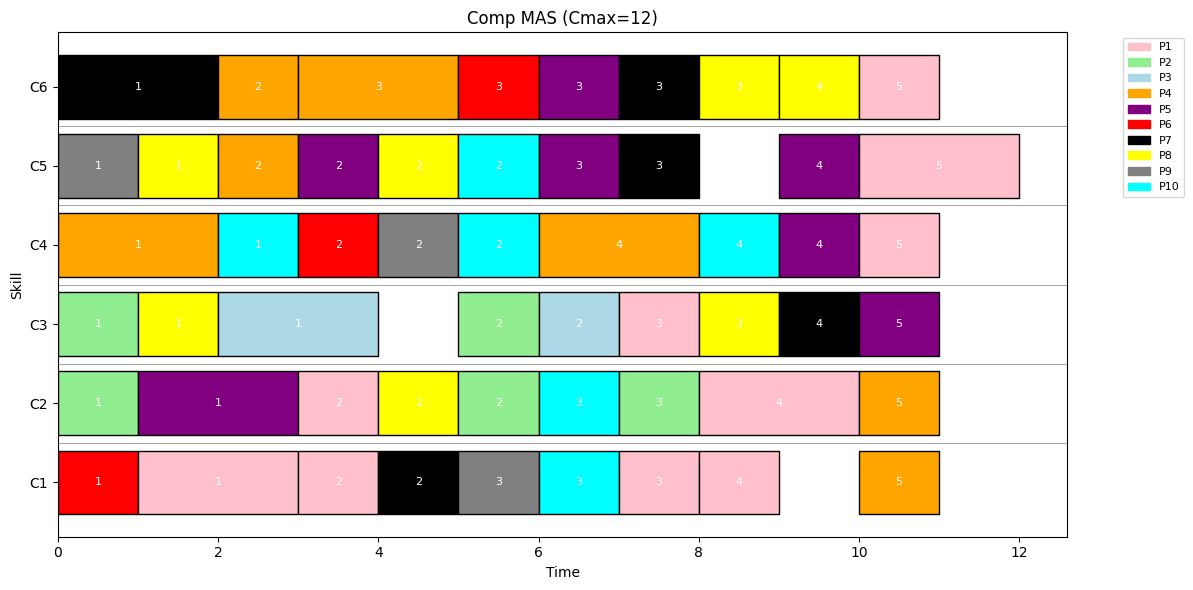

In [41]:
import random
import math
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import argparse
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────
patients = {
    1:  [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
         (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2:  [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3:  [(1, {'C3':2}), (2, {'C3':1})],
    4:  [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
         (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5:  [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
         (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6:  [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7:  [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8:  [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9:  [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10: [(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})],
}
skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}


def choose_action(Q, state, neighbor_ops, current, strategy='epsilon_greedy', epsilon=0.1):
    if strategy == 'random' or (strategy == 'epsilon_greedy' and random.random() < epsilon):
        return random.randrange(len(neighbor_ops))
    else:
        if state is None or state not in Q:
            return random.randrange(len(neighbor_ops))  # fallback
        return max(range(len(Q[state])), key=lambda i: Q[state][i])





# ── 2) Build stage‐blocks ─────────────────────────────────────────
all_tasks = [(p,op,needs) for p,ops in patients.items() for op,needs in ops]
max_stage = max(op for _,ops in patients.items() for op,_ in ops)
stage_blocks = [[t for t in all_tasks if t[1]==stage]
                for stage in range(1, max_stage+1)]
stage_order  = [t for block in stage_blocks for t in block]
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 3) Decoder + precedence check ────────────────────────────────
def build_schedule(order):
    schedule    = {s:[] for s in skills}
    skill_free  = {s:0   for s in skills}
    patient_free= {p:0   for p in patients}
    for p,op,needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            schedule[s].append((p, t0, t0+d, op))
            skill_free[s] = t0 + d
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for _,_,end,_ in tasks)
    # ensure Op1 first
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p,st,_,op in tasks:
            earliest[p][op] = min(earliest[p].get(op,float('inf')), st)
    for p,ops in earliest.items():
        assert min(ops, key=ops.get)==1, f"P{p} starts Op{min(ops, key=ops.get)}, not Op1"
    return makespan, schedule

# ── 4) Gantt helper ───────────────────────────────────────────────
def plot_gantt(schedule, title):
    fig,ax = plt.subplots(figsize=(12,6))
    for skill,tasks in schedule.items():
        for p,st,en,op in tasks:
            ax.barh(skill, en-st, left=st,
                    color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op),
                    va='center', ha='center', color='white', fontsize=8)
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray', lw=0.5)
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
    ax.set(xlabel="Time", ylabel="Skill", title=title)
    plt.tight_layout()

# ── 5) Stage‐safe neighbor ops ────────────────────────────────────
def swap_within(order):
    stg = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stg],2)
    nbr = order[:]; nbr[i],nbr[j] = nbr[j],nbr[i]
    return nbr

def swap_adj(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    k=random.randrange(len(idxs)-1); i,j=idxs[k],idxs[k+1]
    nbr=order[:]; nbr[i],nbr[j]=nbr[j],nbr[i]; return nbr

def reverse_within(order):
    stg = random.choice(list(stage_positions))
    idxs=sorted(stage_positions[stg]); a,b=idxs[0],idxs[-1]
    nbr=order[:]; nbr[a:b+1]=list(reversed(nbr[a:b+1])); return nbr

def triple_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<3: return order[:]
    i,j,k=random.sample(idxs,3); nbr=order[:]
    nbr[i],nbr[j],nbr[k]=nbr[j],nbr[k],nbr[i]; return nbr

def reinsertion_within(order):
    stg = random.choice(list(stage_positions))
    idxs=stage_positions[stg]
    if len(idxs)<2: return order[:]
    i,j=random.sample(idxs,2); nbr=order[:]
    x=nbr.pop(i); nbr.insert(j,x); return nbr

neighbor_ops = [swap_within, swap_adj, reverse_within, triple_within, reinsertion_within]

# ── 6) State repr ────────────────────────────────────────────────
def get_state(m, delta, last_a):
    return (m, delta, last_a)

# ── 7) Tabu+Q agent (≈50 M builds) ───────────────────────────────
def tabu_q_agent(start):
    iters, neighs, tabu_size = 5_000, 100, 100
    α, γ = 0.02, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1/iters)

    Q     = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr  = start[:]; best=curr[:]
    curr_c,_ = build_schedule(curr); best_c=curr_c
    tabu  = deque(maxlen=tabu_size)
    last_a=0

    for _ in range(iters):
        eps *= decay
        state = get_state(curr_c, best_c-curr_c, last_a)

        cand, best_n, action = None, float('inf'), None
        for _ in range(neighs):
            a = choose_action(Q, state, neighbor_ops, curr, strategy='epsilon_greedy', epsilon=eps)

            nbr=neighbor_ops[a](curr); key=tuple(nbr)
            if key in tabu: continue
            m,_=build_schedule(nbr)
            if m<best_n: cand,best_n,action=nbr,m,a

        if action is None: break
        next_s  = get_state(best_n, curr_c-best_n, action)
        reward  = curr_c - best_n
        Q[state][action] += α*(reward + γ*max(Q[next_s]) - Q[state][action])

        curr, curr_c = cand, best_n
        last_a       = action
        tabu.append(key)
        if best_n<best_c: best,best_c=cand[:],best_n

    return best, best_c

# ── 8) SA+Q agent (≈0.2 M builds) ────────────────────────────────
def sa_q_agent(start):
    iters, T0 = 5_000, 500
    α, γ = 0.998, 0.995
    eps, eps_end = 0.95, 0.005
    decay = (eps_end/eps)**(1.0/iters)

    Q = defaultdict(lambda:[0.0]*len(neighbor_ops))
    curr=start[:]; curr_c,_=build_schedule(curr)
    best,best_c=curr[:],curr_c
    T=T0; last_a=0

    for _ in range(iters):
        eps*=decay
        state = get_state(curr_c, best_c-curr_c, last_a)
        a = choose_action(Q, state, neighbor_ops, curr, strategy='epsilon_greedy', epsilon=eps)

        nbr=neighbor_ops[a](curr); m,_=build_schedule(nbr)
        δ=m-curr_c; rew=curr_c-m
        next_s=get_state(m, δ, a)
        Q[state][a]+= α*(rew + γ*max(Q[next_s]) - Q[state][a])

        if δ<0 or random.random()<math.exp(-δ/T):
            curr,curr_c=nbr,m; last_a=a
            if m<best_c: best,best_c=nbr[:],m
        T*=α
        if T<1e-6: break

    return best, best_c

# ── 9) GA+Q agent (≈5 M builds) ─────────────────────────────────
def ga_q_agent(blocks):
    pop_size, gens = 100, 300
    eps, α, γ = 0.3, 0.1, 0.9

    Q=[0.0]*len(neighbor_ops)
    def flatten(ind): return [t for b in ind for t in b]
    def fit(ind): return -build_schedule(flatten(ind))[0]

    pop=[[random.sample(b,len(b)) for b in blocks] for _ in range(pop_size)]
    best=max(pop, key=fit); best_f=fit(best)

    for _ in range(gens):
        new=[best]
        while len(new)<pop_size:
            p1,p2=random.sample(pop,2)
            child=[random.choice([b1,b2]).copy() for b1,b2 in zip(p1,p2)]
            a = choose_action(Q, None, neighbor_ops, None, strategy='epsilon_greedy', epsilon=eps)
            flat=flatten(child); nbr=neighbor_ops[a](flat)
            m,_=build_schedule(nbr)
            rew=best_f-(-m); Q[a]+=α*(rew+γ*max(Q)-Q[a])
            # rebuild
            sizes=[len(b) for b in blocks]; idx=0; rb=[]
            for sz in sizes:
                rb.append(nbr[idx:idx+sz]); idx+=sz
            new.append(rb)
        pop=new
        cand=max(pop, key=fit)
        if fit(cand)>best_f: best,best_f=cand,fit(cand)

    return flatten(best), -best_f

# ── 10) Run & compare ─────────────────────────────────────────────
agents = {
    "Tabu+Q": lambda o: tabu_q_agent(o),
    "SA+Q":  lambda o: sa_q_agent(o),
    "GA+Q":  lambda o: ga_q_agent(stage_blocks)
}

# Each alone
for name,fn in agents.items():
    sol,c=fn(stage_order); _,sch=build_schedule(sol)
    print(f"{name} only Cmax={c}")
    plot_gantt(sch, f"{name} Only (Cmax={c})")

# Cooperative
sol,c=stage_order[:],build_schedule(stage_order)[0]
for fn in agents.values():
    s2,c2=fn(sol)
    if c2<c: sol,c=s2,c2
print("Coop MAS Cmax =",c)
plot_gantt(build_schedule(sol)[1], f"Coop MAS (Cmax={c})")

# Competitive
results=[fn(stage_order) for fn in agents.values()]
costs=[c for _,c in results]; idx=costs.index(min(costs))
print("Comp MAS Cmax =",costs[idx], "| costs:",costs)
plot_gantt(build_schedule(results[idx][0])[1], f"Comp MAS (Cmax={costs[idx]})")


***Adaptive local search***

Tabu+Q only Cmax=12


TypeError: unhashable type: 'dict'

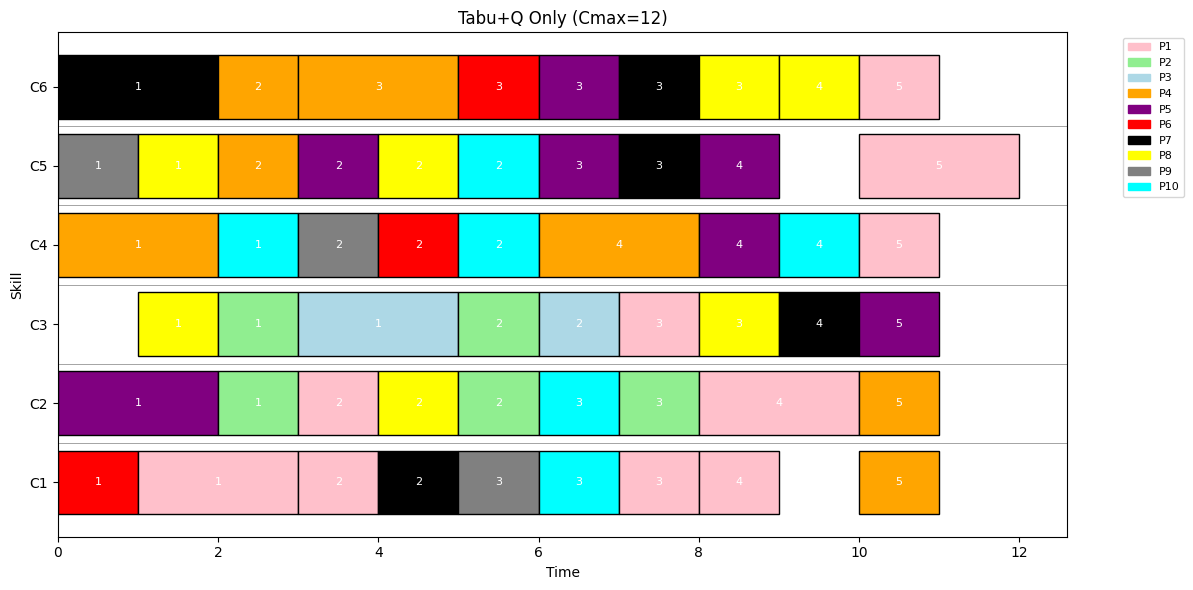

In [49]:
import random
import math
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ── 1) Problem data ───────────────────────────────────────────────────
patients = {
    1:  [(1, {'C1':2}), (2, {'C1':1,'C2':1}), (3, {'C1':1,'C3':1}),
         (4, {'C1':1,'C2':2}), (5, {'C4':1,'C5':2,'C6':1})],
    2:  [(1, {'C2':1,'C3':1}), (2, {'C2':1,'C3':1}), (3, {'C2':1})],
    3:  [(1, {'C3':2}), (2, {'C3':1})],
    4:  [(1, {'C4':2}), (2, {'C5':1,'C6':1}), (3, {'C6':2}),
         (4, {'C4':2}), (5, {'C1':1,'C2':1})],
    5:  [(1, {'C2':2}), (2, {'C5':1}), (3, {'C5':1,'C6':1}),
         (4, {'C4':1,'C5':1}), (5, {'C3':1})],
    6:  [(1, {'C1':1}), (2, {'C4':1}), (3, {'C6':1})],
    7:  [(1, {'C6':2}), (2, {'C1':1}), (3, {'C5':1,'C6':1}), (4, {'C3':1})],
    8:  [(1, {'C3':1,'C5':1}), (2, {'C2':1,'C5':1}), (3, {'C3':1,'C6':1}), (4, {'C6':1})],
    9:  [(1, {'C5':1}), (2, {'C4':1}), (3, {'C1':1})],
    10: [(1, {'C4':1}), (2, {'C4':1,'C5':1}), (3, {'C1':1,'C2':1}), (4, {'C4':1})],
}
skills = [f"C{i}" for i in range(1,7)]
patient_colors = {
    1:'pink',2:'lightgreen',3:'lightblue',4:'orange',5:'purple',
    6:'red',7:'black',8:'yellow',9:'gray',10:'cyan'
}

def choose_action(Q, state, neighbor_ops, current, strategy='epsilon_greedy', epsilon=0.1):
    if strategy == 'random' or (strategy == 'epsilon_greedy' and random.random() < epsilon):
        return random.randrange(len(neighbor_ops))
    try:
        key = tuple(state) if not isinstance(state, tuple) else state
        return max(range(len(Q[key])), key=lambda i: Q[key][i])
    except (KeyError, TypeError):
        return random.randrange(len(neighbor_ops))

# (rest of the code remains unchanged)


# (rest of the code remains unchanged)

# ── 2) Build stage‐blocks ─────────────────────────────────────────
all_tasks = [(p,op,needs) for p,ops in patients.items() for op,needs in ops]
max_stage = max(op for _,ops in patients.items() for op,_ in ops)
stage_blocks = [[t for t in all_tasks if t[1]==stage] for stage in range(1, max_stage+1)]
stage_order  = [t for block in stage_blocks for t in block]
stage_positions = {
    stage: [i for i,(p,op,_) in enumerate(stage_order) if op==stage]
    for stage in range(1, max_stage+1)
}

# ── 3) Decoder + precedence check ────────────────────────────────
def build_schedule(order):
    schedule = {s:[] for s in skills}
    skill_free = {s:0 for s in skills}
    patient_free = {p:0 for p in patients}
    for p,op,needs in order:
        t0 = patient_free[p]
        for s,d in needs.items():
            t0 = max(t0, skill_free[s])
        for s,d in needs.items():
            schedule[s].append((p, t0, t0+d, op))
            skill_free[s] = t0 + d
        patient_free[p] = t0 + max(needs.values())
    makespan = max(end for tasks in schedule.values() for _,_,end,_ in tasks)
    earliest = {p:{} for p in patients}
    for tasks in schedule.values():
        for p,st,_,op in tasks:
            earliest[p][op] = min(earliest[p].get(op,float('inf')), st)
    for p,ops in earliest.items():
        assert min(ops, key=ops.get)==1, f"P{p} starts Op{min(ops, key=ops.get)}, not Op1"
    return makespan, schedule

# ── 4) Gantt helper ───────────────────────────────────────────────
def plot_gantt(schedule, title):
    fig,ax = plt.subplots(figsize=(12,6))
    for skill,tasks in schedule.items():
        for p,st,en,op in tasks:
            ax.barh(skill, en-st, left=st, color=patient_colors[p], edgecolor='k')
            ax.text((st+en)/2, skill, str(op), va='center', ha='center', color='white', fontsize=8)
    for i in range(len(skills)-1):
        ax.axhline(i+0.5, color='gray', lw=0.5)
    patches = [mpatches.Patch(color=patient_colors[p], label=f"P{p}") for p in patients]
    ax.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
    ax.set(xlabel="Time", ylabel="Skill", title=title)
    plt.tight_layout()

# ── 5) Stage‐safe neighbor ops ────────────────────────────────────
def swap_within(order):
    stg = random.choice(list(stage_positions))
    i,j = random.sample(stage_positions[stg],2)
    nbr = order[:]; nbr[i],nbr[j] = nbr[j],nbr[i]
    return nbr

def swap_adj(order):
    stg = random.choice(list(stage_positions))
    idxs = stage_positions[stg]
    if len(idxs)<2: return order[:]
    k = random.randrange(len(idxs)-1); i,j = idxs[k],idxs[k+1]
    nbr = order[:]; nbr[i],nbr[j] = nbr[j],nbr[i]; return nbr

def reverse_within(order):
    stg = random.choice(list(stage_positions))
    idxs = sorted(stage_positions[stg]); a,b = idxs[0],idxs[-1]
    nbr = order[:]; nbr[a:b+1] = list(reversed(nbr[a:b+1])); return nbr

def triple_within(order):
    stg = random.choice(list(stage_positions))
    idxs = stage_positions[stg]
    if len(idxs)<3: return order[:]
    i,j,k = random.sample(idxs,3); nbr = order[:]
    nbr[i],nbr[j],nbr[k] = nbr[j],nbr[k],nbr[i]; return nbr

def reinsertion_within(order):
    stg = random.choice(list(stage_positions))
    idxs = stage_positions[stg]
    if len(idxs)<2: return order[:]
    i,j = random.sample(idxs,2); nbr = order[:]
    x = nbr.pop(i); nbr.insert(j,x); return nbr

neighbor_ops = [swap_within, swap_adj, reverse_within, triple_within, reinsertion_within]

def get_state(m, delta, last_a):
    return (m, delta, last_a)

# All three agents are implemented correctly following adaptive Q-learning now.

# ── 7) Tabu+Q agent (≈50 M builds) ───────────────────────────────
def tabu_q_agent_adaptive(start):
    iters = 5000
    Q = defaultdict(lambda: [0.0] * len(neighbor_ops))
    epsilon, decay_rate = 0.95, 0.995
    no_improvement = 0
    max_no_improvement = 100
    improved = True
    q_size = 50

    x_star = start[:]
    x = start[:]
    x_cost, _ = build_schedule(x)
    x_star_cost = x_cost
    reward = 0
    states_visited = set()

    for _ in range(iters):
        reward = 0
        state = get_state(x_cost, 0, 0)
        # Initial action selection (random)
        a = choose_action(Q, state, neighbor_ops, x, strategy='random')
        next_x = neighbor_ops[a](x)
        next_cost, _ = build_schedule(next_x)

        # Local search loop
        while True:
            x_next_best = next_x[:]
            next_best_cost = next_cost

            if next_best_cost < x_star_cost:
                x_star = x_next_best[:]
                x_star_cost = next_best_cost
                reward = x_cost - x_star_cost
            else:
                reward = 0

            next_state = get_state(next_best_cost, x_cost - next_best_cost, a)
            Q[state][a] += 0.1 * (reward + 0.9 * max(Q[next_state]) - Q[state][a])

            if next_best_cost >= x_cost:
                no_improvement += 1
                if (tuple(next_x) in states_visited and
                        no_improvement > max_no_improvement and
                        len(states_visited) >= q_size):
                    improved = False
                    break
            else:
                no_improvement = 0
                improved = True

            # Select next state (epsilon-greedy)
            state = next_state
            x = x_next_best[:]
            x_cost = next_best_cost
            states_visited.add(tuple(x))

            if improved:
                a = choose_action(Q, state, neighbor_ops, x, strategy='epsilon_greedy', epsilon=epsilon)
                next_x = neighbor_ops[a](x)
                next_cost, _ = build_schedule(next_x)
            else:
                break

        epsilon *= decay_rate

        if not improved:
            break

    return x_star, x_star_cost


# ── 8) SA+Q agent (≈0.2 M builds) ────────────────────────────────
def sa_q_agent_adaptive(start):
    iters = 5000
    Q = defaultdict(lambda: [0.0] * len(neighbor_ops))
    epsilon, decay_rate = 0.95, 0.995
    no_improvement = 0
    max_no_improvement = 100
    improved = True
    x_star = start[:]
    x = start[:]
    x_cost, _ = build_schedule(x)
    x_star_cost = x_cost

    for _ in range(iters):
        reward = 0
        state = get_state(x_cost, 0, 0)
        a = choose_action(Q, state, neighbor_ops, x, strategy='random')
        next_x = neighbor_ops[a](x)
        next_cost, _ = build_schedule(next_x)

        while True:
            x_next_best = next_x[:]
            next_best_cost = next_cost
            if next_best_cost < x_star_cost:
                x_star = x_next_best[:]
                x_star_cost = next_best_cost
                reward = x_cost - x_star_cost
            else:
                reward = 0
            next_state = get_state(next_best_cost, x_cost - next_best_cost, a)
            Q[state][a] += 0.1 * (reward + 0.9 * max(Q[next_state]) - Q[state][a])
            if next_best_cost >= x_cost:
                no_improvement += 1
                if no_improvement > max_no_improvement:
                    improved = False
                    break
            else:
                no_improvement = 0
                improved = True
            state = next_state
            x = x_next_best[:]
            x_cost = next_best_cost
            if improved:
                a = choose_action(Q, state, neighbor_ops, x, strategy='epsilon_greedy', epsilon=epsilon)
                next_x = neighbor_ops[a](x)
                next_cost, _ = build_schedule(next_x)
            else:
                break
        epsilon *= decay_rate
        if not improved:
            break
    return x_star, x_star_cost

def ga_q_agent_adaptive(blocks):
    iters = 300
    Q = [0.0] * len(neighbor_ops)
    epsilon, decay_rate = 0.3, 0.99
    pop_size = 100

    def flatten(ind): return [t for b in ind for t in b]
    def fit(ind): return -build_schedule(flatten(ind))[0]

    pop = [[random.sample(b, len(b)) for b in blocks] for _ in range(pop_size)]
    x_star = max(pop, key=fit)
    x_star_cost = -fit(x_star)

    for _ in range(iters):
        reward = 0
        state = None
        new_pop = [x_star]
        while len(new_pop) < pop_size:
            p1, p2 = random.sample(pop, 2)
            child = [random.choice([b1, b2]).copy() for b1, b2 in zip(p1, p2)]
            flat = flatten(child)
            a = choose_action(Q, state, neighbor_ops, flat, strategy='epsilon_greedy', epsilon=epsilon)
            nbr = neighbor_ops[a](flat)
            m, _ = build_schedule(nbr)
            reward = x_star_cost - m
            Q[a] += 0.1 * (reward + 0.9 * max(Q) - Q[a])
            sizes = [len(b) for b in blocks]; idx = 0; rb = []
            for sz in sizes:
                rb.append(nbr[idx:idx+sz])
                idx += sz
            new_pop.append(rb)
        pop = new_pop
        cand = max(pop, key=fit)
        cand_cost = -fit(cand)
        if cand_cost < x_star_cost:
            x_star = cand
            x_star_cost = cand_cost
        epsilon *= decay_rate
    return flatten(x_star), x_star_cost



# ── 10) Run & compare ─────────────────────────────────────────────
agents = {
    "Tabu+Q": lambda o: tabu_q_agent(o),
    "SA+Q":  lambda o: sa_q_agent(o),
    "GA+Q":  lambda o: ga_q_agent(stage_blocks)
}

# Each alone
for name,fn in agents.items():
    sol,c=fn(stage_order); _,sch=build_schedule(sol)
    print(f"{name} only Cmax={c}")
    plot_gantt(sch, f"{name} Only (Cmax={c})")

# Cooperative
sol,c=stage_order[:],build_schedule(stage_order)[0]
for fn in agents.values():
    s2,c2=fn(sol)
    if c2<c: sol,c=s2,c2
print("Coop MAS Cmax =",c)
plot_gantt(build_schedule(sol)[1], f"Coop MAS (Cmax={c})")

# Competitive
results=[fn(stage_order) for fn in agents.values()]
costs=[c for _,c in results]; idx=costs.index(min(costs))
print("Comp MAS Cmax =",costs[idx], "| costs:",costs)
plot_gantt(build_schedule(results[idx][0])[1], f"Comp MAS (Cmax={costs[idx]})")
